# Analytics of the dataset (and some failed modelling)

In [1]:
"""
load in the training data

"""
import pandas as pd
import numpy as np

df_training_full = pd.read_csv("training.csv", na_values=['na'])

df_training_full.head()

id  target  sensor1_measure  sensor2_measure  sensor3_measure  \
0   1       0            76698              NaN     2.130706e+09   
1   2       0            33058              NaN     0.000000e+00   
2   3       0            41040              NaN     2.280000e+02   
3   4       0               12              0.0     7.000000e+01   
4   5       0            60874              NaN     1.368000e+03   

   sensor4_measure  sensor5_measure  sensor6_measure  sensor7_histogram_bin0  \
0            280.0              0.0              0.0                     0.0   
1              NaN              0.0              0.0                     0.0   
2            100.0              0.0              0.0                     0.0   
3             66.0              0.0             10.0                     0.0   
4            458.0              0.0              0.0                     0.0   

   sensor7_histogram_bin1  ...  sensor105_histogram_bin2  \
0                     0.0  ...                 1240520.0   
1                     0.0  ...                  421400.0   
2                     0.0  ...                  277378.0   
3                     0.0  ...                     240.0   
4                     0.0  ...                  622012.0   

   sensor105_histogram_bin3  sensor105_histogram_bin4  \
0                  493384.0                  721044.0   
1                  178064.0                  293306.0   
2                  159812.0                  423992.0   
3                      46.0                      58.0   
4                  229790.0                  405298.0   

   sensor105_histogram_bin5  sensor105_histogram_bin6  \
0                  469792.0                  339156.0   
1                  245416.0                  133654.0   
2                  409564.0                  320746.0   
3                      44.0                      10.0   
4                  347188.0                  286954.0   

   sensor105_histogram_bin7  sensor105_histogram_bin8  \
0                  157956.0                   73224.0   
1                   81140.0                   97576.0   
2                  158022.0                   95128.0   
3                       0.0                       0.0   
4                  311560.0                  433954.0   

   sensor105_histogram_bin9  sensor106_measure  sensor107_measure  
0                       0.0                0.0                0.0  
1                    1500.0                0.0                0.0  
2                     514.0                0.0                0.0  
3                       0.0                4.0               32.0  
4                    1218.0                0.0                0.0  

[5 rows x 172 columns]

Load in the unlabelled testing data

In [2]:
df_test = pd.read_csv("test.csv", na_values=['na'])
df_test.head()

id  sensor1_measure  sensor2_measure  sensor3_measure  sensor4_measure  \
0   1            66888              NaN     2.130706e+09            332.0   
1   2            91122              NaN              NaN              NaN   
2   3           218924              NaN              NaN              NaN   
3   4               16              0.0     3.000000e+01             28.0   
4   5            39084              NaN     1.054000e+03           1032.0   

   sensor5_measure  sensor6_measure  sensor7_histogram_bin0  \
0              0.0              0.0                     0.0   
1              0.0              0.0                     0.0   
2              NaN              NaN                     0.0   
3              0.0              0.0                     0.0   
4              0.0              0.0                     0.0   

   sensor7_histogram_bin1  sensor7_histogram_bin2  ...  \
0                     0.0                     0.0  ...   
1                     0.0                     0.0  ...   
2                   280.0                119070.0  ...   
3                     0.0                     0.0  ...   
4                     0.0                     0.0  ...   

   sensor105_histogram_bin2  sensor105_histogram_bin3  \
0                  544762.0                  504820.0   
1                  696774.0                  345742.0   
2                 1032974.0                  866000.0   
3                      70.0                      24.0   
4                  276304.0                  123720.0   

   sensor105_histogram_bin4  sensor105_histogram_bin5  \
0                 1597028.0                  631494.0   
1                  939332.0                  943744.0   
2                 1645644.0                 1154924.0   
3                      40.0                      12.0   
4                  225722.0                  281462.0   

   sensor105_histogram_bin6  sensor105_histogram_bin7  \
0                    5644.0                    5448.0   
1                  504048.0                  203698.0   
2                 3549128.0                 1550716.0   
3                      56.0                       0.0   
4                  295244.0                  256146.0   

   sensor105_histogram_bin8  sensor105_histogram_bin9  sensor106_measure  \
0                   11096.0                    1982.0                0.0   
1                  287374.0                   36566.0                0.0   
2                   15900.0                       0.0                NaN   
3                       0.0                       0.0                0.0   
4                  241074.0                    2372.0                0.0   

   sensor107_measure  
0                0.0  
1                0.0  
2                NaN  
3                0.0  
4                0.0  

[5 rows x 171 columns]

combine the test and training data so manipulations can be performed on both sets at once

field types displayed: mostly floating point fields

In [3]:
df_training_full['Type'] = 'Train' 
df_test['Type'] = 'Test'
all_data = pd.concat([df_training_full,df_test],axis=0)
all_data.dtypes

c:\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


Type                         object
id                            int64
sensor100_measure           float64
sensor101_measure           float64
sensor102_measure           float64
sensor103_measure           float64
sensor104_measure           float64
sensor105_histogram_bin0    float64
sensor105_histogram_bin1    float64
sensor105_histogram_bin2    float64
sensor105_histogram_bin3    float64
sensor105_histogram_bin4    float64
sensor105_histogram_bin5    float64
sensor105_histogram_bin6    float64
sensor105_histogram_bin7    float64
sensor105_histogram_bin8    float64
sensor105_histogram_bin9    float64
sensor106_measure           float64
sensor107_measure           float64
sensor10_measure            float64
sensor11_measure            float64
sensor12_measure            float64
sensor13_measure            float64
sensor14_measure            float64
sensor15_measure            float64
sensor16_measure            float64
sensor17_measure            float64
sensor18_measure            

In [4]:
all_data

Type     id  sensor100_measure  sensor101_measure  sensor102_measure  \
0      Train      1                0.0                0.0          2801180.0   
1      Train      2                0.0                0.0          3477820.0   
2      Train      3                0.0                0.0          1040120.0   
3      Train      4                0.0                0.0                0.0   
4      Train      5                0.0                0.0         21173050.0   
5      Train      6                0.0                0.0                0.0   
6      Train      7                0.0                0.0                0.0   
7      Train      8                0.0                0.0          3537310.0   
8      Train      9                0.0                0.0           400610.0   
9      Train     10                0.0                0.0                0.0   
10     Train     11                0.0                0.0          9195680.0   
11     Train     12                0.0                0.0                0.0   
12     Train     13                0.0                0.0          1100350.0   
13     Train     14                0.0                0.0          2740890.0   
14     Train     15                0.0                0.0          1074940.0   
15     Train     16                0.0                0.0                0.0   
16     Train     17                0.0                0.0                0.0   
17     Train     18                0.0                0.0                0.0   
18     Train     19                0.0                0.0                0.0   
19     Train     20                0.0                0.0           431210.0   
20     Train     21                0.0                0.0          1212960.0   
21     Train     22                0.0                0.0                0.0   
22     Train     23                0.0                0.0                0.0   
23     Train     24                0.0                0.0        432739640.0   
24     Train     25                0.0                0.0         19102180.0   
25     Train     26                0.0                0.0         28394360.0   
26     Train     27                0.0                0.0                0.0   
27     Train     28                0.0                0.0         45978820.0   
28     Train     29                0.0                0.0                NaN   
29     Train     30                0.0                0.0         11515480.0   
...      ...    ...                ...                ...                ...   
15971   Test  15972                0.0                0.0          2705090.0   
15972   Test  15973                0.0                0.0                0.0   
15973   Test  15974                0.0                0.0          1332960.0   
15974   Test  15975                0.0                0.0                0.0   
15975   Test  15976                0.0               40.0         77052650.0   
15976   Test  15977                0.0                0.0                0.0   
15977   Test  15978                0.0                0.0           723990.0   
15978   Test  15979                0.0                0.0           495240.0   
15979   Test  15980                0.0                0.0           206940.0   
15980   Test  15981                0.0                0.0                0.0   
15981   Test  15982                0.0                0.0                0.0   
15982   Test  15983                0.0                0.0          9344770.0   
15983   Test  15984                NaN                NaN                NaN   
15984   Test  15985                0.0                0.0           481350.0   
15985   Test  15986                0.0                0.0            37040.0   
15986   Test  15987                0.0                0.0           934450.0   
15987   Test  15988                0.0                0.0        116452750.0   
15988   Test  15989                0.0                0.0          1532660.0   
15989   

Here, we're just assembling a list of all the numeric fields for ease of selecting all the data in the dataframe

In [5]:
numeric_cols = list()
for k,v in all_data.iteritems():
    if v.dtype in ['int64', 'float64']:
        numeric_cols.append(k)


#fullData[numeric_cols] = fullData[numeric_cols].fillna(fullData[numeric_cols].mean())
#fullData.head()

In [6]:
print("numeric columns:", numeric_cols)
# this spams

numeric columns: ['id', 'sensor100_measure', 'sensor101_measure', 'sensor102_measure', 'sensor103_measure', 'sensor104_measure', 'sensor105_histogram_bin0', 'sensor105_histogram_bin1', 'sensor105_histogram_bin2', 'sensor105_histogram_bin3', 'sensor105_histogram_bin4', 'sensor105_histogram_bin5', 'sensor105_histogram_bin6', 'sensor105_histogram_bin7', 'sensor105_histogram_bin8', 'sensor105_histogram_bin9', 'sensor106_measure', 'sensor107_measure', 'sensor10_measure', 'sensor11_measure', 'sensor12_measure', 'sensor13_measure', 'sensor14_measure', 'sensor15_measure', 'sensor16_measure', 'sensor17_measure', 'sensor18_measure', 'sensor19_measure', 'sensor1_measure', 'sensor20_measure', 'sensor21_measure', 'sensor22_measure', 'sensor23_measure', 'sensor24_histogram_bin0', 'sensor24_histogram_bin1', 'sensor24_histogram_bin2', 'sensor24_histogram_bin3', 'sensor24_histogram_bin4', 'sensor24_histogram_bin5', 'sensor24_histogram_bin6', 'sensor24_histogram_bin7', 'sensor24_histogram_bin8', 'sensor

In [28]:
#import some nice packages that everyone likes


import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn


from scipy import stats


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

print("done")

done


And now, a nice method to get all the NaN/null values

In [8]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(100)

Missing Ratio
sensor43_measure          82.096
sensor42_measure          81.188
sensor41_measure          79.554
sensor40_measure          77.249
sensor2_measure           77.227
sensor68_measure          77.227
sensor39_measure          73.319
sensor38_measure          65.915
sensor37_measure          45.398
sensor36_measure          38.326
sensor58_measure          24.792
sensor4_measure           24.792
sensor56_measure          24.792
sensor57_measure          24.792
sensor65_measure          24.792
sensor75_measure          23.060
sensor73_measure          23.060
sensor71_measure          23.060
sensor78_measure          23.060
sensor70_measure          23.060
sensor76_measure          23.060
sensor74_measure          23.060
sensor77_measure          23.060
sensor72_measure          23.060
target                    21.054
sensor103_measure         16.951
sensor63_measure          16.388
sensor62_measure          15.805
sensor104_measure         15.805
sensor11_measure           7.366

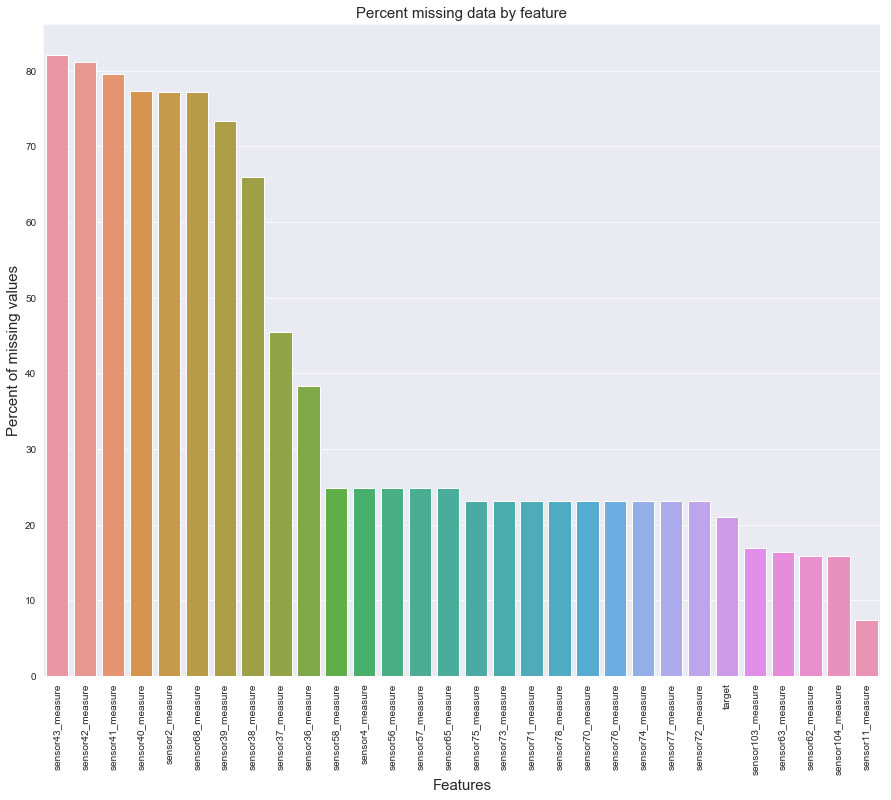

In [9]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

Rinse and repeat with zeroes in the data

In [10]:
all_data1 = all_data.replace({'0':np.nan, 0:np.nan})
all_data_zero = (all_data1.isnull().sum() / len(all_data1)) * 100
all_data_zero = all_data_zero.drop(all_data_zero[all_data_zero == 0].index).sort_values(ascending=False)[:30]
zero_data = pd.DataFrame({'Zero Density' :all_data_zero})
zero_data.head(100)

Zero Density
sensor58_measure               99.983
sensor19_measure               99.961
sensor21_measure               99.896
sensor68_measure               99.875
sensor85_measure               99.672
sensor7_histogram_bin0         99.661
sensor87_measure               99.624
sensor106_measure              99.571
sensor88_measure               99.570
sensor100_measure              99.509
sensor86_measure               99.471
sensor11_measure               99.372
sensor107_measure              99.192
sensor76_measure               99.107
sensor24_histogram_bin9        99.072
sensor24_histogram_bin0        99.041
sensor101_measure              98.728
sensor7_histogram_bin1         98.713
target                         98.684
sensor81_measure               98.193
sensor24_histogram_bin1        98.101
sensor24_histogram_bin2        98.058
sensor24_histogram_bin3        97.928
sensor82_measure               97.338
sensor25_histogram_bin9        96.880
sensor5_measure                96.707
sensor64_histogram_bin0        96.612
sensor6_measure                96.588
sensor24_histogram_bin4        96.376
sensor18_measure               96.042

There are an unbelievable number of zeroes in some of the features

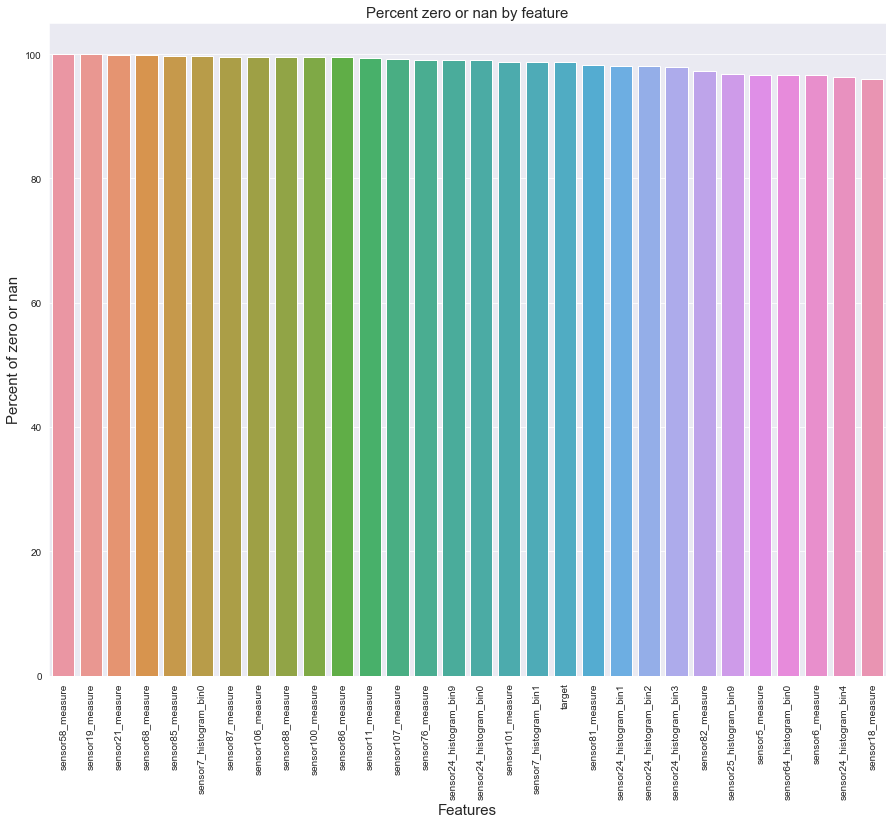

In [11]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_zero.index, y=all_data_zero)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of zero or nan', fontsize=15)
plt.title('Percent zero or nan by feature', fontsize=15)
plt.show()

it looks like there's are some strong correlations (horizontal/vertical line is sensor 54, fake correlation)
Sensor 54 data:

count     59324.000

mean    1209600.000

std           0.000

min     1209600.000

25%     1209600.000

50%     1209600.000

75%     1209600.000

max     1209600.000

Name: sensor54_measure, dtype: float64

**NOTE: right click open image in new tab for jumbo**

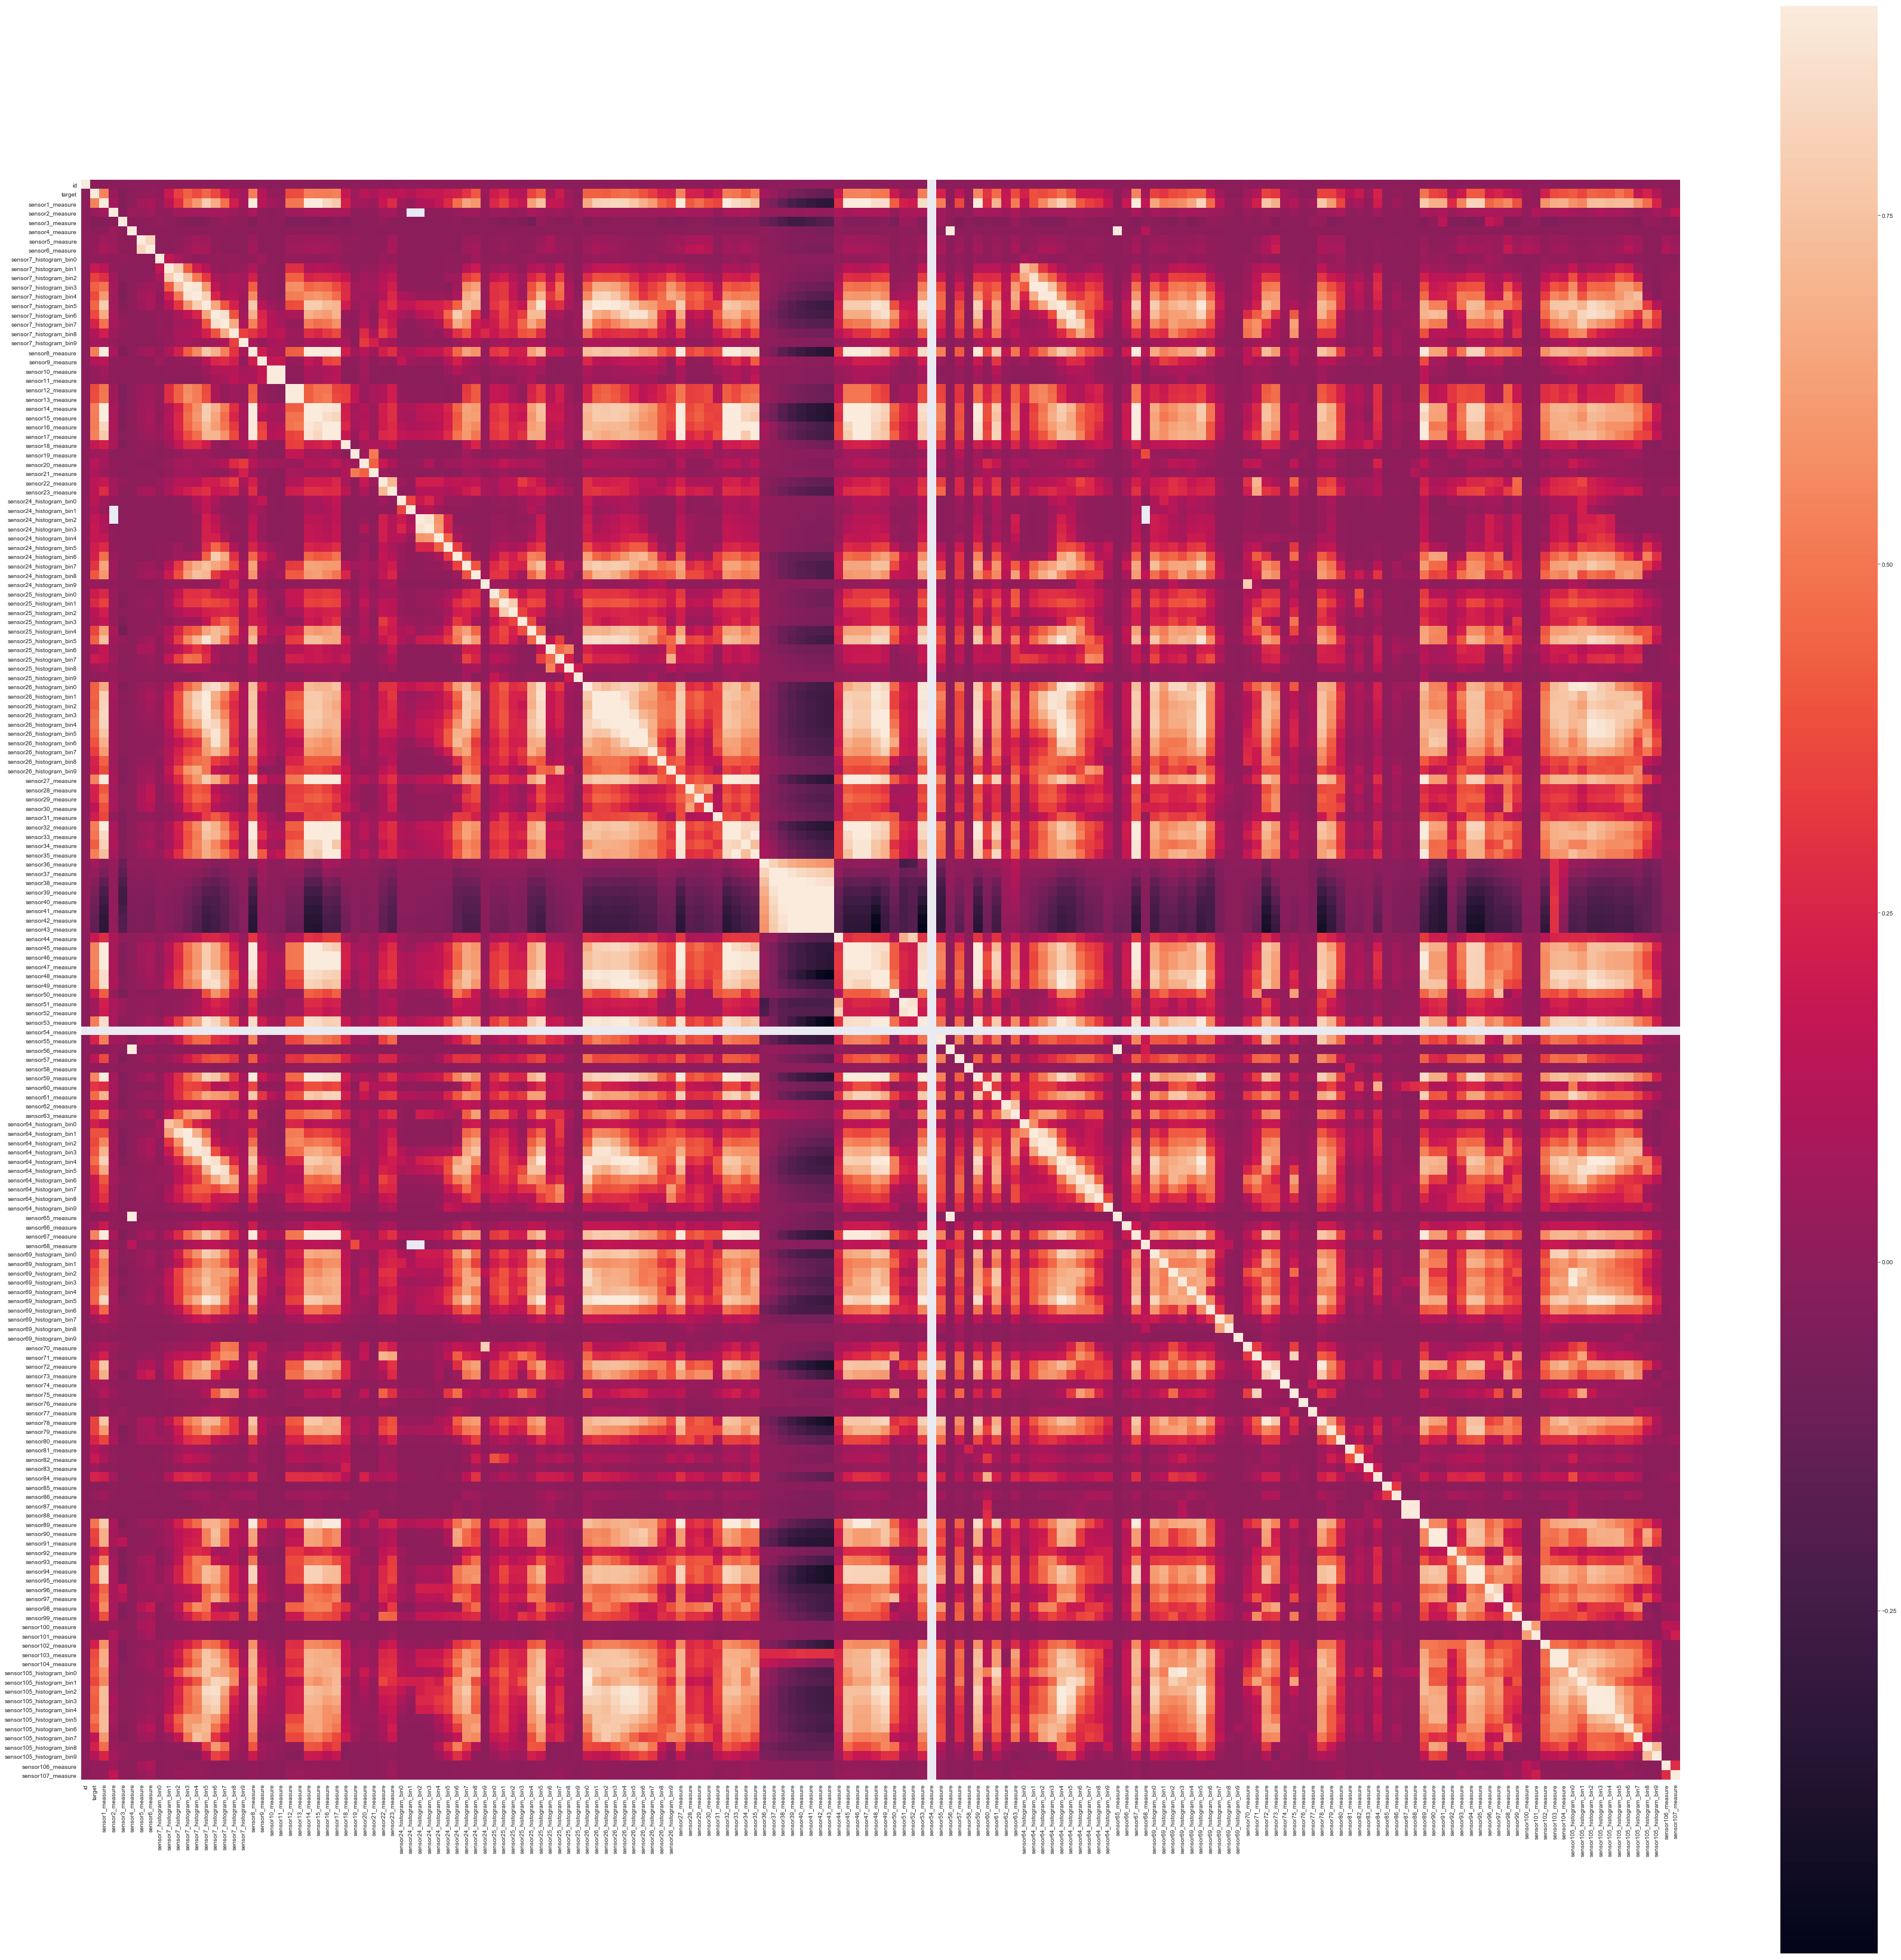

In [34]:
corrmat = df_training_full.corr()
plt.subplots(figsize=(60,60))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

Let's log transform the exponential distributions so that the tails actually show up

In [35]:
# lots of exponential distributions... lets log transform

for c in numeric_cols:
    data = df_training_full[c].replace({0:np.nan}).dropna()
    if data.mean(axis=0)/data.median() > 2 or (data.max(axis=0)-data.median())/(data.median()-data.min(axis=0))>5:
        
        # ==== you can comment out this line with a '#' to see the difference in the graphs below
        df_training_full[c] = np.log(1+data)
        # ====
        
        all_data[c] = np.log(1+data)
        print(c)

sensor100_measure
sensor101_measure
sensor102_measure
sensor103_measure
sensor104_measure
sensor105_histogram_bin0
sensor105_histogram_bin1
sensor105_histogram_bin2
sensor105_histogram_bin3
sensor105_histogram_bin4
sensor105_histogram_bin5
sensor105_histogram_bin6
sensor105_histogram_bin7
sensor105_histogram_bin8
sensor105_histogram_bin9
sensor106_measure
sensor107_measure
sensor10_measure
sensor11_measure
sensor12_measure
sensor13_measure
sensor14_measure
sensor15_measure
sensor16_measure
sensor17_measure
sensor18_measure
sensor19_measure
sensor1_measure
sensor20_measure
sensor21_measure
sensor22_measure
sensor23_measure
sensor24_histogram_bin0
sensor24_histogram_bin1
sensor24_histogram_bin2
sensor24_histogram_bin3
sensor24_histogram_bin4
sensor24_histogram_bin5
sensor24_histogram_bin6
sensor24_histogram_bin7
sensor24_histogram_bin8
sensor24_histogram_bin9
sensor25_histogram_bin0
sensor25_histogram_bin1
sensor25_histogram_bin2
sensor25_histogram_bin3
sensor25_histogram_bin4
sensor25_h

c:\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


sensor36_measure
sensor37_measure
sensor3_measure
sensor44_measure
sensor45_measure
sensor46_measure
sensor47_measure
sensor48_measure
sensor49_measure
sensor4_measure
sensor50_measure
sensor53_measure
sensor55_measure
sensor56_measure
sensor57_measure
sensor59_measure
sensor5_measure
sensor60_measure
sensor61_measure
sensor62_measure


c:\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


sensor63_measure
sensor64_histogram_bin0
sensor64_histogram_bin1
sensor64_histogram_bin2
sensor64_histogram_bin3
sensor64_histogram_bin4
sensor64_histogram_bin5
sensor64_histogram_bin6
sensor64_histogram_bin7
sensor64_histogram_bin8
sensor64_histogram_bin9
sensor65_measure
sensor66_measure
sensor67_measure
sensor68_measure
sensor69_histogram_bin0
sensor69_histogram_bin1
sensor69_histogram_bin2
sensor69_histogram_bin3
sensor69_histogram_bin4
sensor69_histogram_bin5
sensor69_histogram_bin6
sensor69_histogram_bin7
sensor69_histogram_bin8
sensor69_histogram_bin9
sensor6_measure
sensor70_measure
sensor71_measure
sensor72_measure
sensor73_measure
sensor74_measure
sensor75_measure
sensor76_measure
sensor77_measure
sensor78_measure
sensor79_measure
sensor7_histogram_bin0
sensor7_histogram_bin1
sensor7_histogram_bin2
sensor7_histogram_bin3
sensor7_histogram_bin4
sensor7_histogram_bin5
sensor7_histogram_bin6
sensor7_histogram_bin7
sensor7_histogram_bin8
sensor7_histogram_bin9
sensor80_measure
se

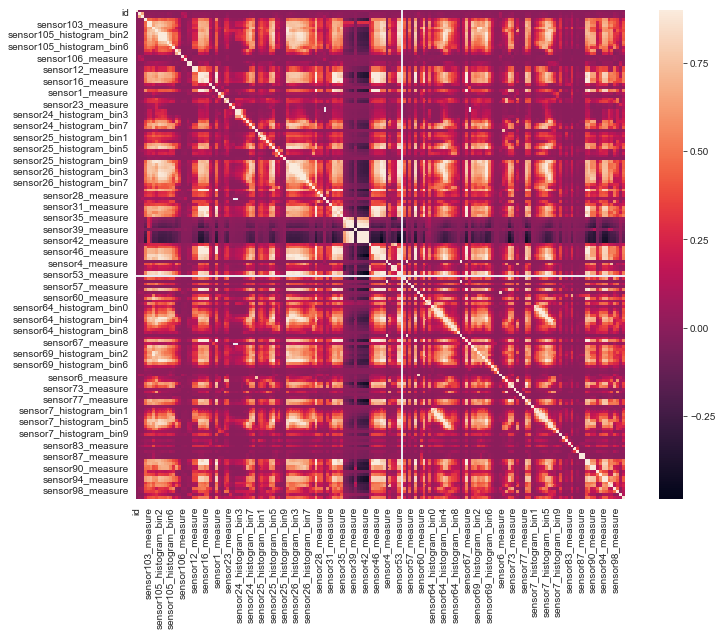

In [14]:
corrmat = all_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

Draw out the graphs so we can correct any problems that stick out

Missing 0%, Zero 99.50921698398705%
count   293.000
mean      2.294
std       1.376
min       1.099
25%       1.099
50%       1.946
75%       2.708
max       7.255
Name: sensor100_measure, dtype: float64


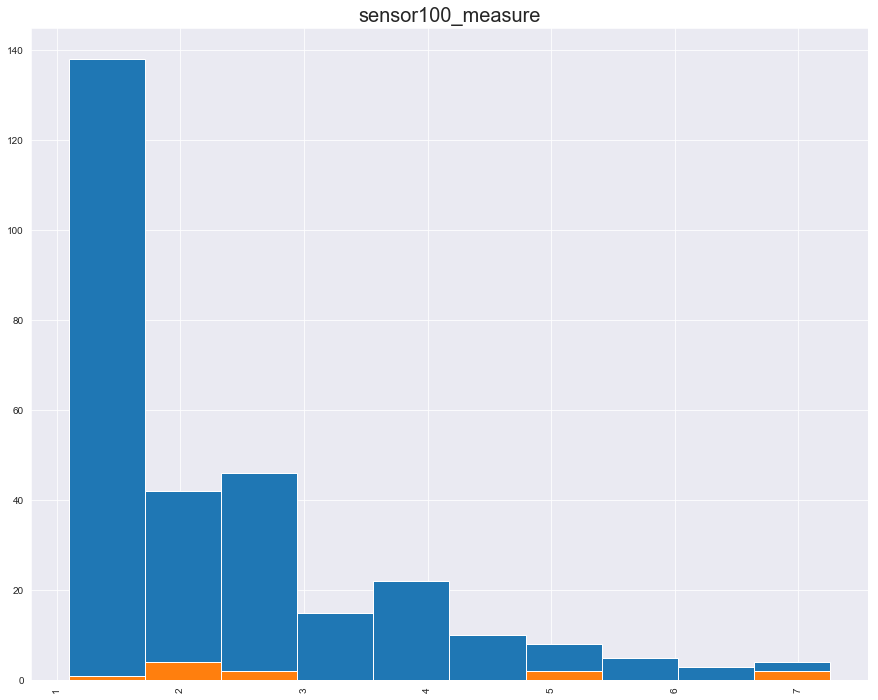

Missing 0%, Zero 98.72764832041683%
count   742.000
mean      3.012
std       1.701
min       1.099
25%       1.609
50%       2.708
75%       4.205
max       9.049
Name: sensor101_measure, dtype: float64


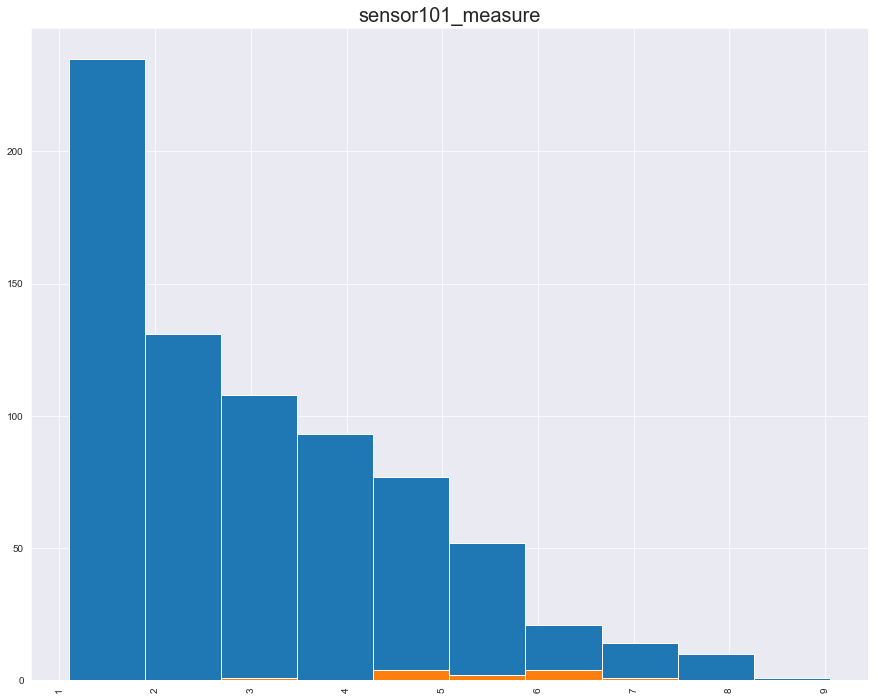

Missing 0%, Zero 0%
count   34544.000
mean       14.896
std         1.862
min         2.398
25%        13.648
50%        14.652
75%        16.223
max        21.003
Name: sensor102_measure, dtype: float64


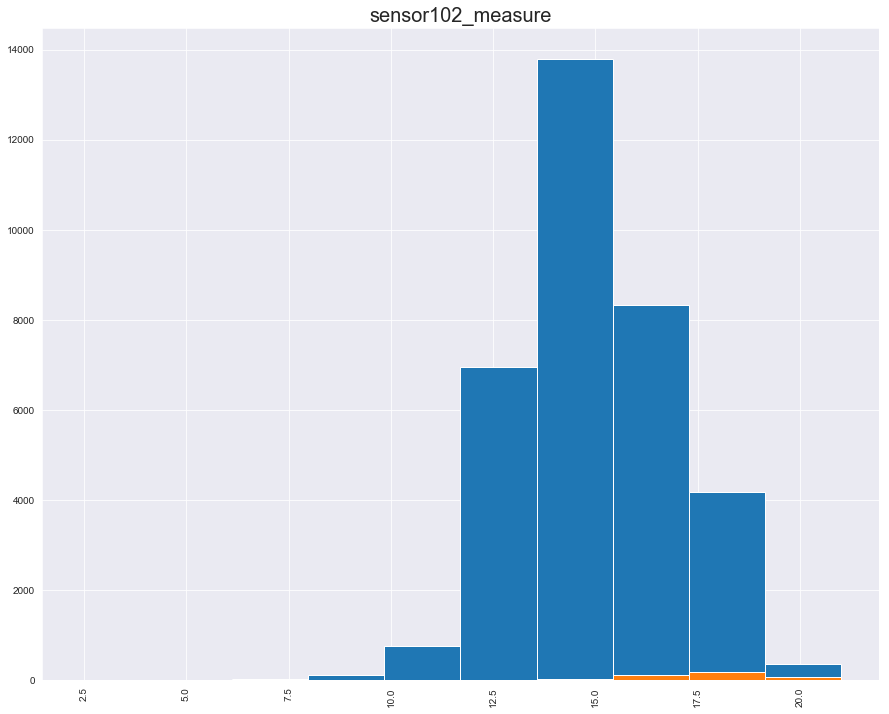

Missing 16.951092748779622%, Zero 0%
count   48485.000
mean        5.972
std         1.996
min         0.020
25%         4.867
50%         6.672
75%         7.248
max        11.571
Name: sensor103_measure, dtype: float64


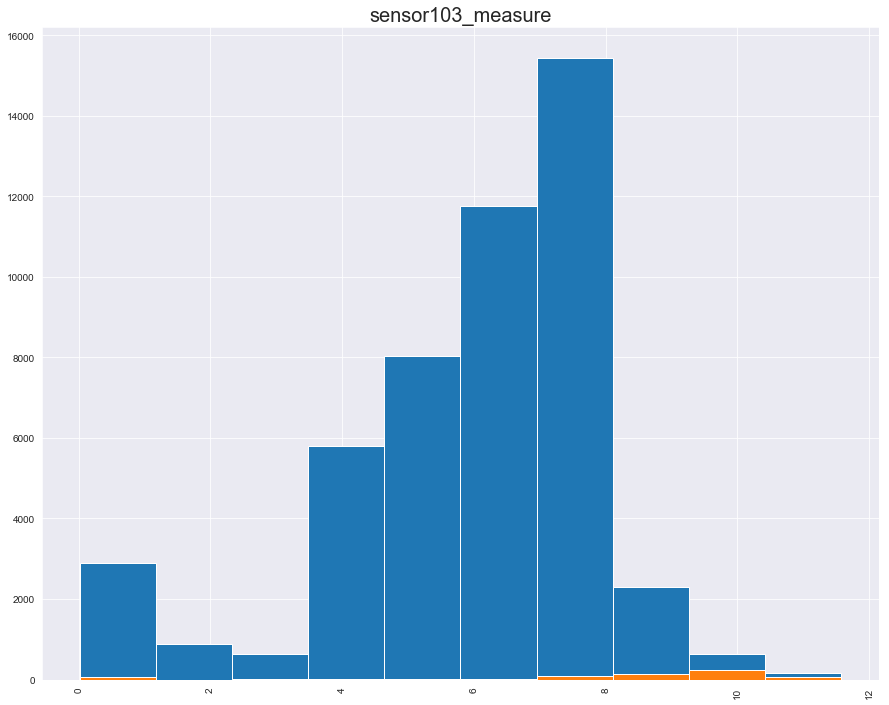

Missing 15.805055196642147%, Zero 0%
count   49029.000
mean        6.208
std         1.605
min         1.099
25%         4.727
50%         6.770
75%         7.335
max        11.324
Name: sensor104_measure, dtype: float64


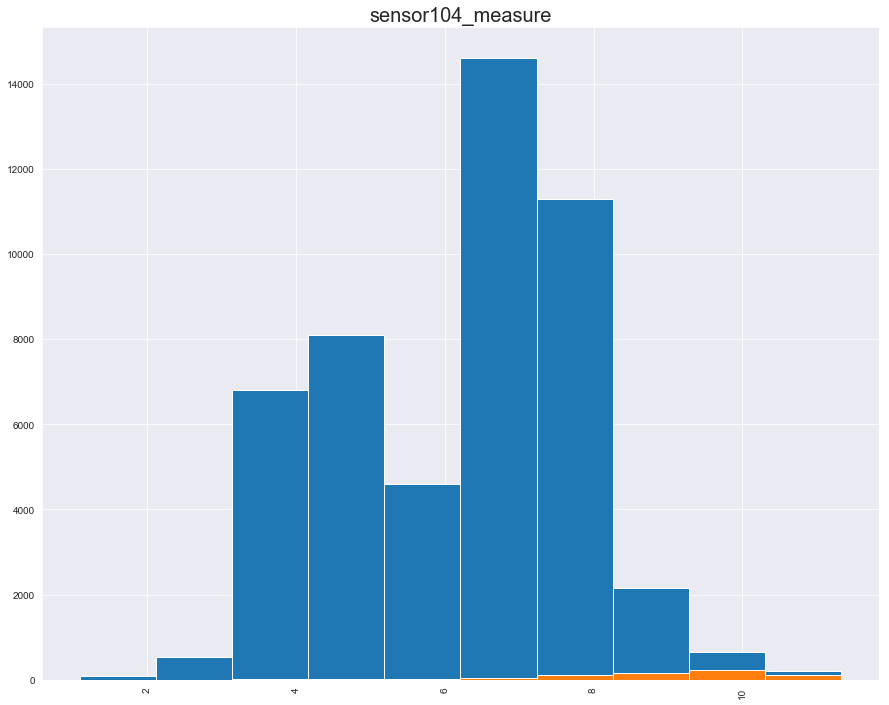

Missing 0%, Zero 0%
count   58240.000
mean       11.781
std         2.125
min         2.398
25%         9.782
50%        12.506
75%        13.277
max        18.133
Name: sensor105_histogram_bin0, dtype: float64


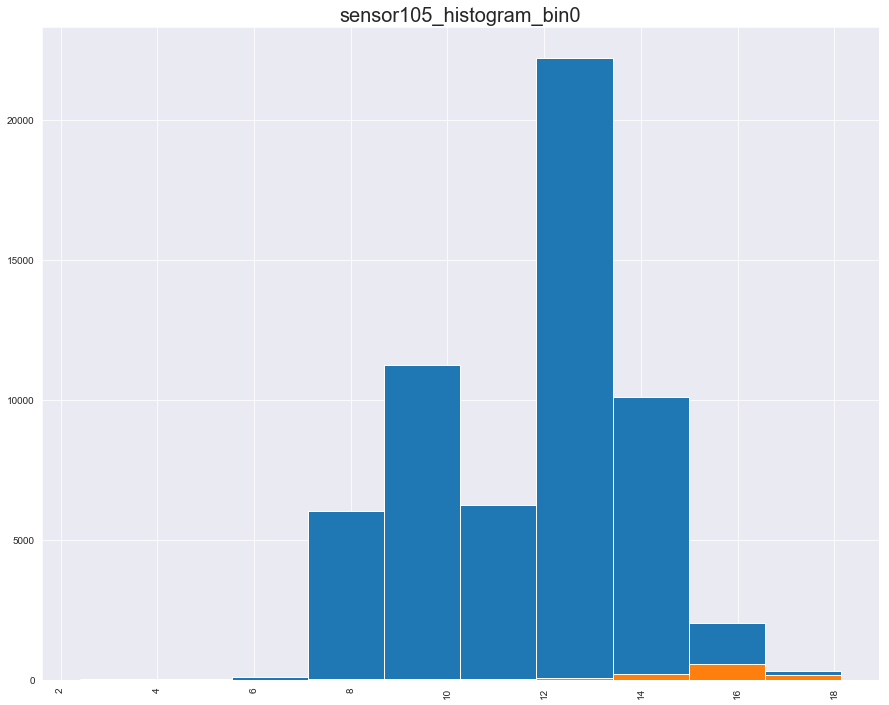

Missing 0%, Zero 0%
count   58172.000
mean       11.568
std         2.549
min         1.099
25%         9.149
50%        12.789
75%        13.426
max        18.403
Name: sensor105_histogram_bin1, dtype: float64


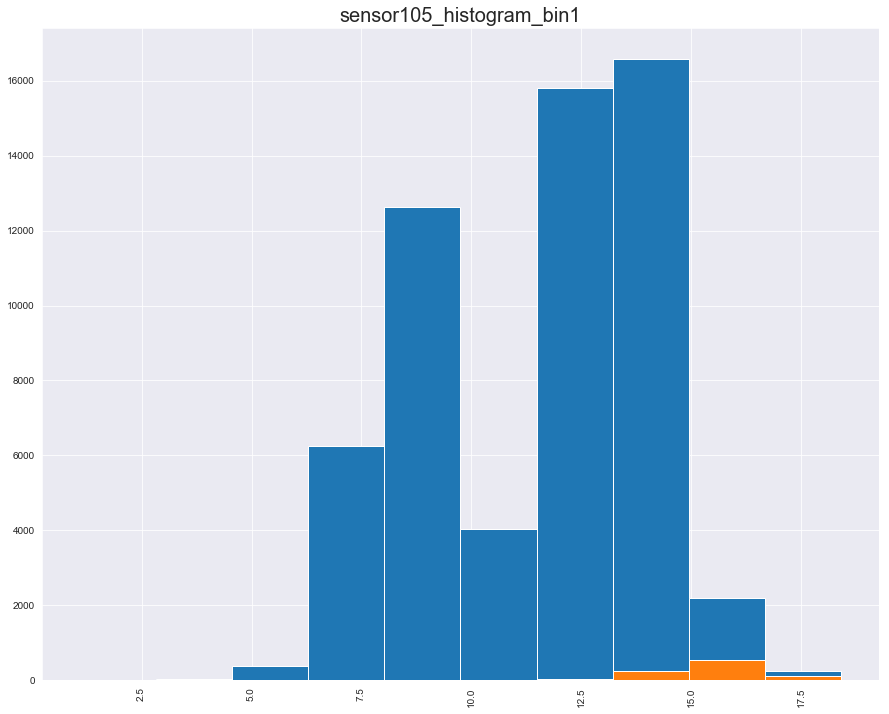

Missing 0%, Zero 0%
count   57965.000
mean       10.713
std         3.177
min         1.099
25%         8.177
50%        12.409
75%        13.007
max        18.171
Name: sensor105_histogram_bin2, dtype: float64


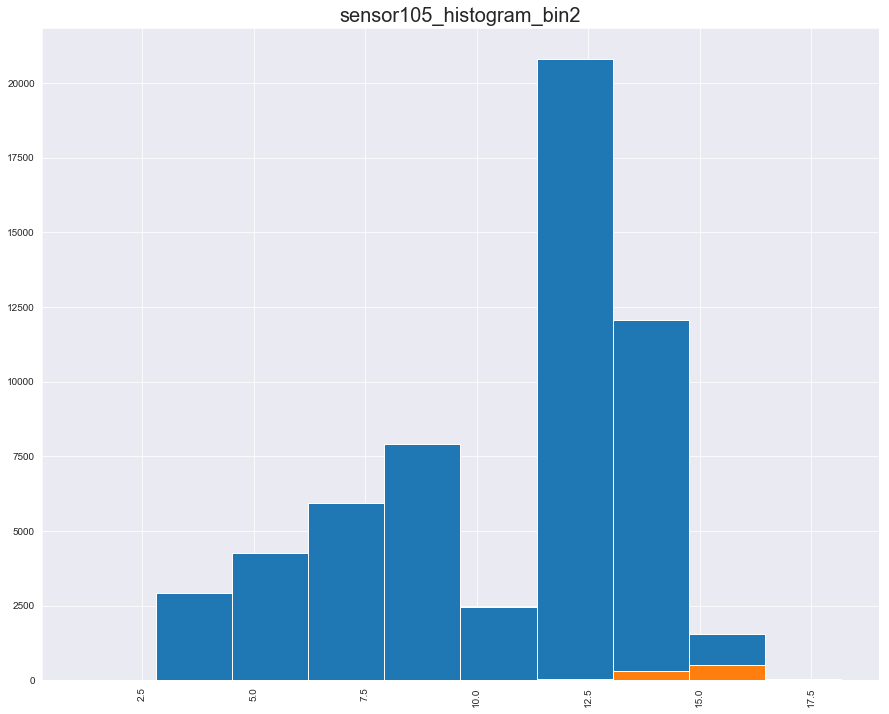

Missing 0%, Zero 0%
count   57772.000
mean        9.852
std         3.407
min         1.099
25%         7.338
50%        11.678
75%        12.311
max        17.447
Name: sensor105_histogram_bin3, dtype: float64


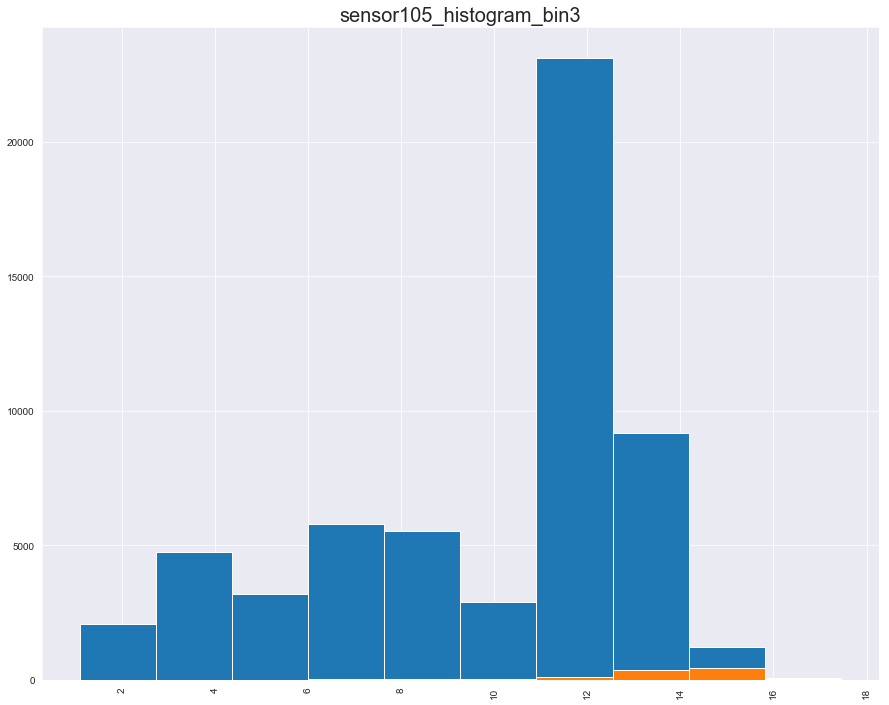

Missing 0%, Zero 0%
count   57532.000
mean       10.577
std         3.498
min         1.099
25%         8.288
50%        12.383
75%        13.075
max        18.392
Name: sensor105_histogram_bin4, dtype: float64


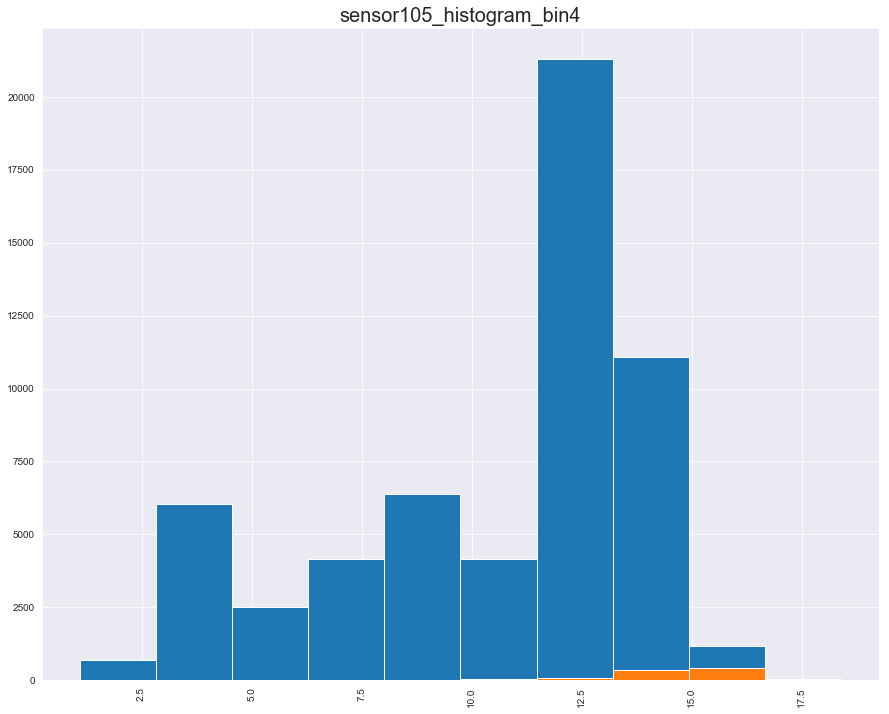

Missing 0%, Zero 0%
count   56515.000
mean       10.641
std         3.462
min         1.099
25%         8.954
50%        12.273
75%        12.943
max        17.866
Name: sensor105_histogram_bin5, dtype: float64


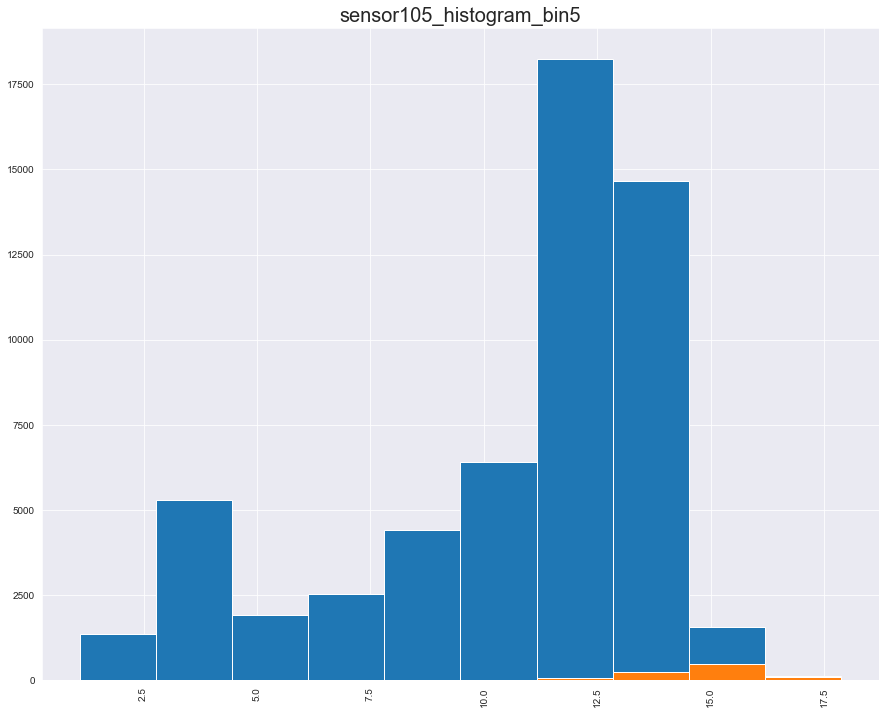

Missing 0%, Zero 0%
count   54871.000
mean       10.046
std         3.572
min         1.099
25%         7.565
50%        11.797
75%        12.589
max        17.269
Name: sensor105_histogram_bin6, dtype: float64


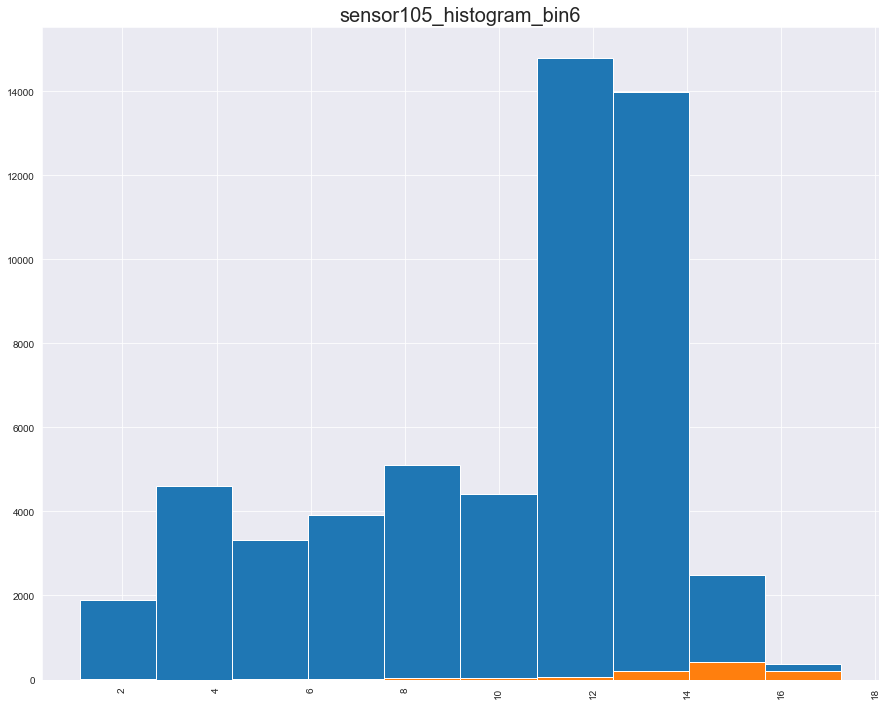

Missing 0%, Zero 0%
count   51431.000
mean        9.917
std         3.424
min         1.099
25%         8.007
50%        11.219
75%        12.169
max        18.599
Name: sensor105_histogram_bin7, dtype: float64


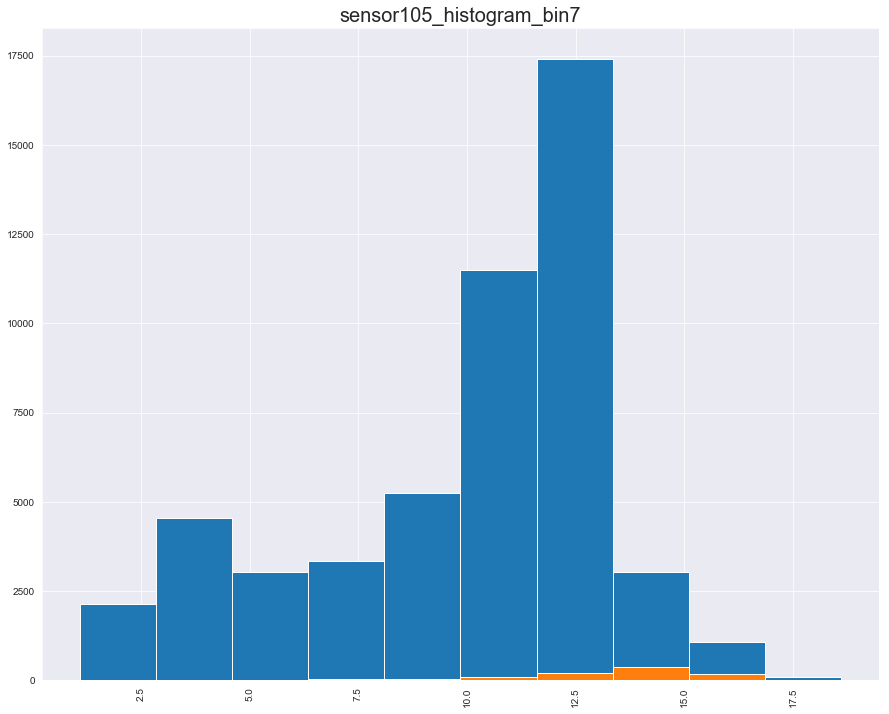

Missing 0%, Zero 0%
count   42049.000
mean        9.748
std         3.311
min         1.099
25%         7.391
50%        10.976
75%        12.303
max        16.774
Name: sensor105_histogram_bin8, dtype: float64


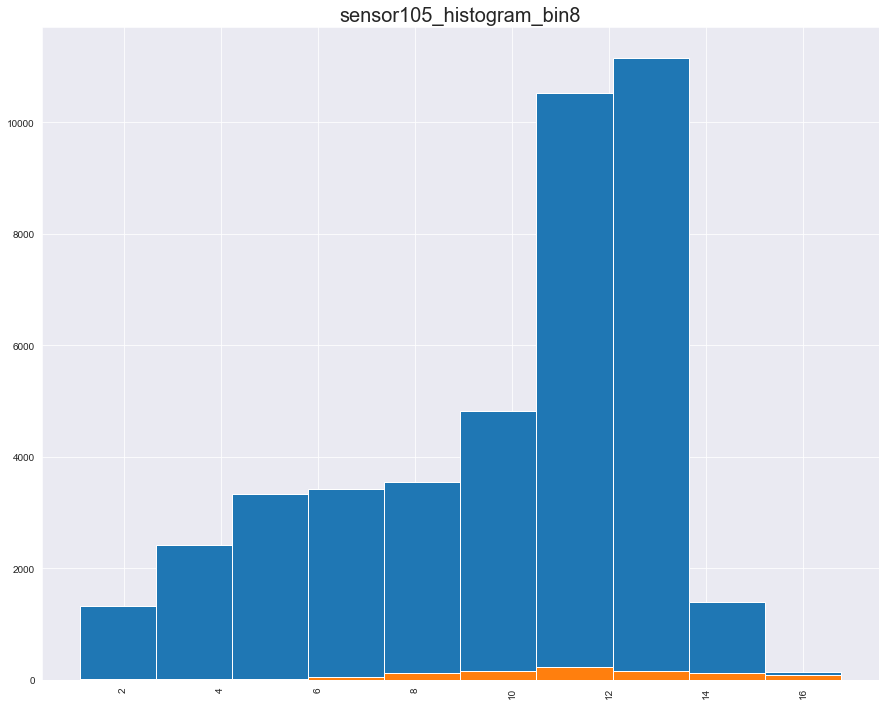

Missing 0%, Zero 0%
count   27466.000
mean        7.447
std         2.703
min         1.099
25%         5.442
50%         7.939
75%         9.534
max        15.153
Name: sensor105_histogram_bin9, dtype: float64


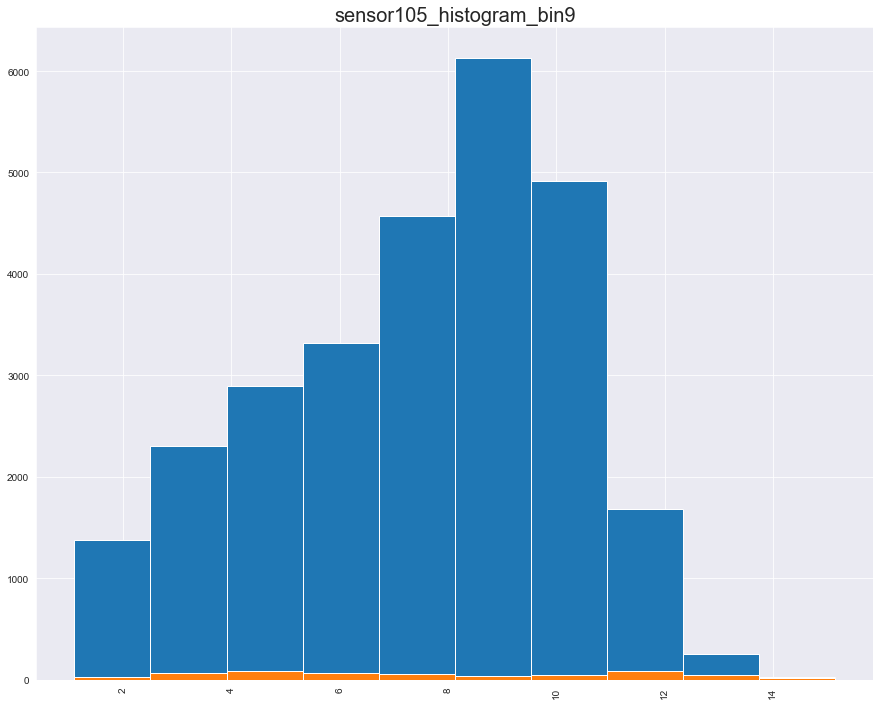

Missing 0%, Zero 99.571058275549%
count   255.000
mean      1.802
std       1.154
min       1.099
25%       1.099
50%       1.099
75%       1.946
max       6.180
Name: sensor106_measure, dtype: float64


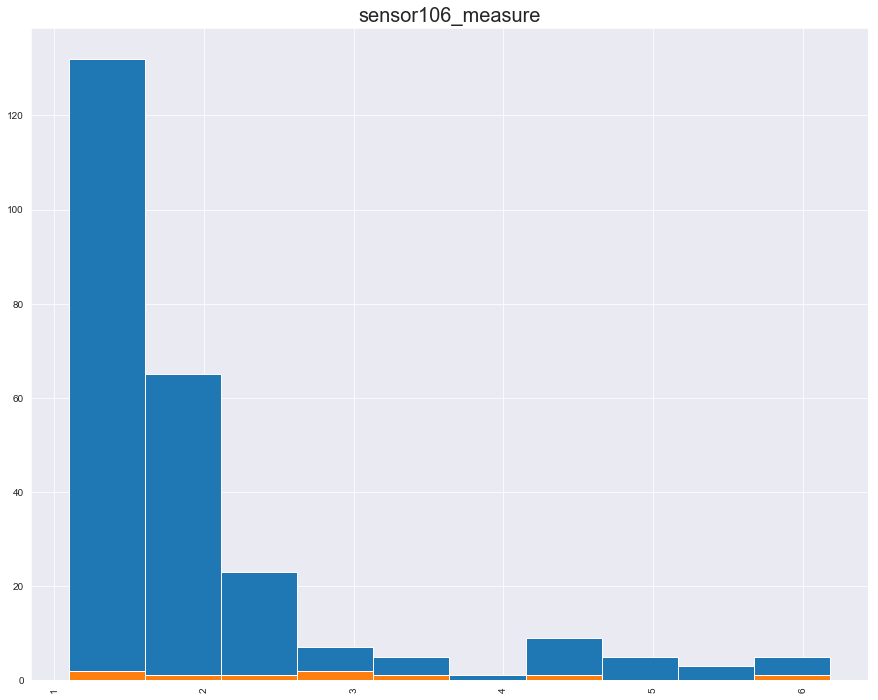

Missing 0%, Zero 99.19211589321193%
count   483.000
mean      2.066
std       1.177
min       1.099
25%       1.099
50%       1.609
75%       2.398
max       7.045
Name: sensor107_measure, dtype: float64


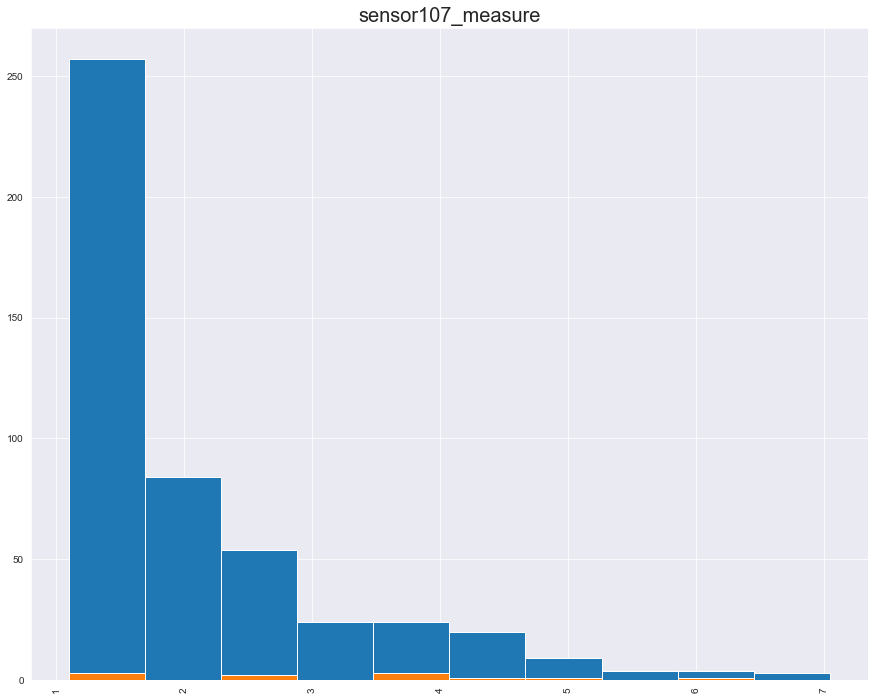

Missing 0%, Zero 0%
count   12452.000
mean        4.891
std         1.285
min         1.099
25%         4.078
50%         4.762
75%         5.352
max        15.544
Name: sensor10_measure, dtype: float64


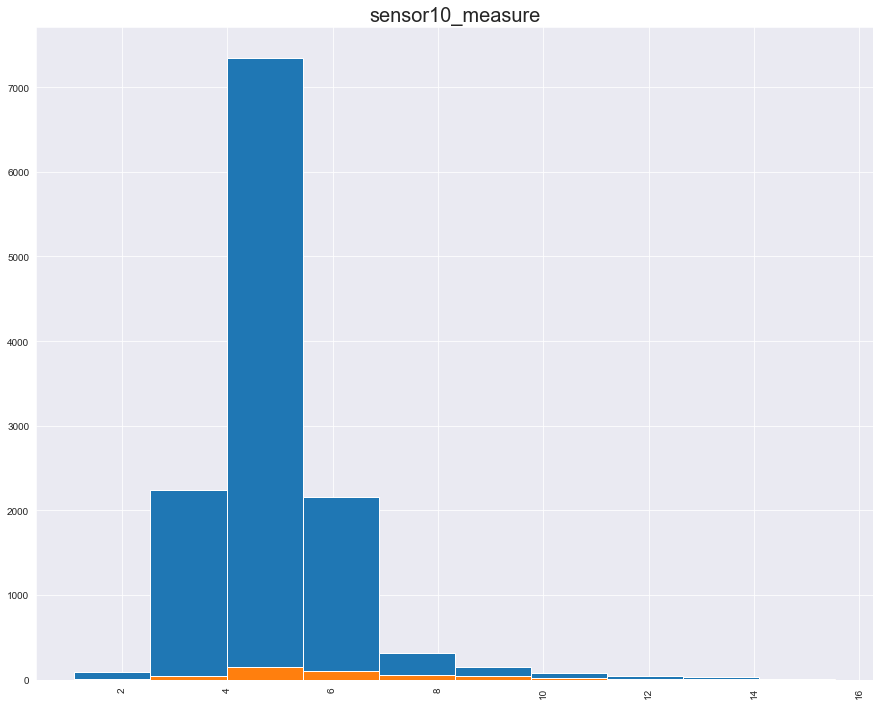

Missing 7.365692556676885%, Zero 99.37237667925422%
count   373.000
mean      7.637
std       2.122
min       4.007
25%       6.395
50%       6.395
75%       8.520
max      16.162
Name: sensor11_measure, dtype: float64


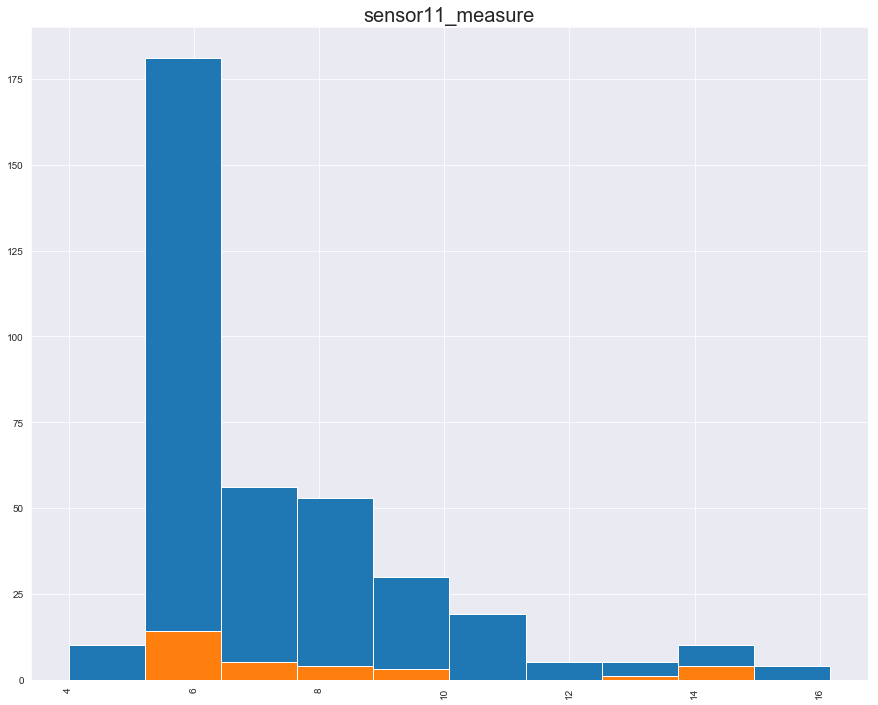

Missing 0%, Zero 0%
count   21885.000
mean        8.506
std         2.571
min         1.099
25%         6.730
50%         8.053
75%         9.892
max        17.364
Name: sensor12_measure, dtype: float64


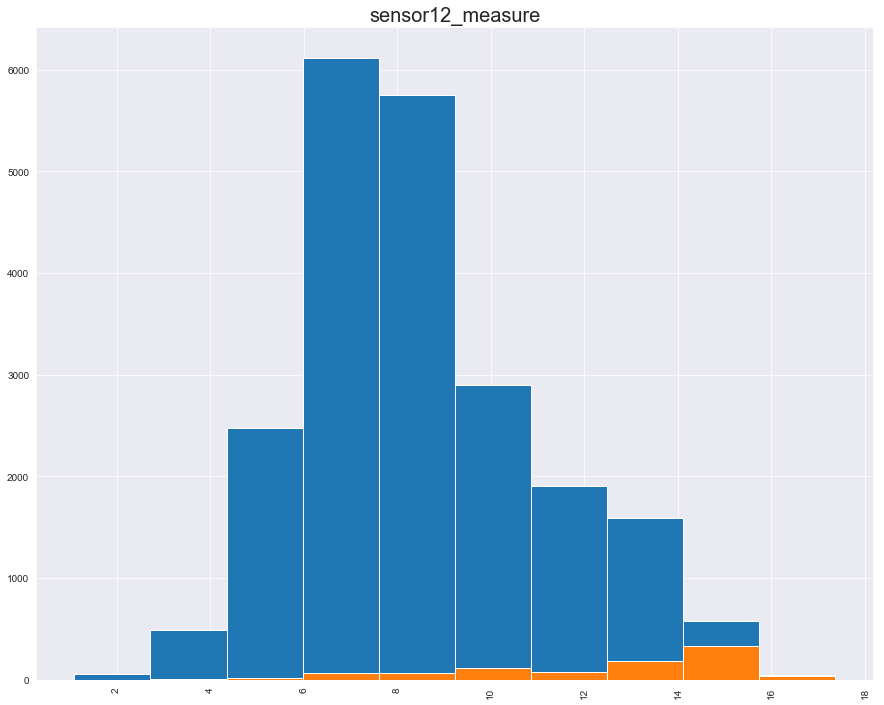

Missing 0%, Zero 0%
count   22076.000
mean        9.085
std         2.453
min         2.197
25%         7.345
50%         8.640
75%        10.332
max        17.839
Name: sensor13_measure, dtype: float64


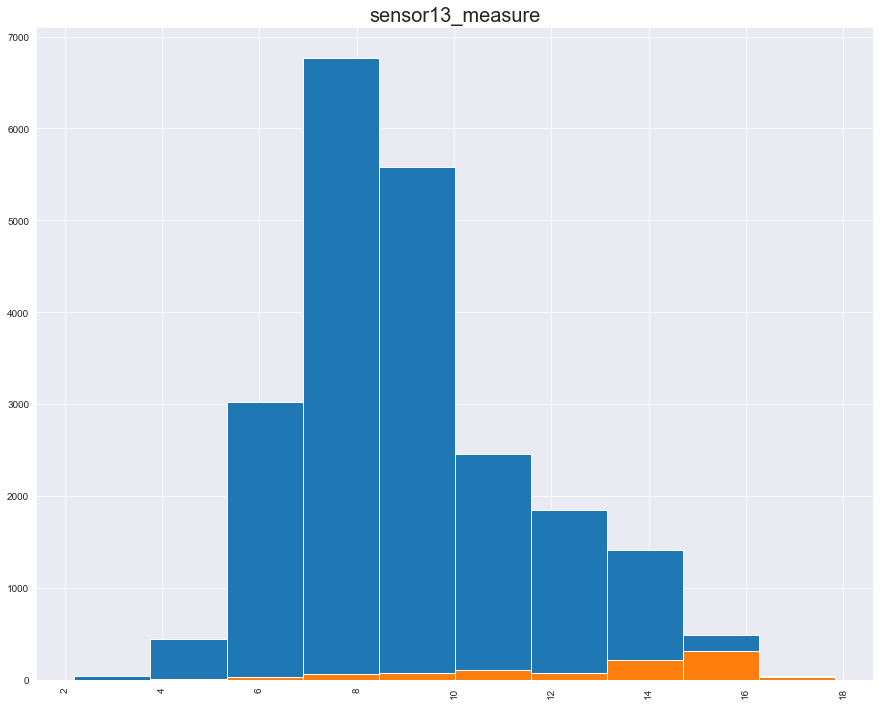

Missing 0%, Zero 0%
count   59229.000
mean       13.270
std         2.432
min         3.219
25%        11.213
50%        14.470
75%        14.958
max        18.763
Name: sensor14_measure, dtype: float64


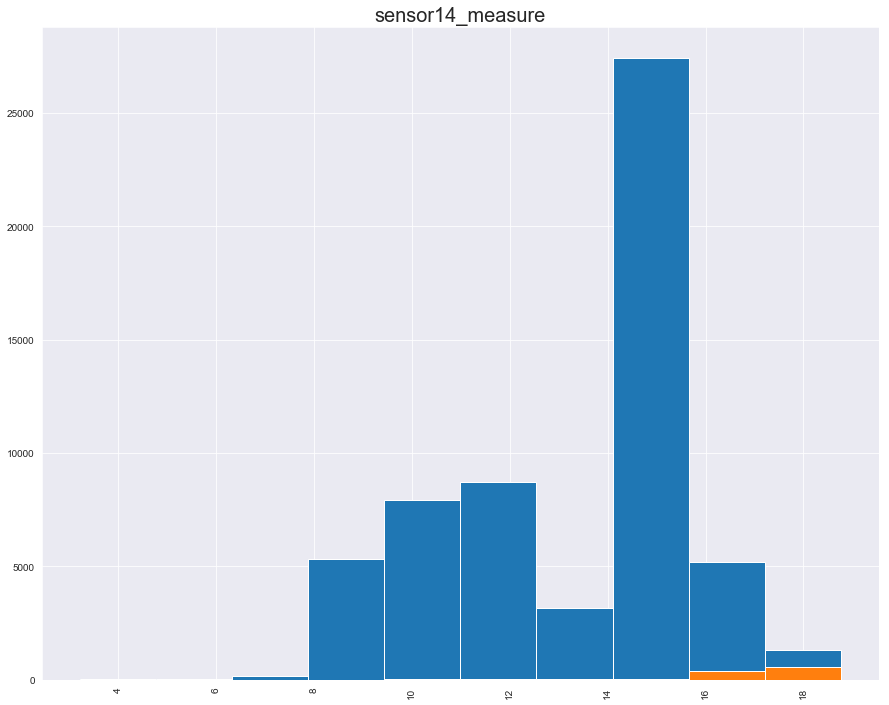

Missing 0%, Zero 0%
count   59271.000
mean       13.102
std         2.481
min         1.099
25%        11.104
50%        14.315
75%        14.802
max        18.621
Name: sensor15_measure, dtype: float64


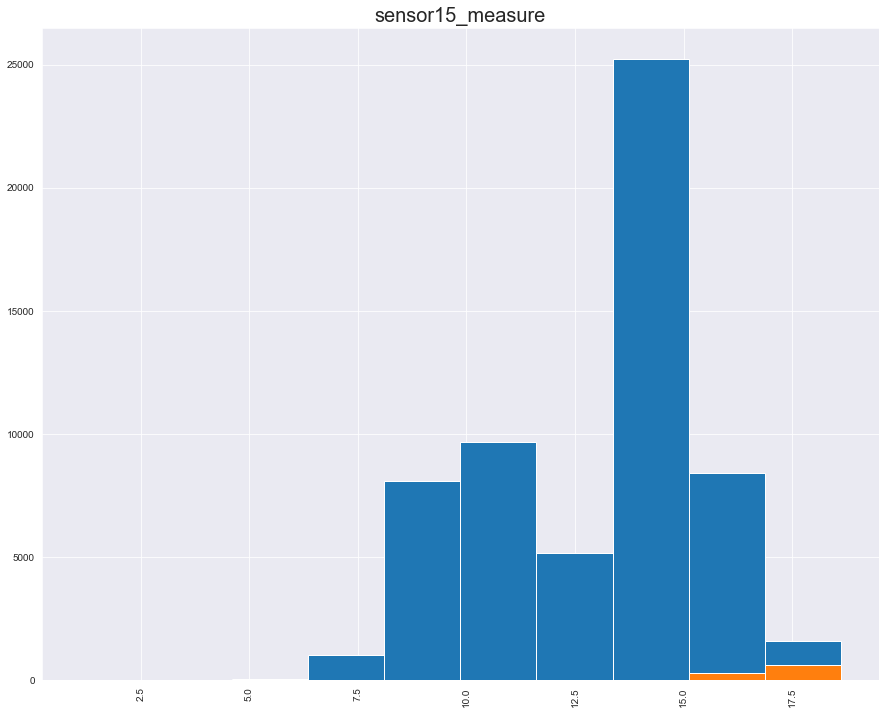

Missing 0%, Zero 0%
count   59245.000
mean       12.099
std         2.043
min         1.609
25%        10.148
50%        12.790
75%        13.495
max        18.171
Name: sensor16_measure, dtype: float64


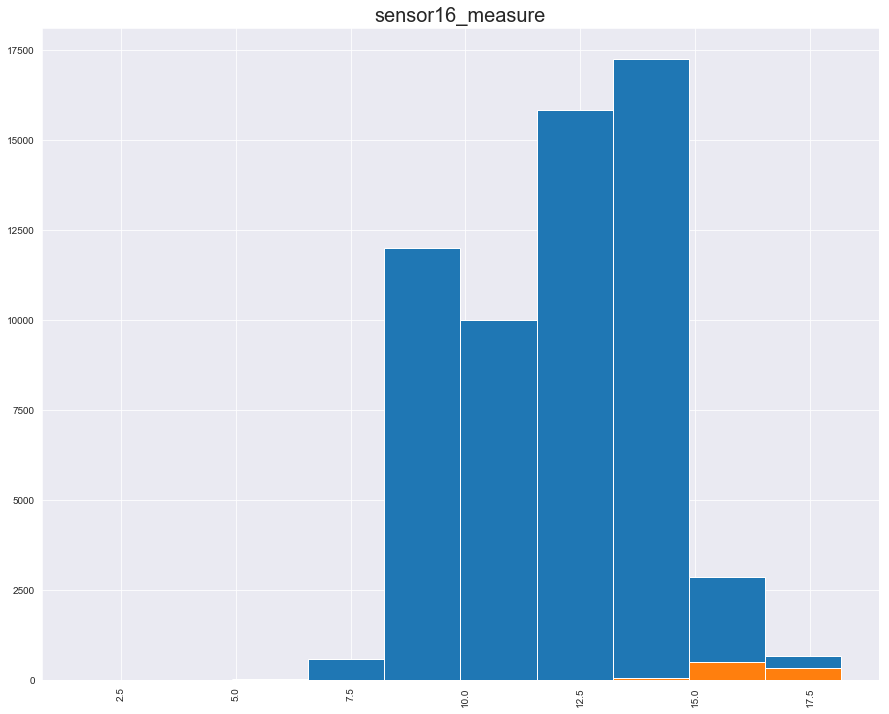

Missing 0%, Zero 0%
count   59181.000
mean       10.800
std         2.773
min         1.099
25%         8.359
50%        12.101
75%        12.843
max        17.057
Name: sensor17_measure, dtype: float64


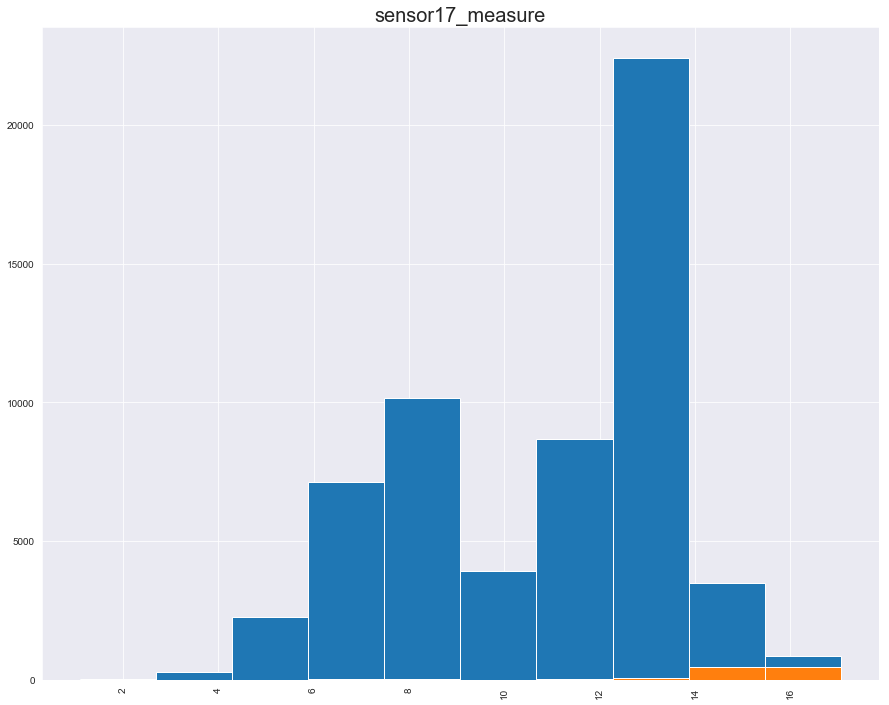

Missing 0%, Zero 96.04215734003499%
count   2349.000
mean       1.972
std        0.932
min        1.099
25%        1.099
50%        1.609
75%        2.565
max        5.861
Name: sensor18_measure, dtype: float64


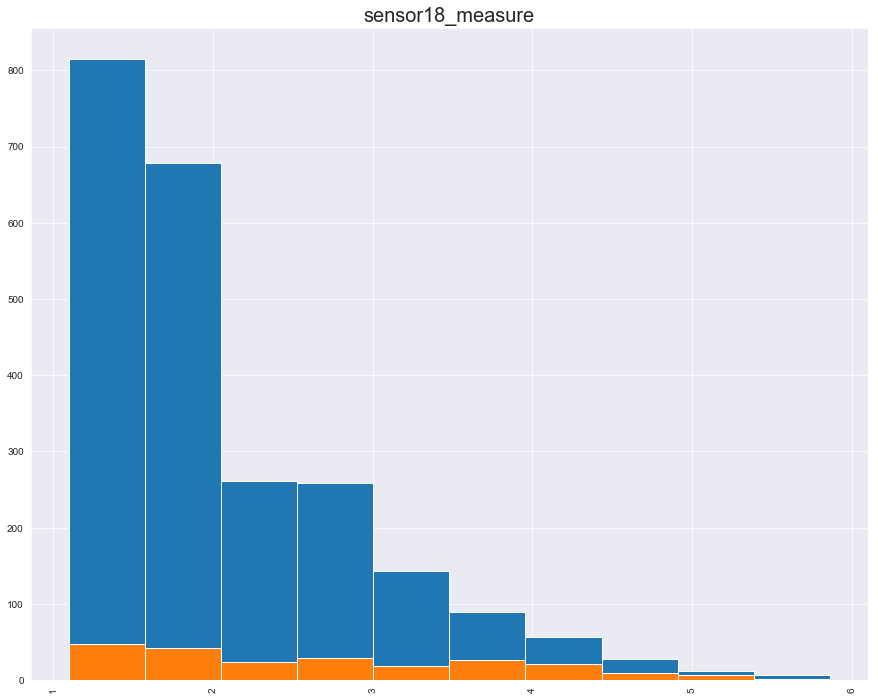

Missing 0%, Zero 99.96052683517323%
count   21.000
mean    10.985
std      3.083
min      1.609
25%      9.529
50%     11.766
75%     13.100
max     14.319
Name: sensor19_measure, dtype: float64


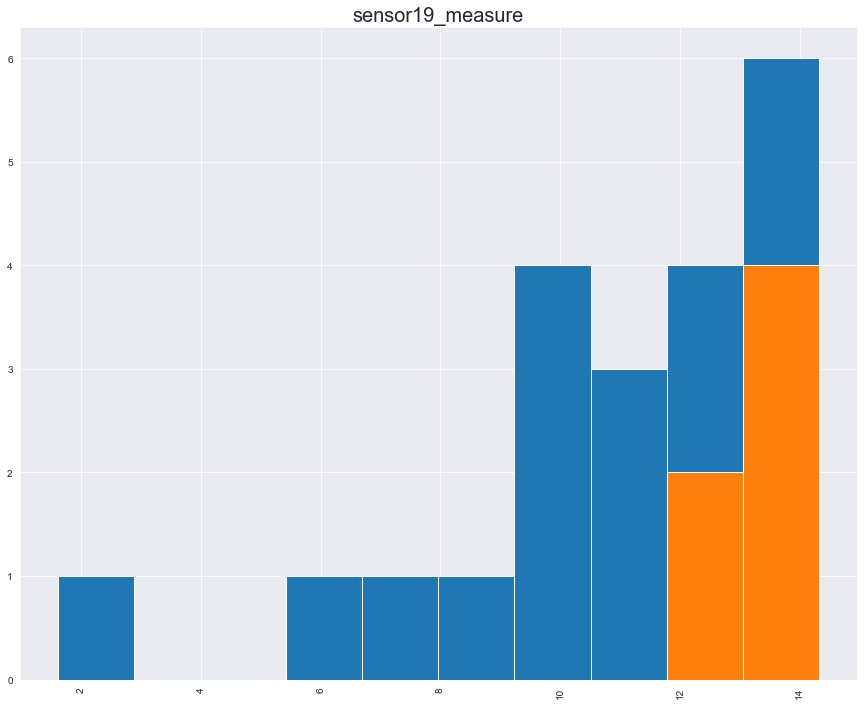

Missing 0%, Zero 0%
count   59607.000
mean        8.703
std         3.162
min         1.099
25%         6.804
50%        10.340
75%        10.799
max        14.826
Name: sensor1_measure, dtype: float64


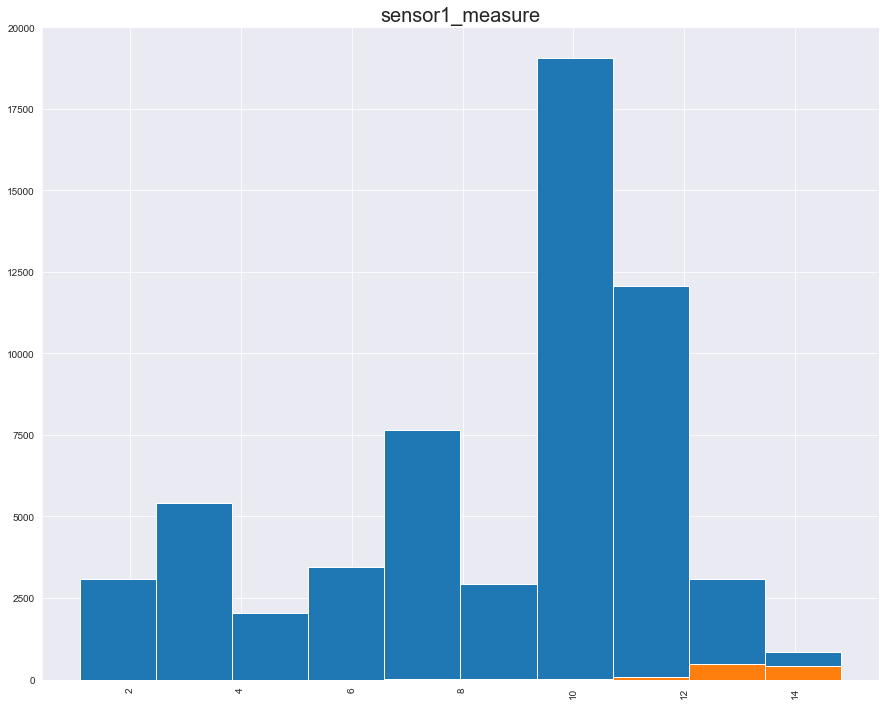

Missing 0%, Zero 0%
count   5976.000
mean       8.425
std        1.798
min        1.946
25%        7.172
50%        8.204
75%        9.410
max       16.157
Name: sensor20_measure, dtype: float64


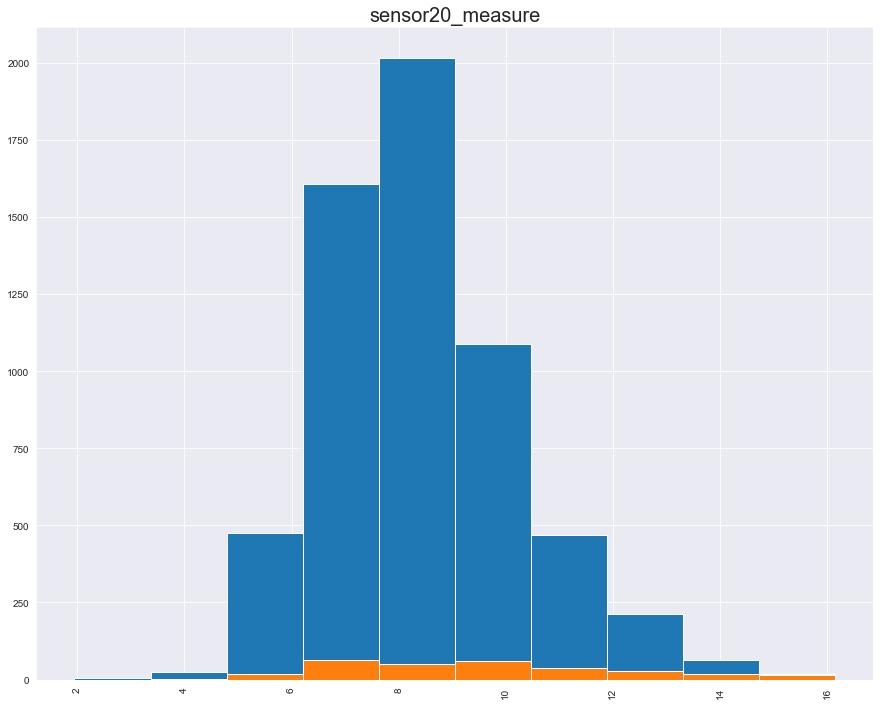

Missing 0%, Zero 99.89605399928948%
count   61.000
mean    10.134
std      2.584
min      2.565
25%      7.901
50%     10.096
75%     12.426
max     14.781
Name: sensor21_measure, dtype: float64


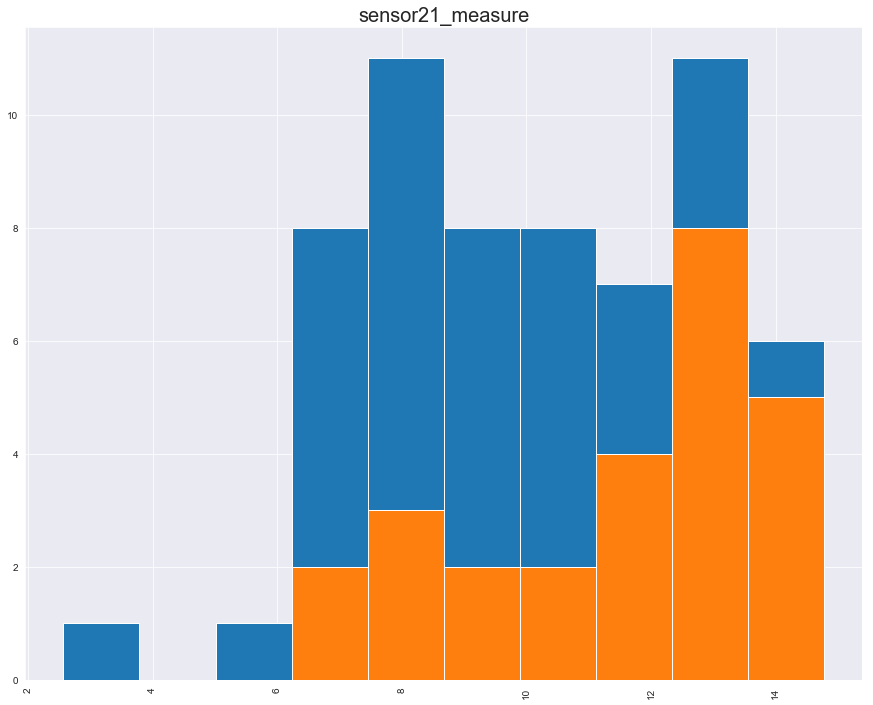

Missing 0%, Zero 0%
count   47492.000
mean        5.306
std         2.028
min         1.099
25%         3.664
50%         5.425
75%         6.801
max        13.585
Name: sensor22_measure, dtype: float64


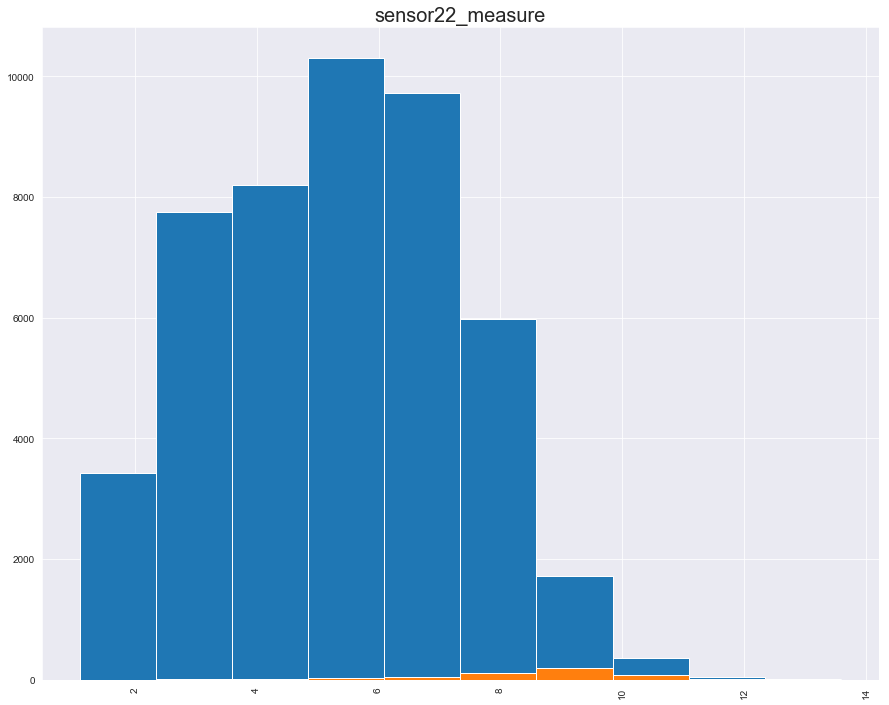

Missing 0%, Zero 0%
count   47308.000
mean        4.710
std         1.650
min         1.099
25%         3.555
50%         4.710
75%         5.814
max        11.667
Name: sensor23_measure, dtype: float64


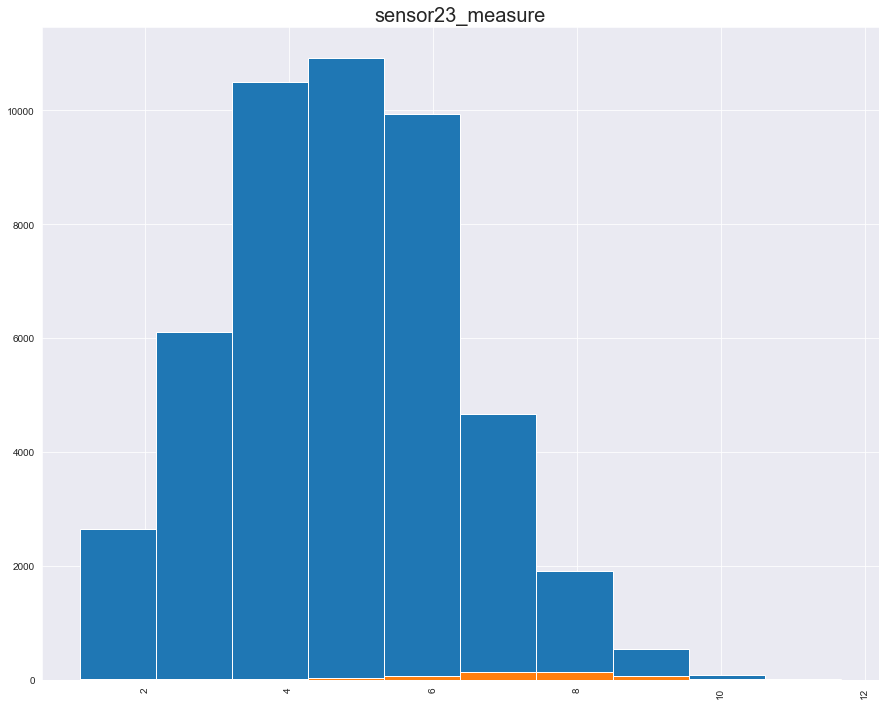

Missing 0%, Zero 99.04080209470928%
count   568.000
mean     11.024
std       2.672
min       1.099
25%      10.328
50%      10.483
75%      11.212
max      17.739
Name: sensor24_histogram_bin0, dtype: float64


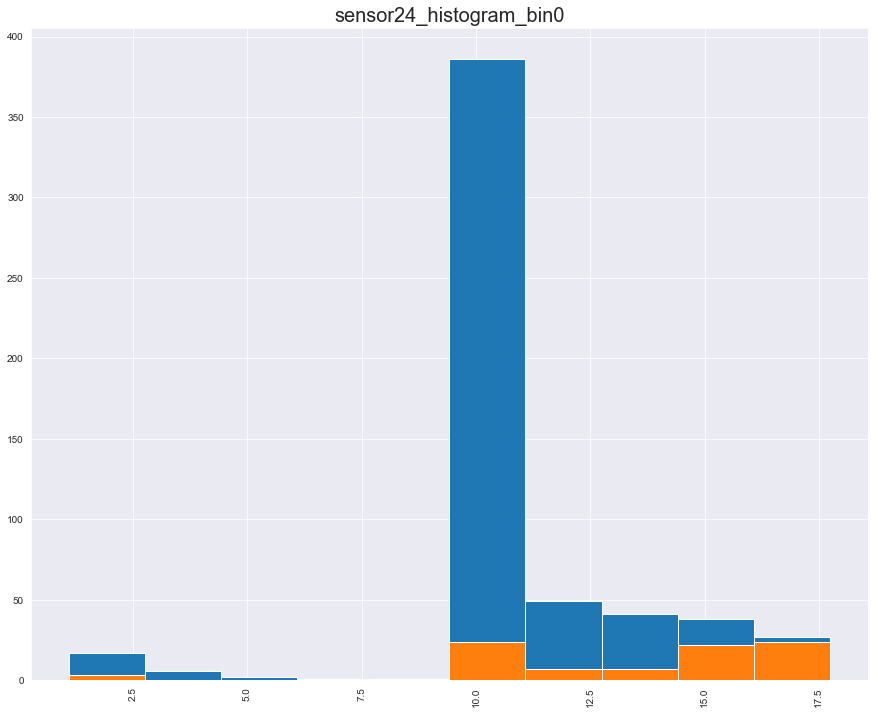

Missing 0%, Zero 98.10134077183194%
count   1137.000
mean       9.028
std        2.371
min        1.099
25%        7.233
50%        9.405
75%        9.720
max       18.204
Name: sensor24_histogram_bin1, dtype: float64


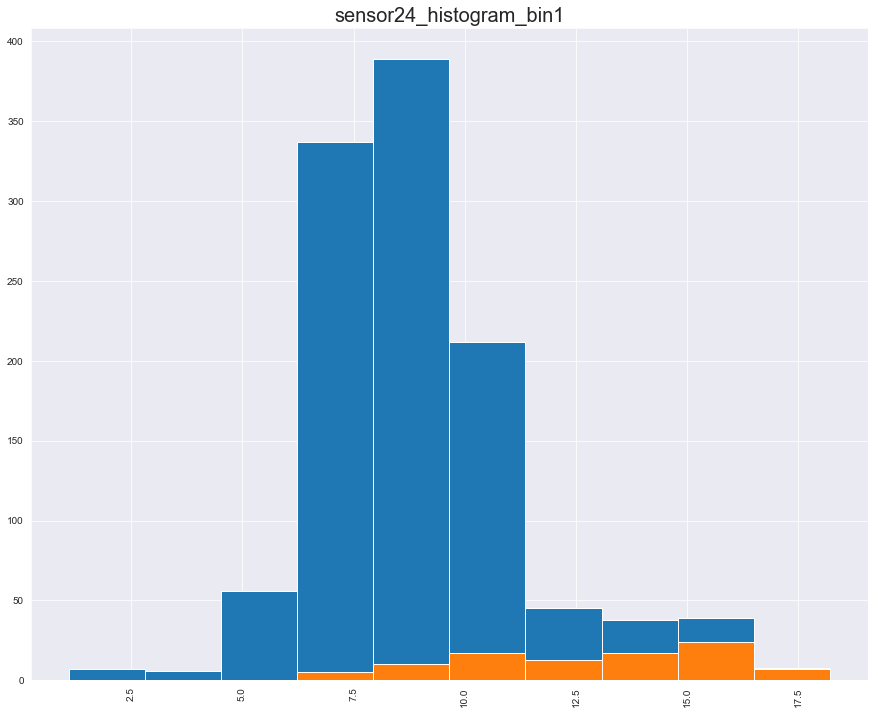

Missing 0%, Zero 98.05792029052249%
count   1167.000
mean       9.834
std        1.825
min        7.425
25%        8.798
50%        9.182
75%       10.059
max       17.165
Name: sensor24_histogram_bin2, dtype: float64


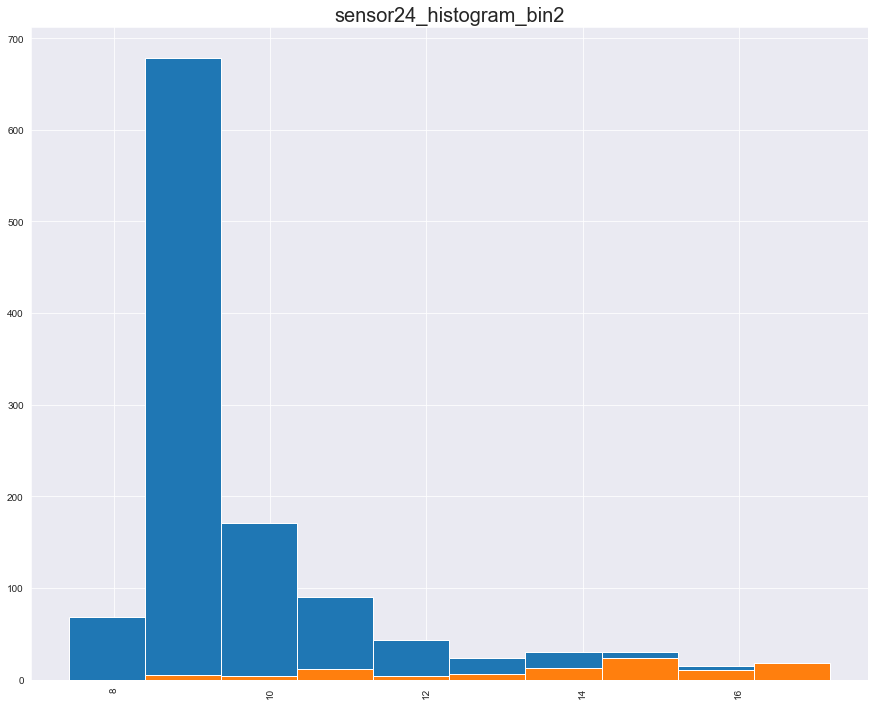

Missing 0%, Zero 97.92765884659413%
count   1251.000
mean       9.944
std        1.849
min        1.099
25%        8.727
50%        9.614
75%       10.239
max       16.451
Name: sensor24_histogram_bin3, dtype: float64


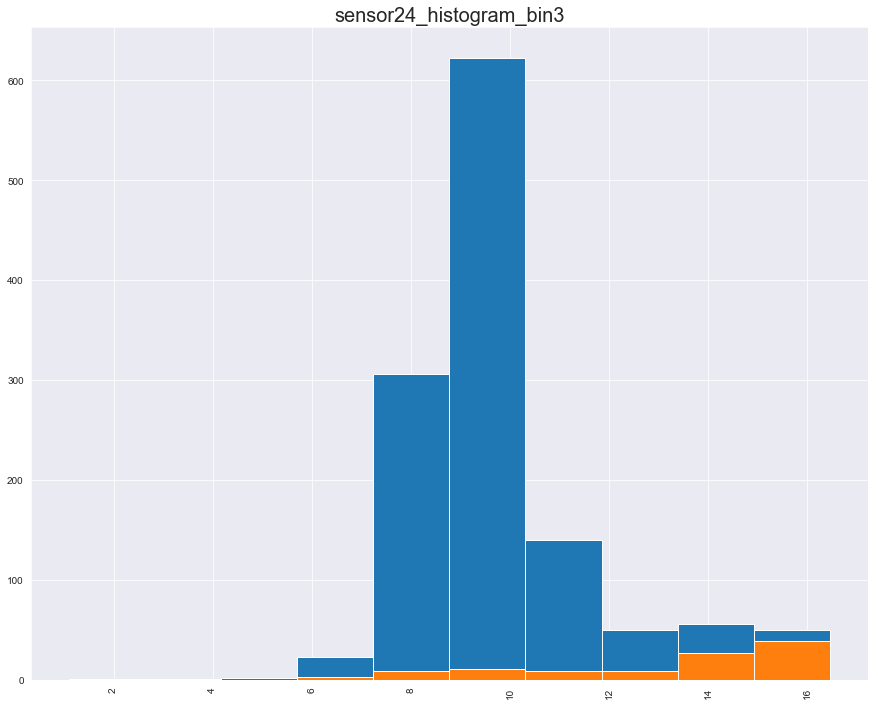

Missing 0%, Zero 96.37636346890173%
count   2171.000
mean       9.195
std        2.265
min        1.099
25%        8.239
50%        9.110
75%       10.126
max       17.505
Name: sensor24_histogram_bin4, dtype: float64


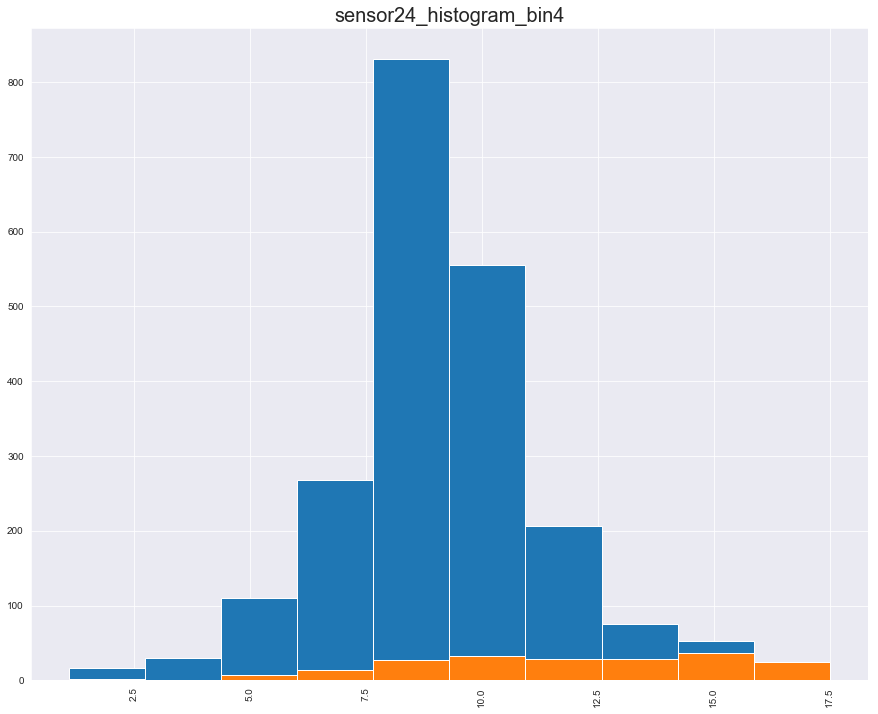

Missing 0%, Zero 0%
count   28991.000
mean       10.446
std         1.854
min         1.099
25%         9.294
50%        10.647
75%        11.650
max        18.643
Name: sensor24_histogram_bin5, dtype: float64


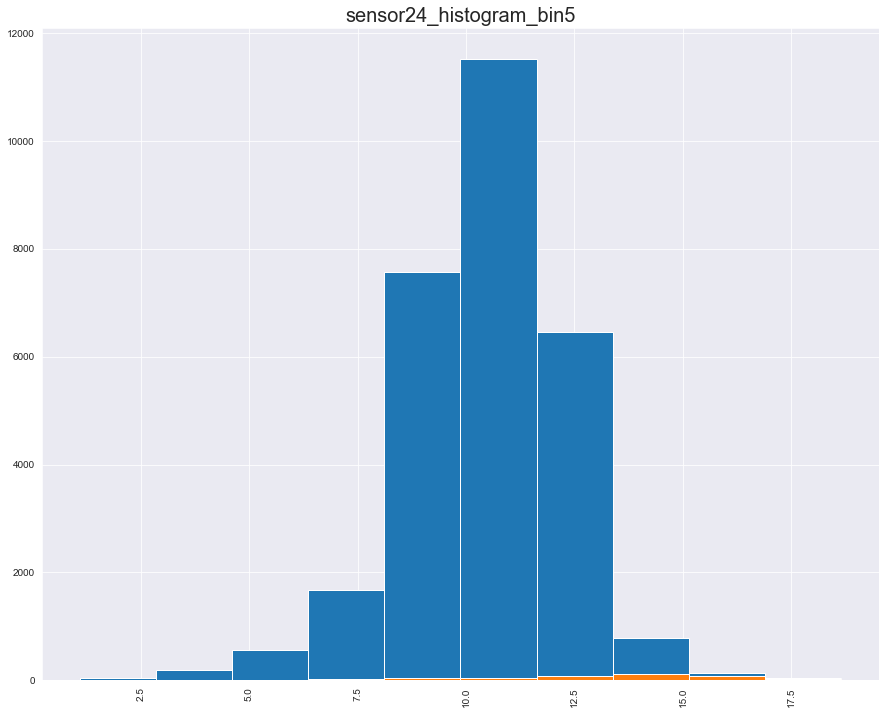

Missing 0%, Zero 0%
count   42725.000
mean       12.893
std         2.083
min         1.099
25%        11.505
50%        13.617
75%        14.317
max        18.665
Name: sensor24_histogram_bin6, dtype: float64


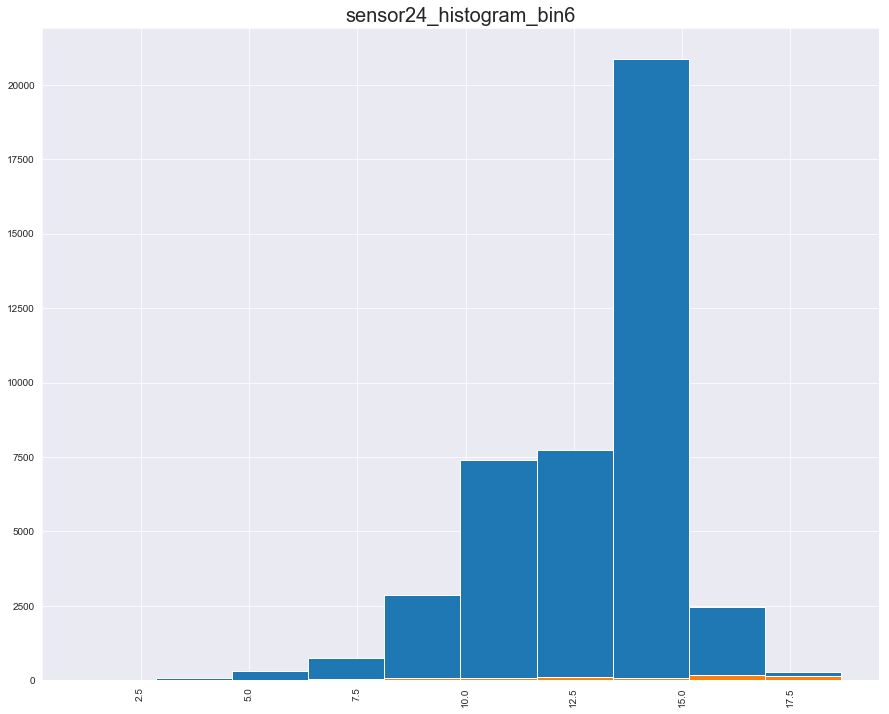

Missing 0%, Zero 0%
count   51897.000
mean       12.306
std         2.735
min         1.099
25%        10.358
50%        13.292
75%        14.213
max        20.009
Name: sensor24_histogram_bin7, dtype: float64


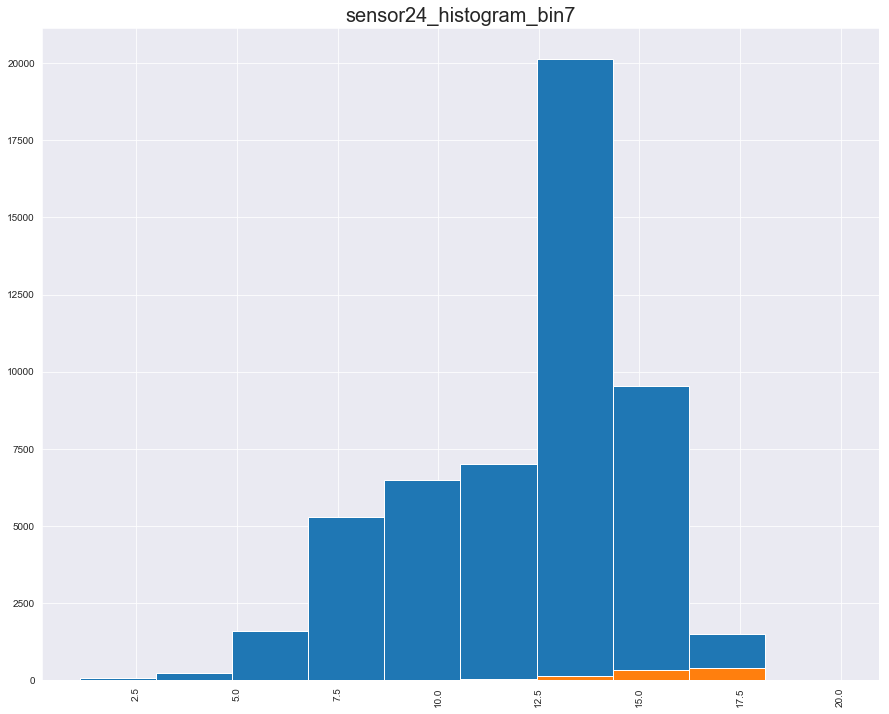

Missing 0%, Zero 0%
count   54385.000
mean       11.473
std         2.718
min         1.099
25%         9.583
50%        11.810
75%        13.472
max        18.465
Name: sensor24_histogram_bin8, dtype: float64


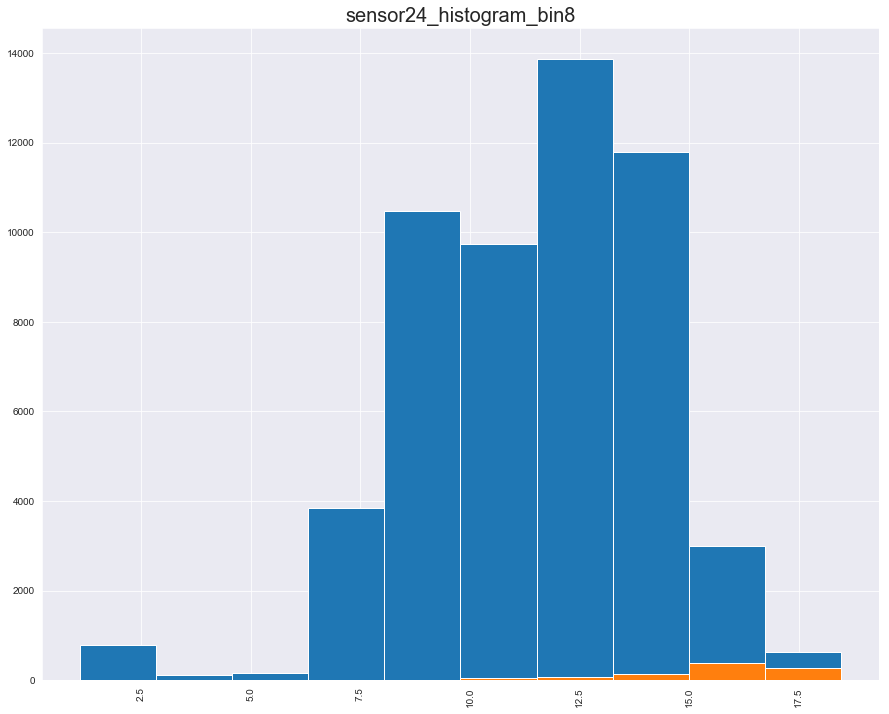

Missing 0%, Zero 99.0723806265707%
count   540.000
mean      8.044
std       3.285
min       1.099
25%       5.856
50%       8.328
75%      10.672
max      16.751
Name: sensor24_histogram_bin9, dtype: float64


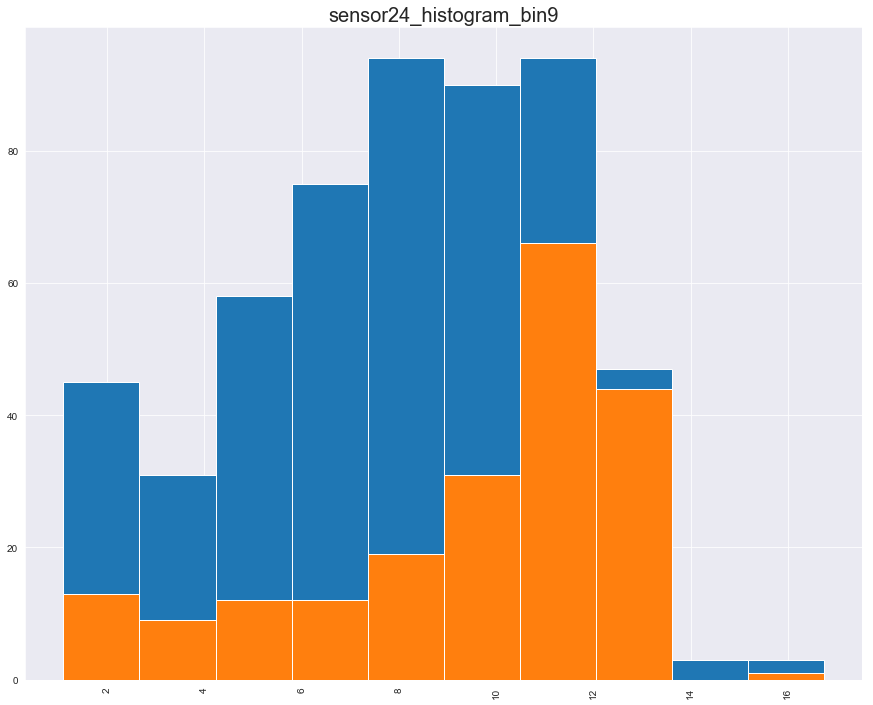

Missing 0%, Zero 0%
count   58233.000
mean        7.495
std         1.616
min         1.099
25%         6.986
50%         7.675
75%         8.345
max        16.130
Name: sensor25_histogram_bin0, dtype: float64


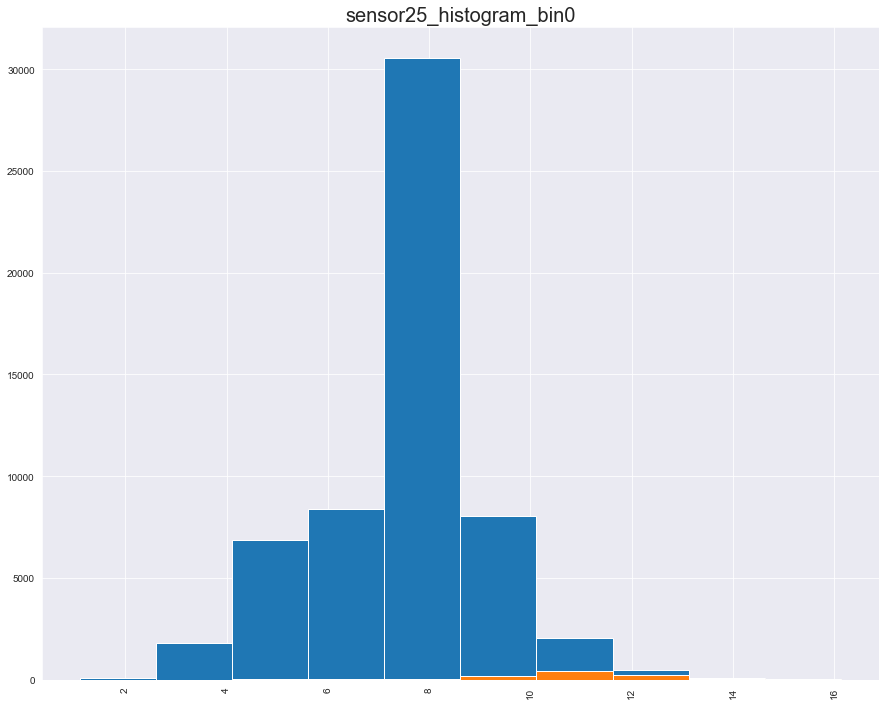

Missing 0%, Zero 0%
count   57871.000
mean        6.133
std         2.254
min         1.099
25%         4.317
50%         6.524
75%         7.643
max        15.326
Name: sensor25_histogram_bin1, dtype: float64


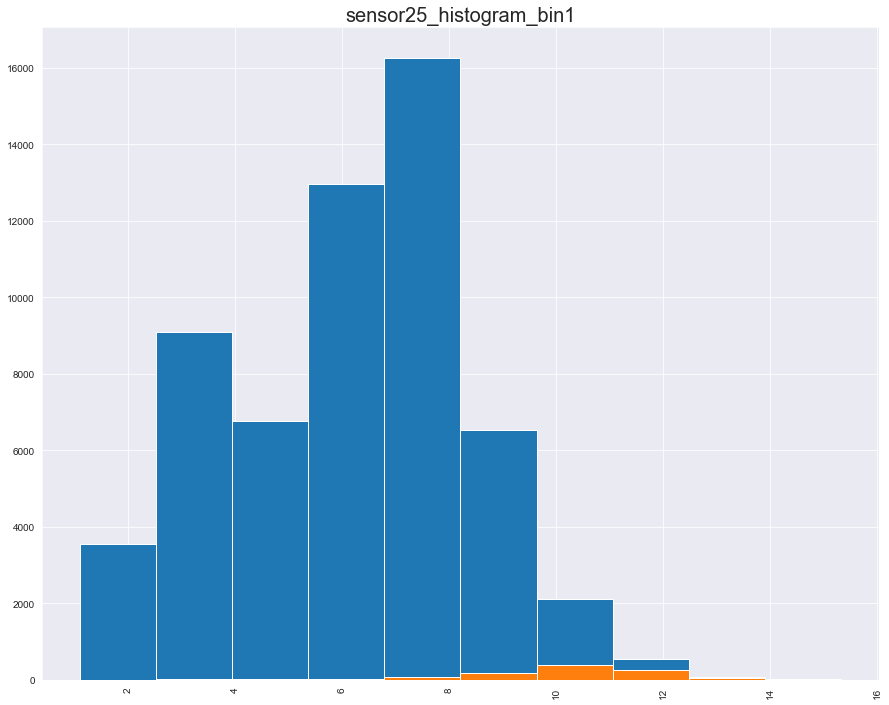

Missing 0%, Zero 0%
count   58049.000
mean        6.566
std         2.281
min         1.099
25%         4.710
50%         6.973
75%         8.080
max        16.470
Name: sensor25_histogram_bin2, dtype: float64


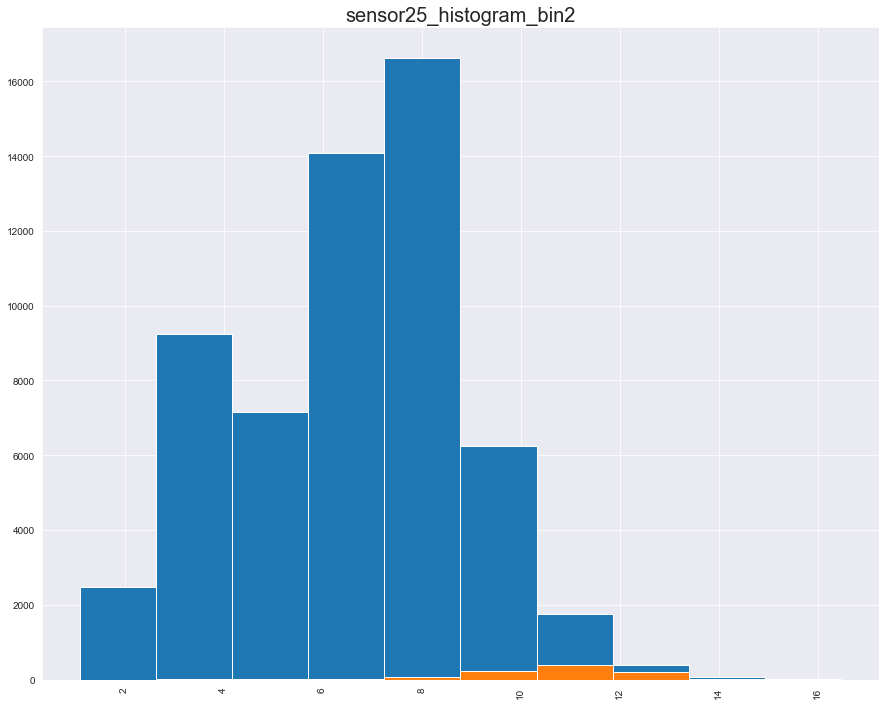

Missing 0%, Zero 0%
count   58145.000
mean        8.169
std         3.057
min         1.099
25%         5.938
50%         8.275
75%        10.717
max        17.635
Name: sensor25_histogram_bin3, dtype: float64


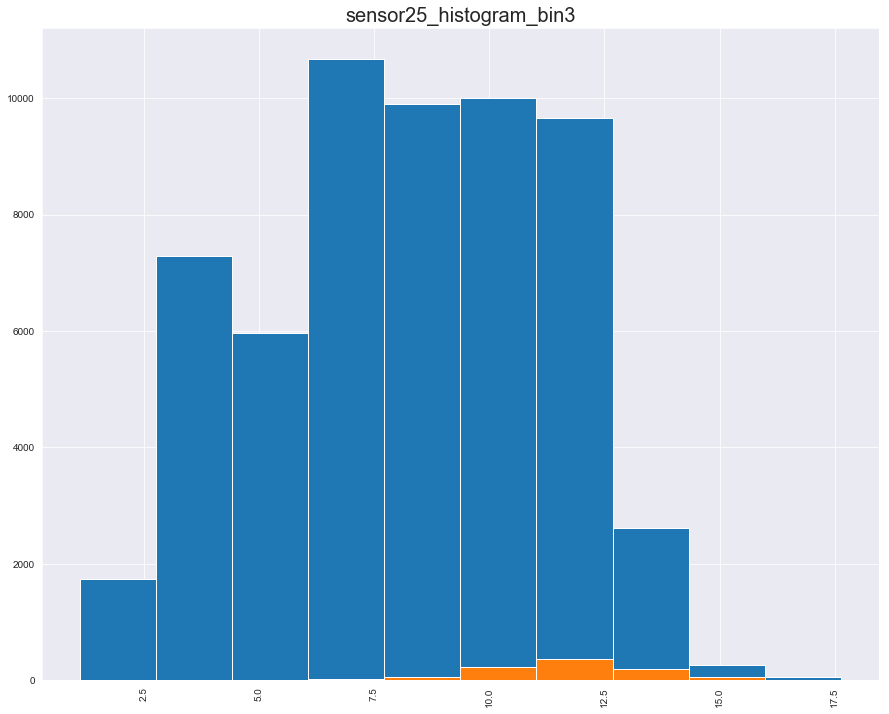

Missing 0%, Zero 0%
count   58182.000
mean       10.888
std         3.835
min         1.099
25%         7.548
50%        11.486
75%        14.402
max        18.628
Name: sensor25_histogram_bin4, dtype: float64


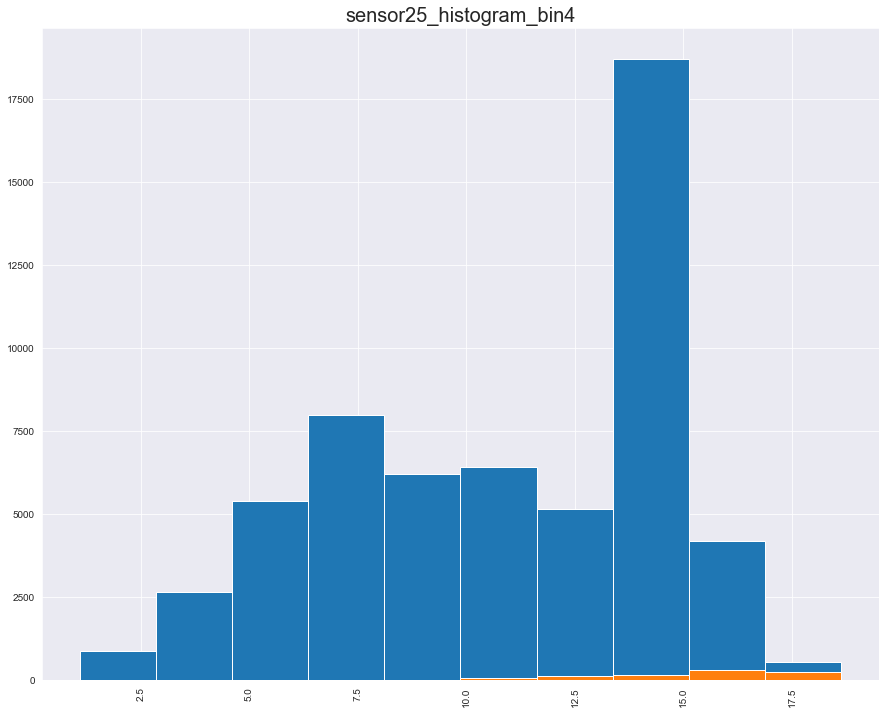

Missing 0%, Zero 0%
count   58200.000
mean       12.449
std         2.701
min         1.099
25%        10.763
50%        13.228
75%        14.429
max        19.964
Name: sensor25_histogram_bin5, dtype: float64


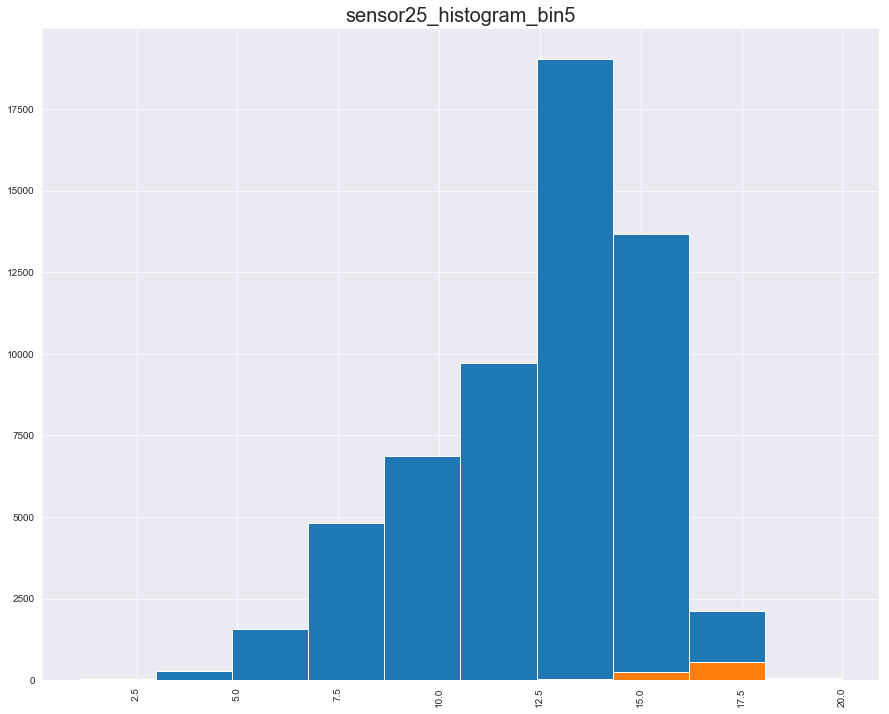

Missing 0%, Zero 0%
count   50657.000
mean        6.512
std         3.294
min         1.099
25%         3.807
50%         6.524
75%         8.716
max        17.984
Name: sensor25_histogram_bin6, dtype: float64


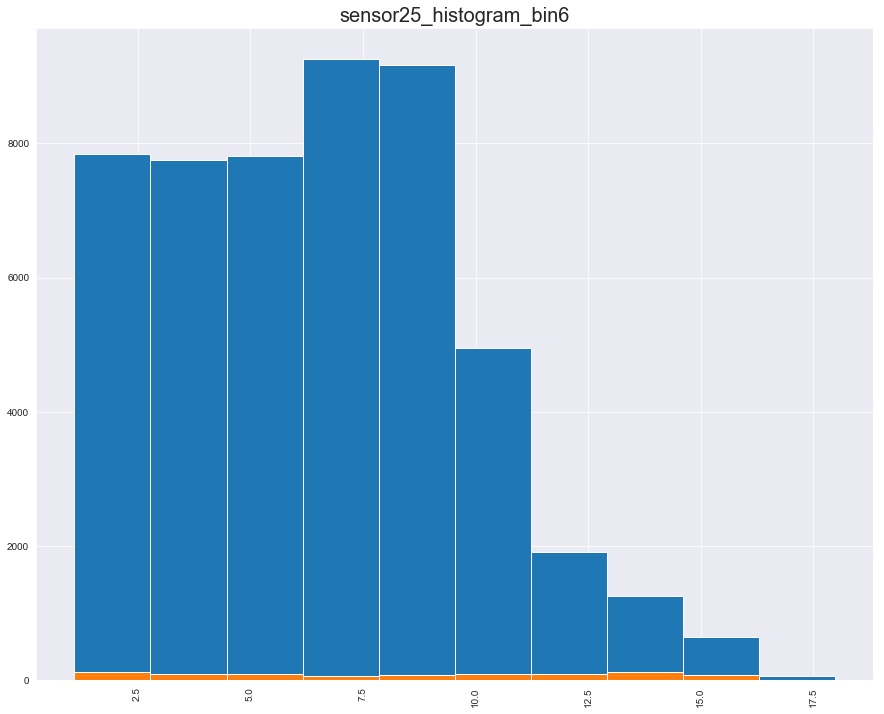

Missing 0%, Zero 0%
count   14235.000
mean        4.758
std         3.872
min         1.099
25%         1.609
50%         2.944
75%         7.919
max        17.483
Name: sensor25_histogram_bin7, dtype: float64


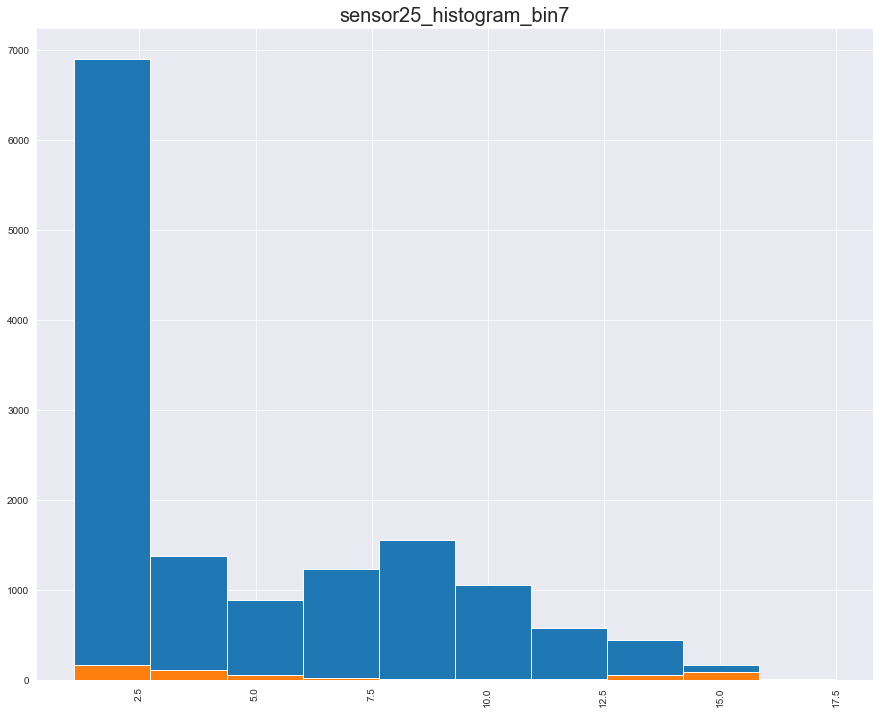

Missing 0%, Zero 0%
count   5107.000
mean       4.006
std        3.195
min        1.099
25%        1.099
50%        2.565
75%        6.553
max       14.482
Name: sensor25_histogram_bin8, dtype: float64


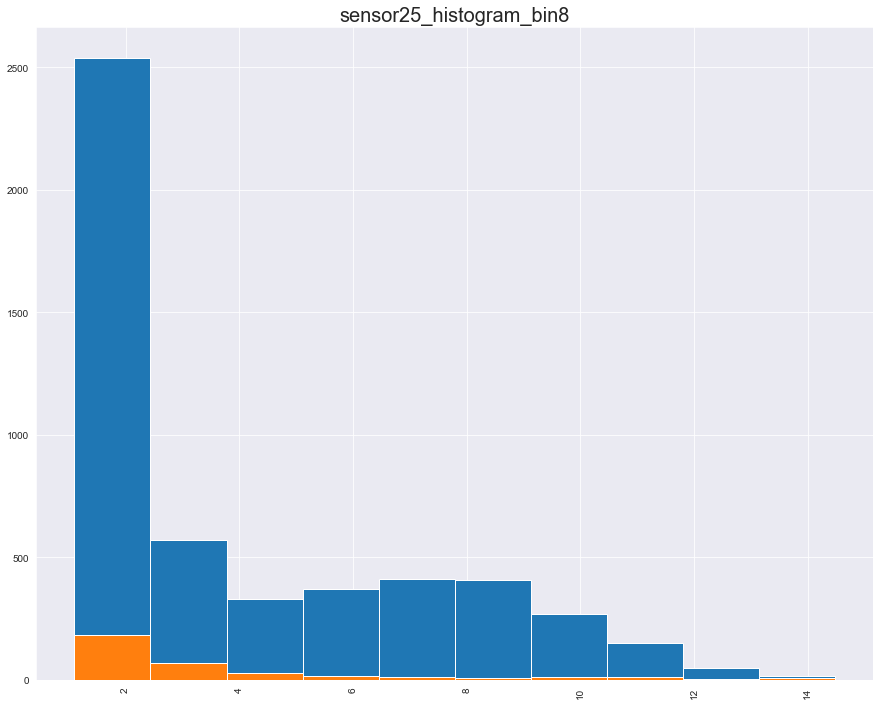

Missing 0%, Zero 96.88030420652359%
count   1884.000
mean       2.946
std        2.318
min        1.099
25%        1.099
50%        1.946
75%        3.807
max       13.409
Name: sensor25_histogram_bin9, dtype: float64


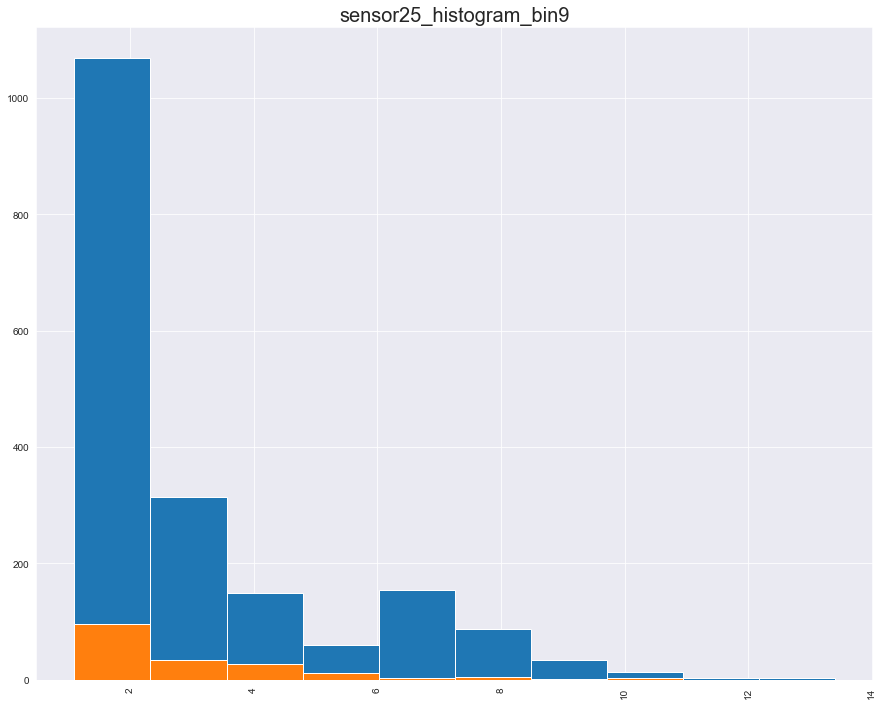

Missing 0%, Zero 0%
count   58223.000
mean       12.456
std         2.294
min         2.398
25%        10.524
50%        13.459
75%        14.074
max        19.266
Name: sensor26_histogram_bin0, dtype: float64


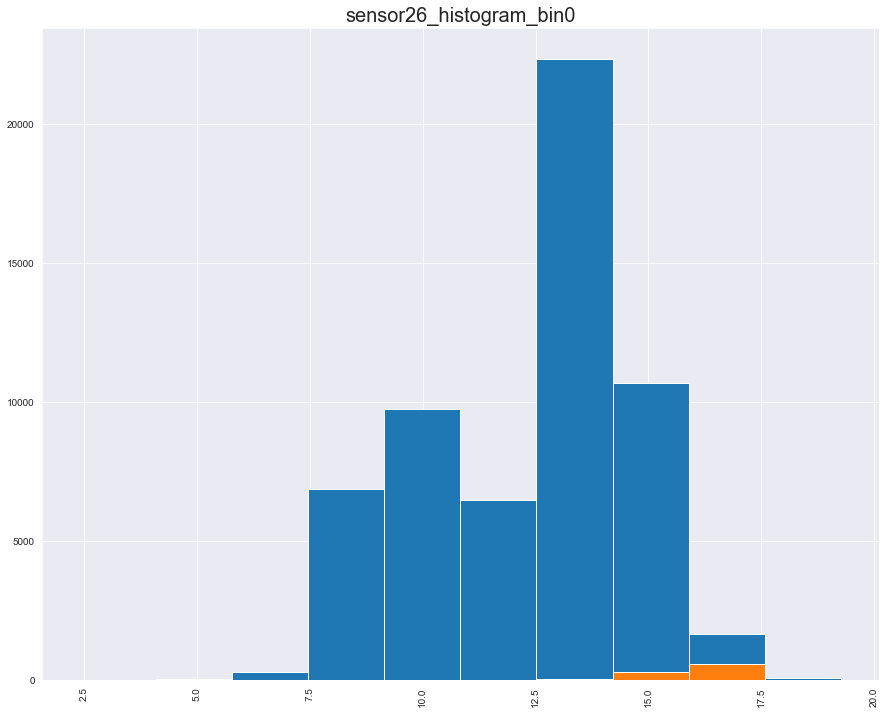

Missing 0%, Zero 0%
count   58173.000
mean       11.644
std         2.911
min         1.099
25%         9.833
50%        13.040
75%        13.618
max        18.572
Name: sensor26_histogram_bin1, dtype: float64


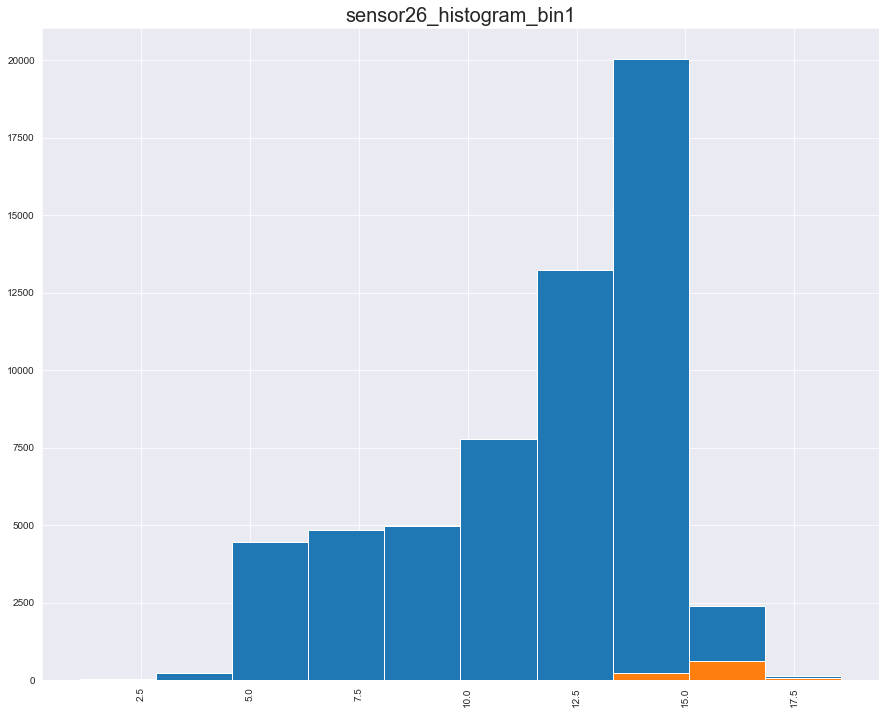

Missing 0%, Zero 0%
count   58140.000
mean       10.674
std         3.057
min         1.099
25%         8.789
50%        12.165
75%        12.753
max        17.837
Name: sensor26_histogram_bin2, dtype: float64


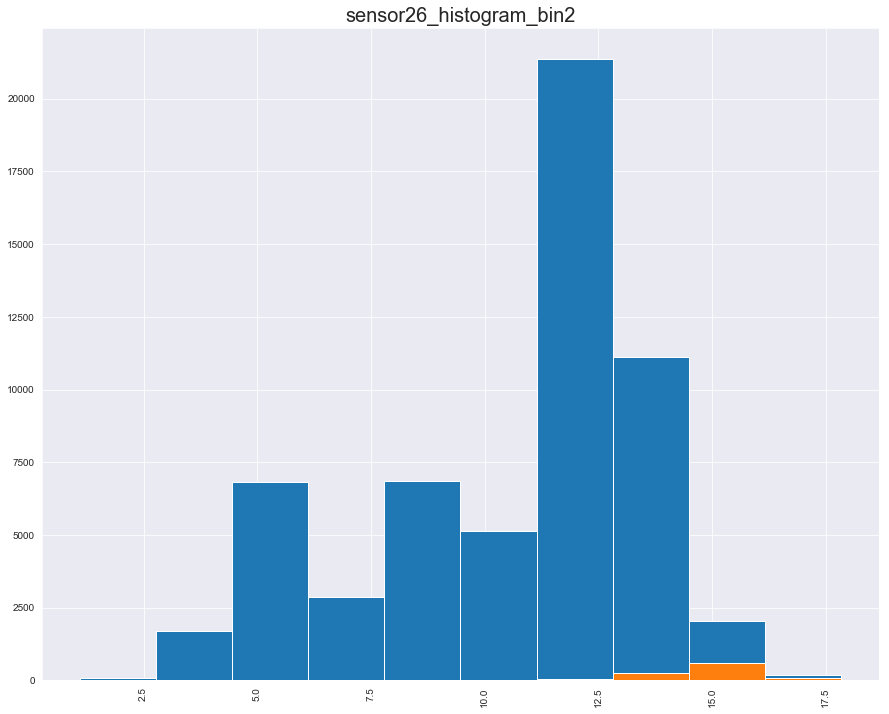

Missing 0%, Zero 0%
count   58108.000
mean       10.190
std         3.137
min         1.099
25%         7.771
50%        11.840
75%        12.422
max        17.425
Name: sensor26_histogram_bin3, dtype: float64


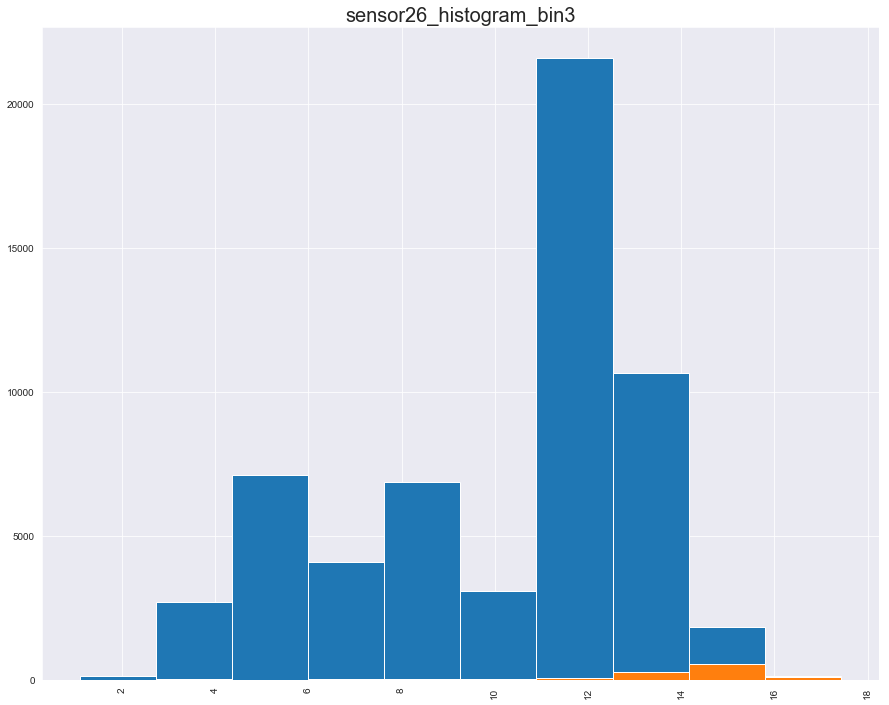

Missing 0%, Zero 0%
count   58076.000
mean        9.724
std         3.349
min         1.099
25%         6.645
50%        11.568
75%        12.206
max        17.041
Name: sensor26_histogram_bin4, dtype: float64


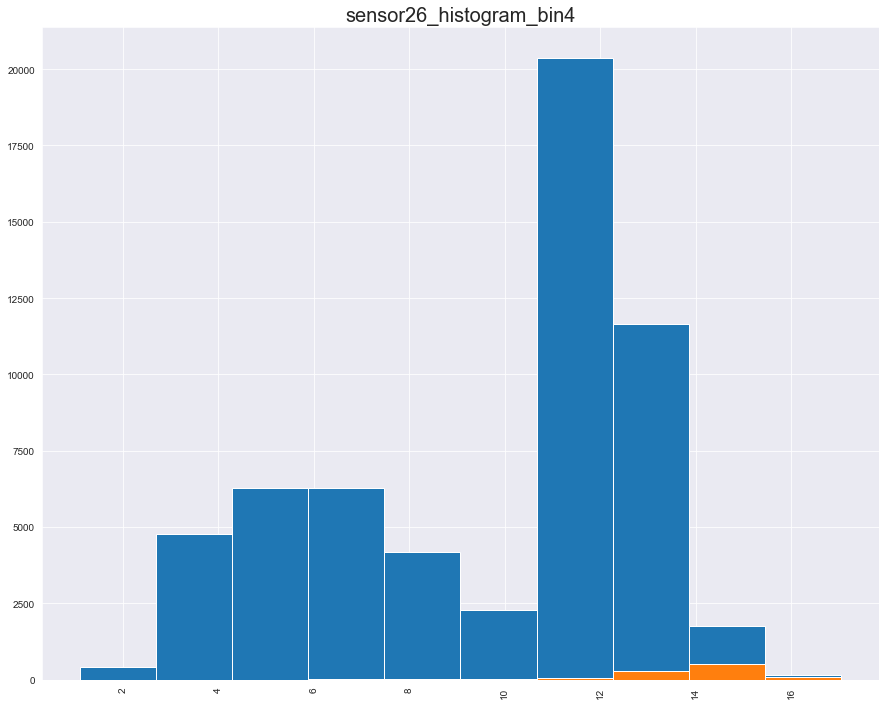

Missing 0%, Zero 0%
count   57984.000
mean        9.483
std         3.484
min         1.099
25%         6.107
50%        11.384
75%        12.146
max        16.771
Name: sensor26_histogram_bin5, dtype: float64


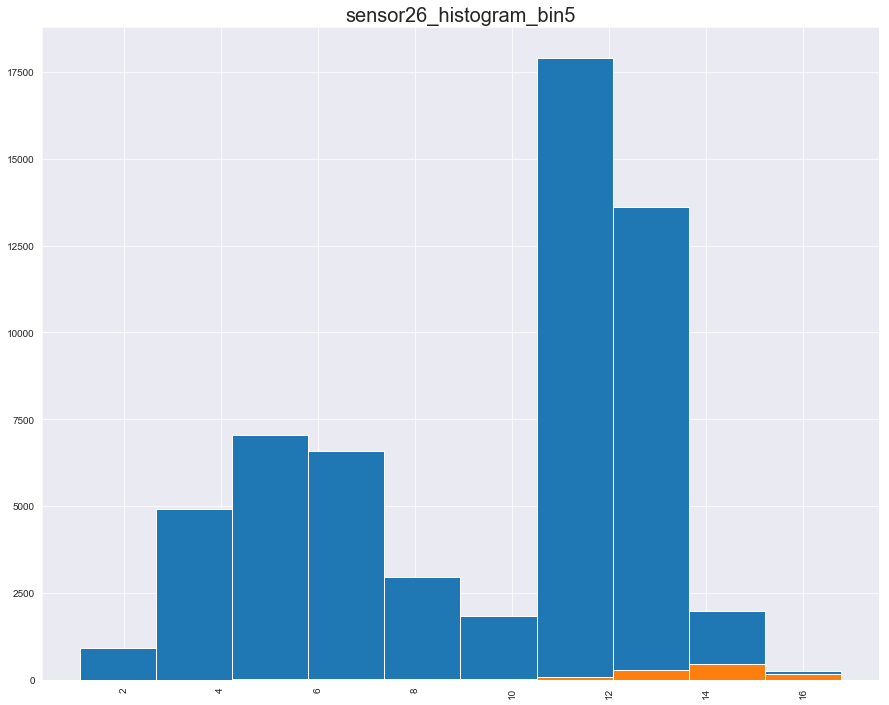

Missing 0%, Zero 0%
count   57315.000
mean        9.494
std         3.498
min         1.099
25%         6.038
50%        11.316
75%        12.262
max        16.760
Name: sensor26_histogram_bin6, dtype: float64


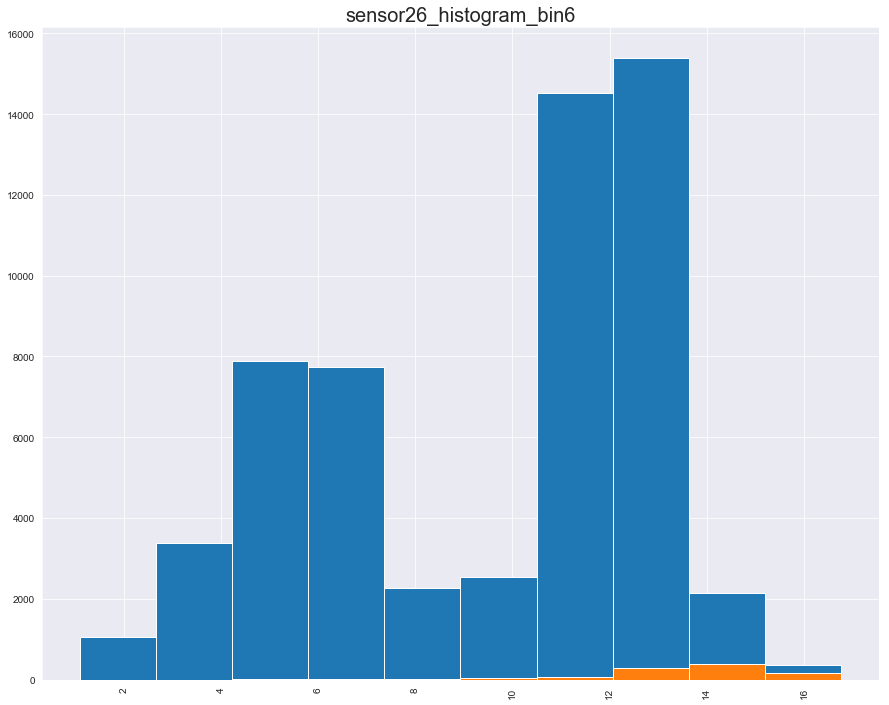

Missing 0%, Zero 0%
count   51274.000
mean        9.089
std         3.752
min         1.099
25%         5.759
50%        10.484
75%        12.413
max        16.477
Name: sensor26_histogram_bin7, dtype: float64


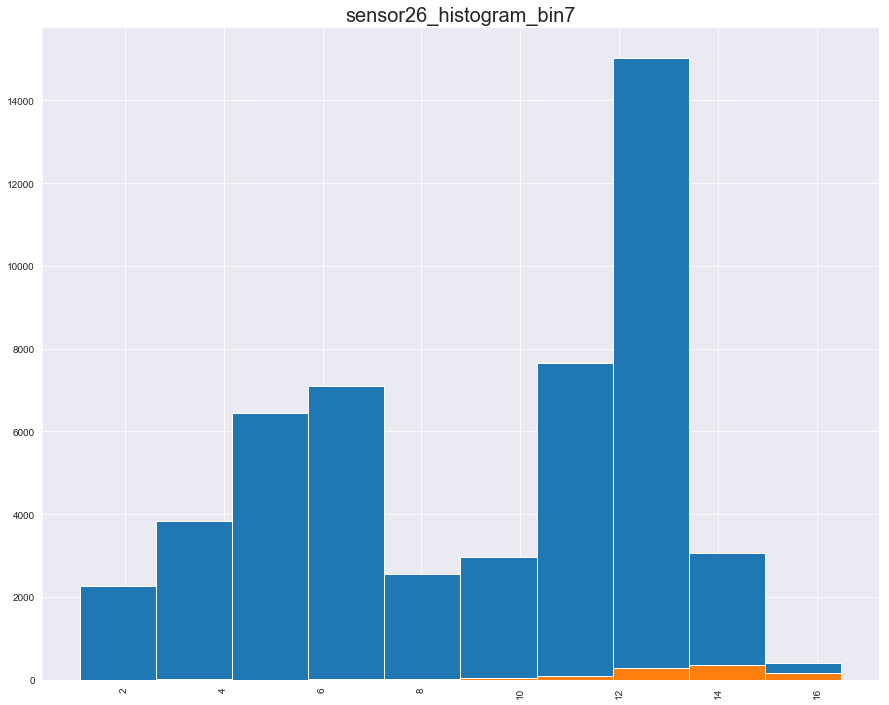

Missing 0%, Zero 0%
count   34458.000
mean        6.979
std         3.402
min         1.099
25%         4.111
50%         6.564
75%         9.945
max        17.258
Name: sensor26_histogram_bin8, dtype: float64


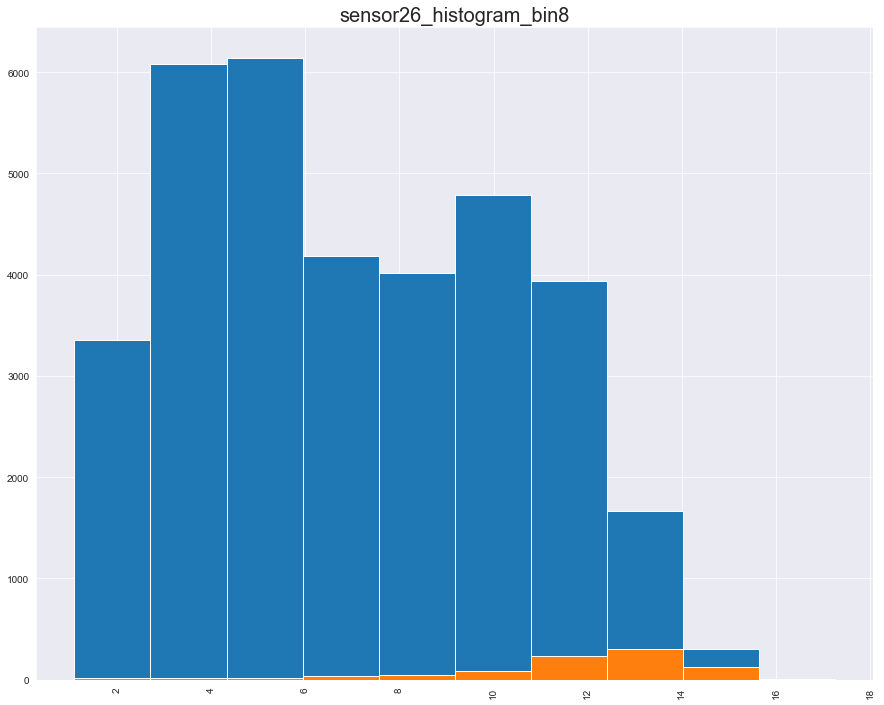

Missing 0%, Zero 0%
count   19693.000
mean        6.709
std         3.583
min         1.099
25%         4.143
50%         5.602
75%         9.667
max        17.593
Name: sensor26_histogram_bin9, dtype: float64


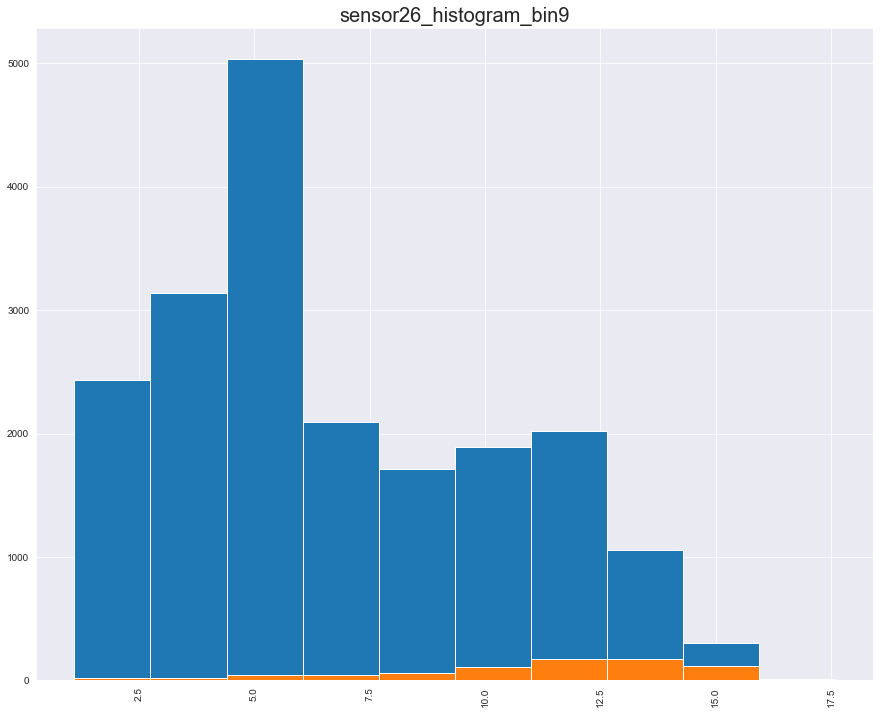

Missing 0%, Zero 0%
count   59248.000
mean       13.612
std         2.262
min         1.609
25%        11.578
50%        14.676
75%        15.169
max        19.078
Name: sensor27_measure, dtype: float64


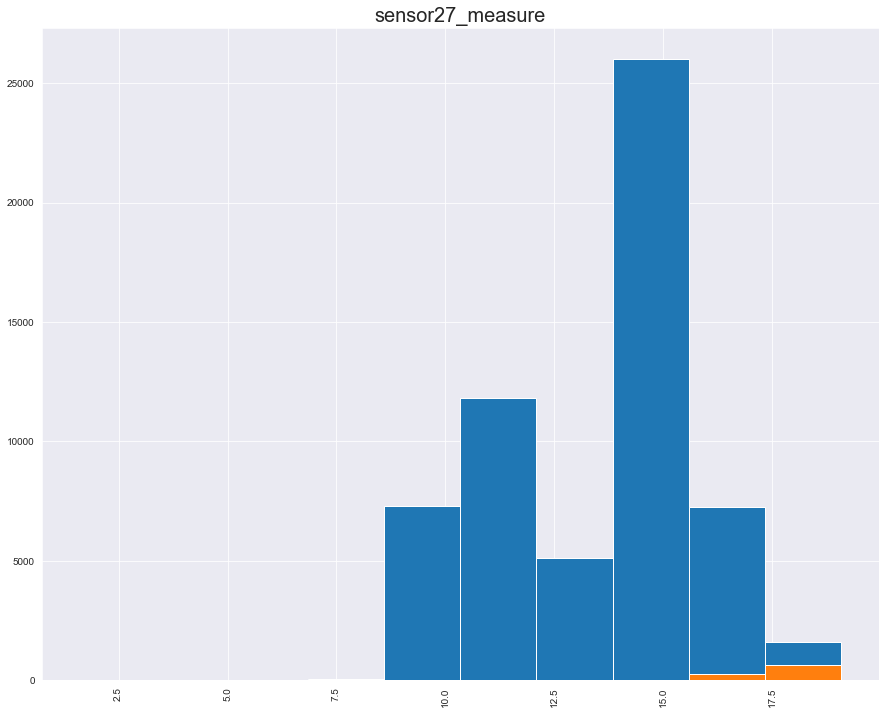

Missing 0%, Zero 0%
count   37979.000
mean        4.368
std         2.085
min         1.099
25%         2.833
50%         4.290
75%         5.700
max        12.892
Name: sensor28_measure, dtype: float64


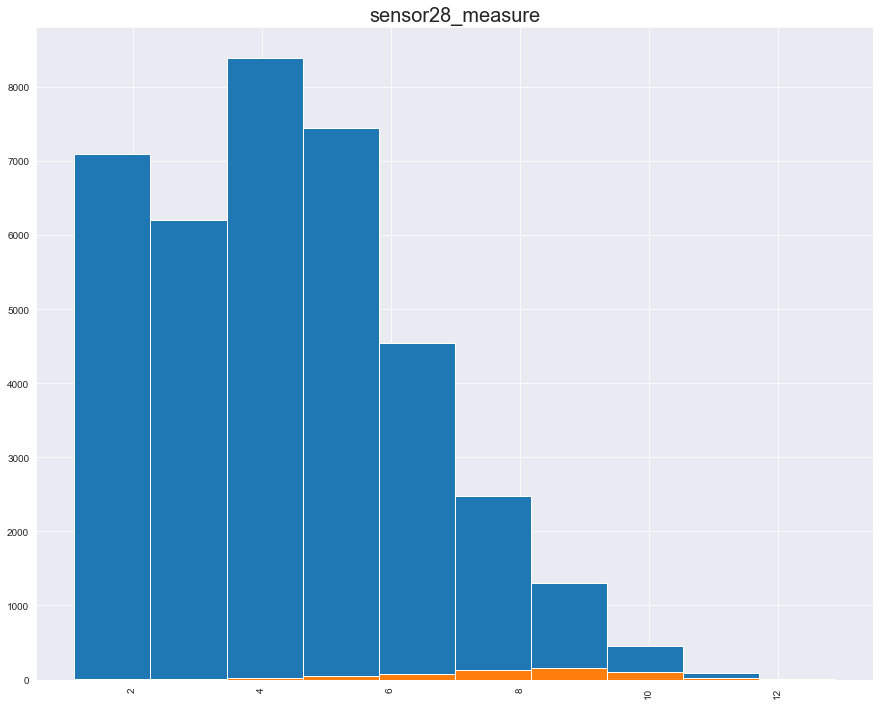

Missing 0%, Zero 0%
count   53243.000
mean        4.551
std         2.179
min         1.099
25%         2.708
50%         4.466
75%         6.192
max        12.633
Name: sensor29_measure, dtype: float64


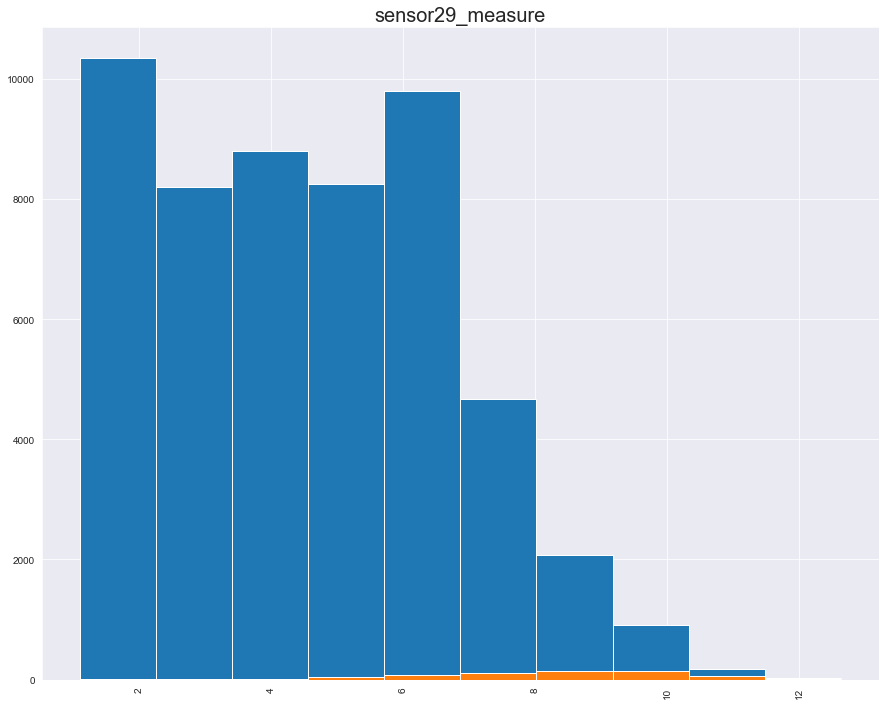

Missing 77.22661543927055%, Zero 0%
count   2694.000
mean       1.334
std        0.468
min        1.099
25%        1.099
50%        1.099
75%        1.609
max        5.323
Name: sensor2_measure, dtype: float64


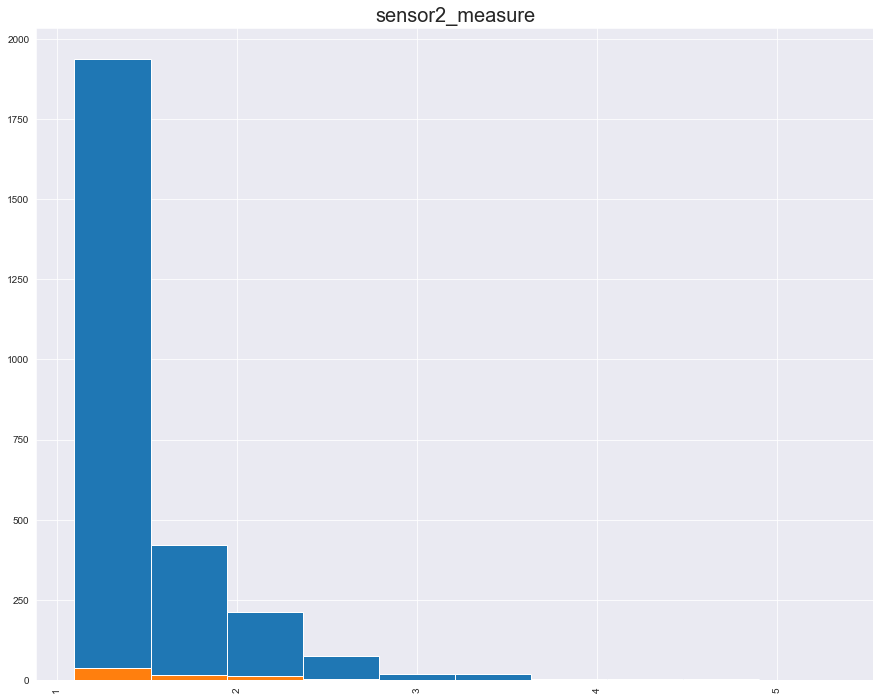

Missing 0%, Zero 0%
count   50546.000
mean        5.295
std         2.038
min         1.099
25%         4.043
50%         5.501
75%         6.589
max        13.605
Name: sensor30_measure, dtype: float64


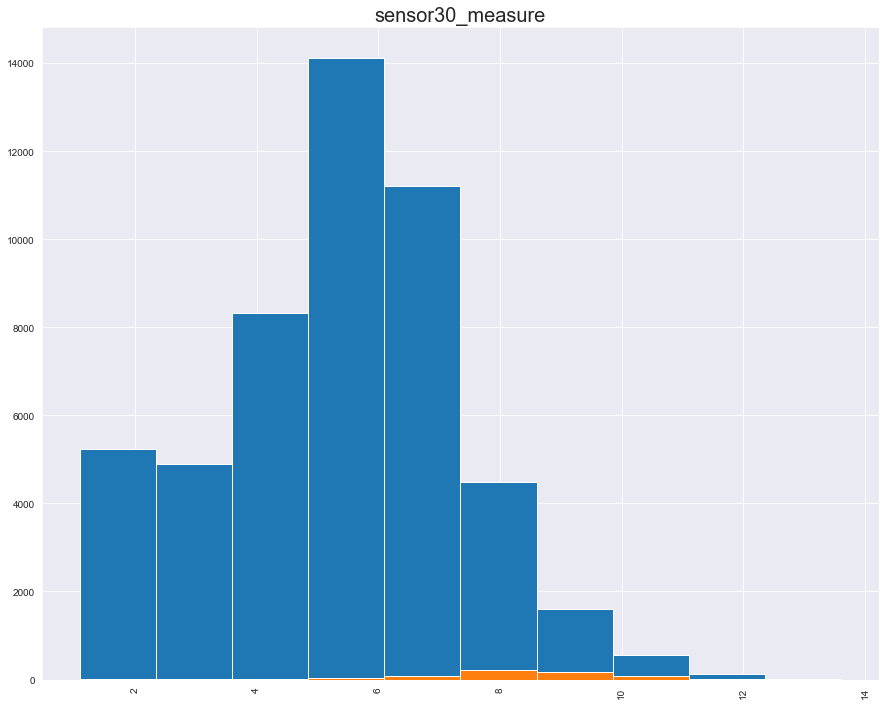

Missing 0%, Zero 0%
count   32206.000
mean        3.051
std         1.597
min         1.099
25%         1.946
50%         2.833
75%         3.892
max        10.841
Name: sensor31_measure, dtype: float64


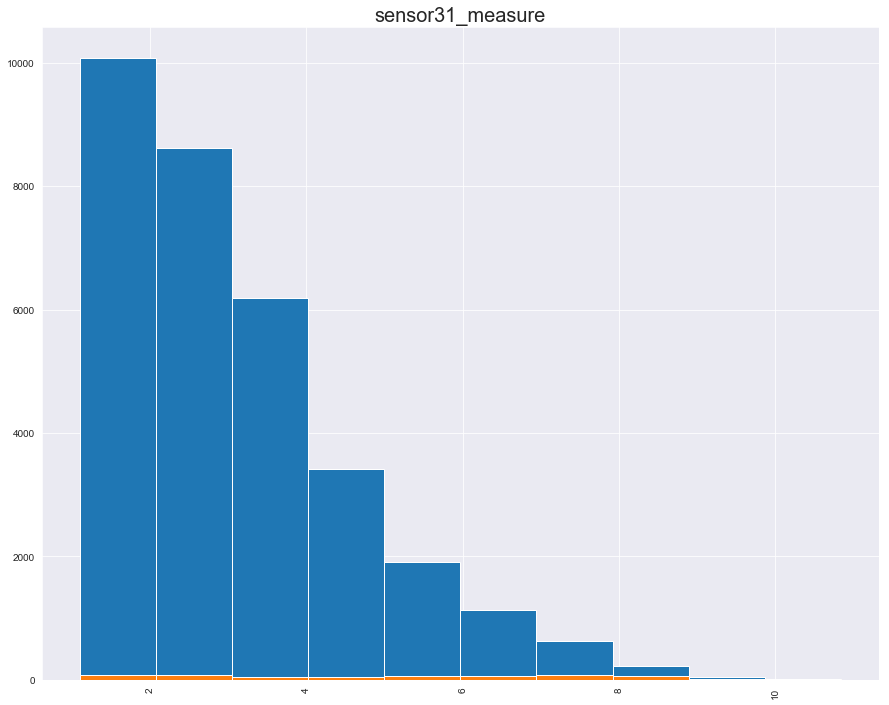

Missing 0%, Zero 0%
count   59225.000
mean       12.415
std         2.699
min         1.099
25%        10.316
50%        13.821
75%        14.289
max        18.123
Name: sensor32_measure, dtype: float64


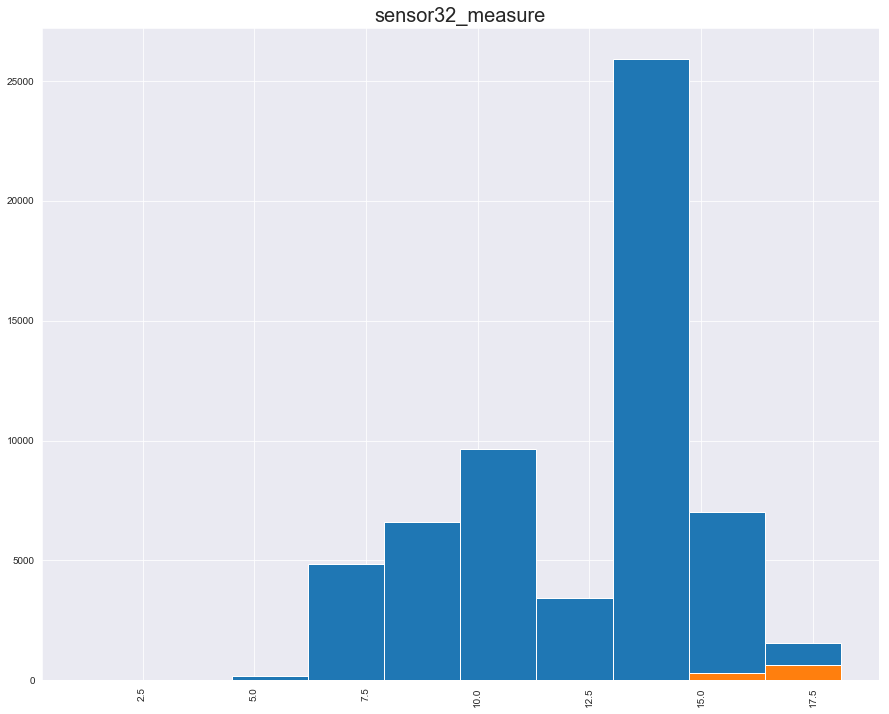

Missing 0%, Zero 0%
count   59229.000
mean        9.033
std         2.454
min         1.099
25%         6.760
50%        10.184
75%        10.803
max        14.979
Name: sensor33_measure, dtype: float64


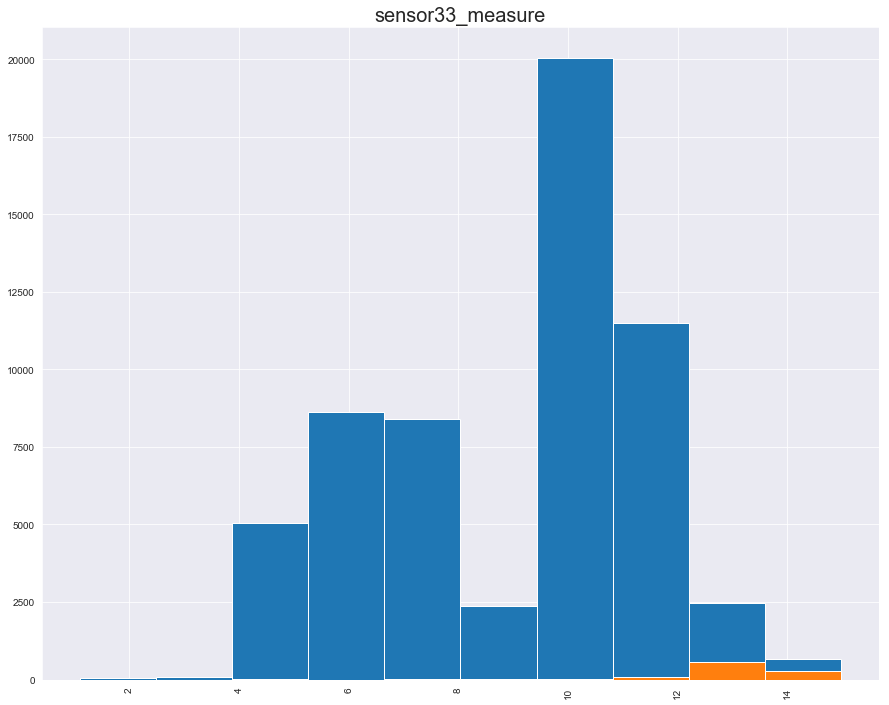

Missing 0%, Zero 0%
count   59294.000
mean       11.482
std         2.002
min         1.099
25%         9.686
50%        12.104
75%        12.849
max        17.621
Name: sensor34_measure, dtype: float64


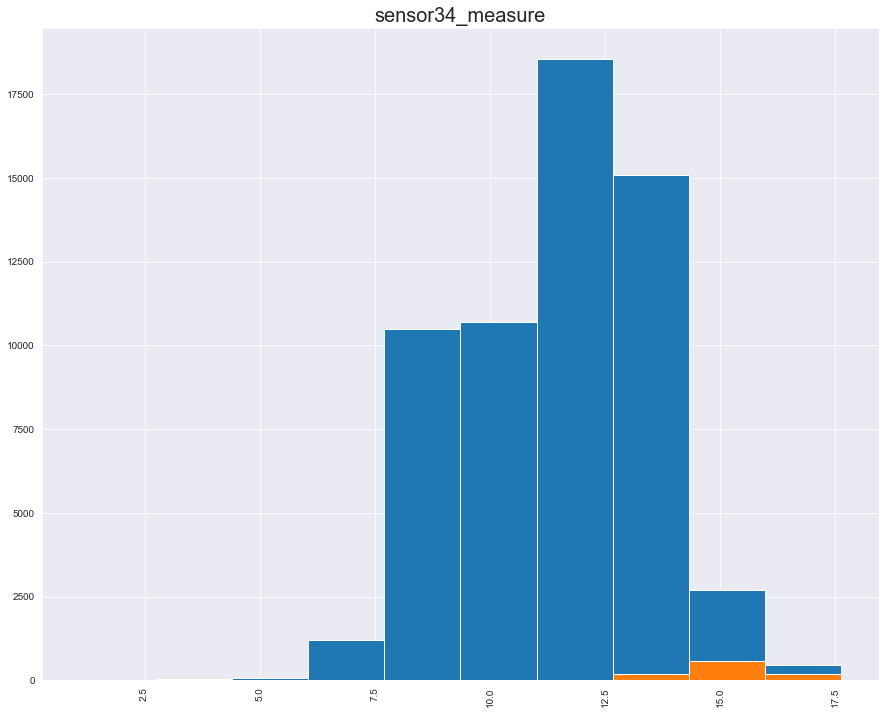

Missing 0%, Zero 0%
count   59274.000
mean       11.154
std         2.255
min         1.099
25%         9.066
50%        11.951
75%        12.720
max        17.638
Name: sensor35_measure, dtype: float64


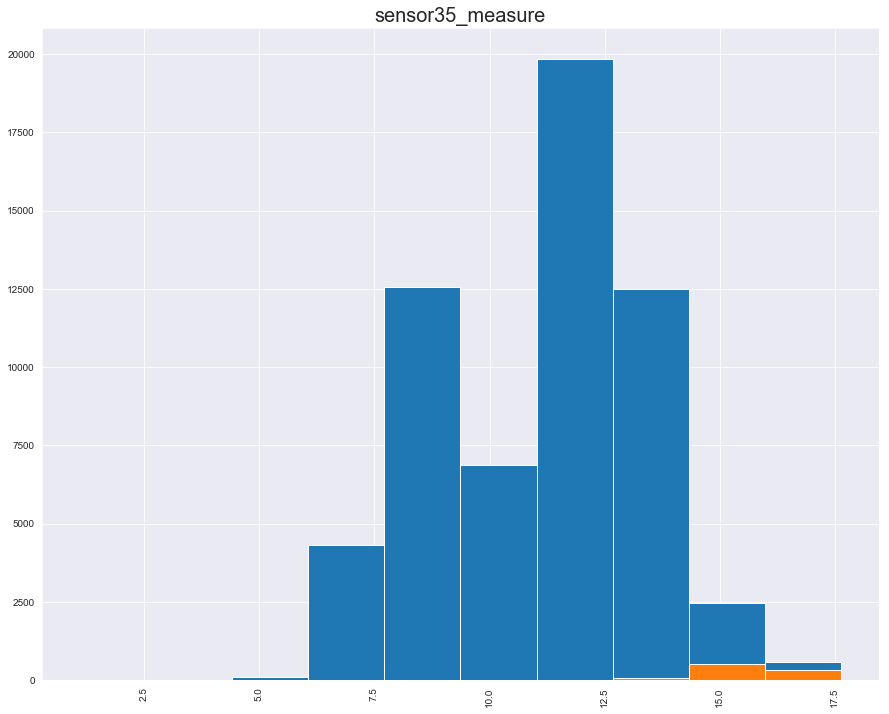

Missing 38.32581150248023%, Zero 0%
count   36464.000
mean       12.351
std         0.557
min         9.352
25%        12.011
50%        12.265
75%        12.551
max        14.086
Name: sensor36_measure, dtype: float64


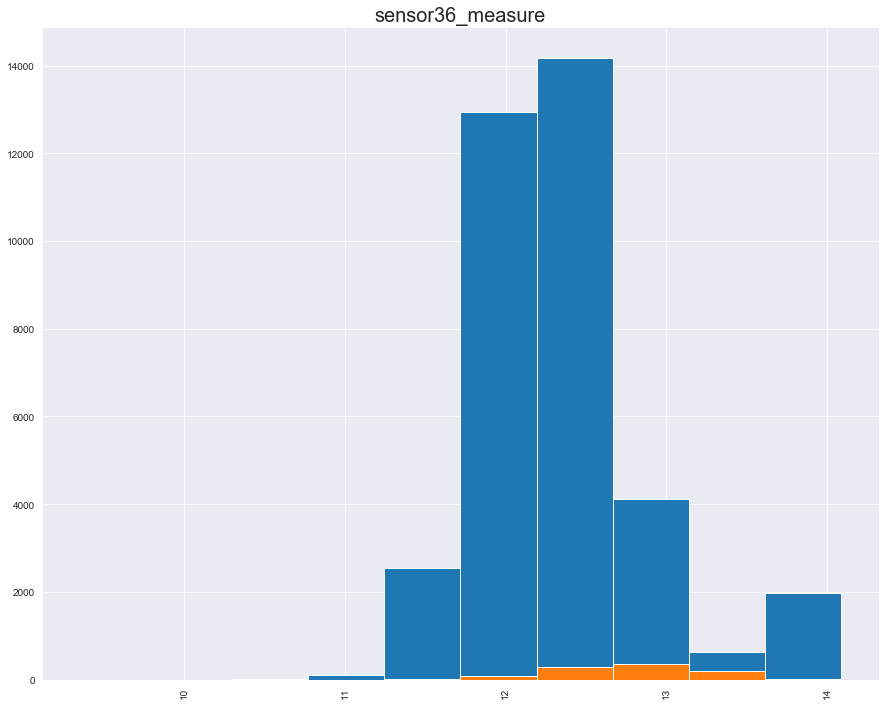

Missing 45.39808686727807%, Zero 0%
count   31707.000
mean       12.459
std         0.622
min        10.169
25%        12.074
50%        12.329
75%        12.635
max        14.086
Name: sensor37_measure, dtype: float64


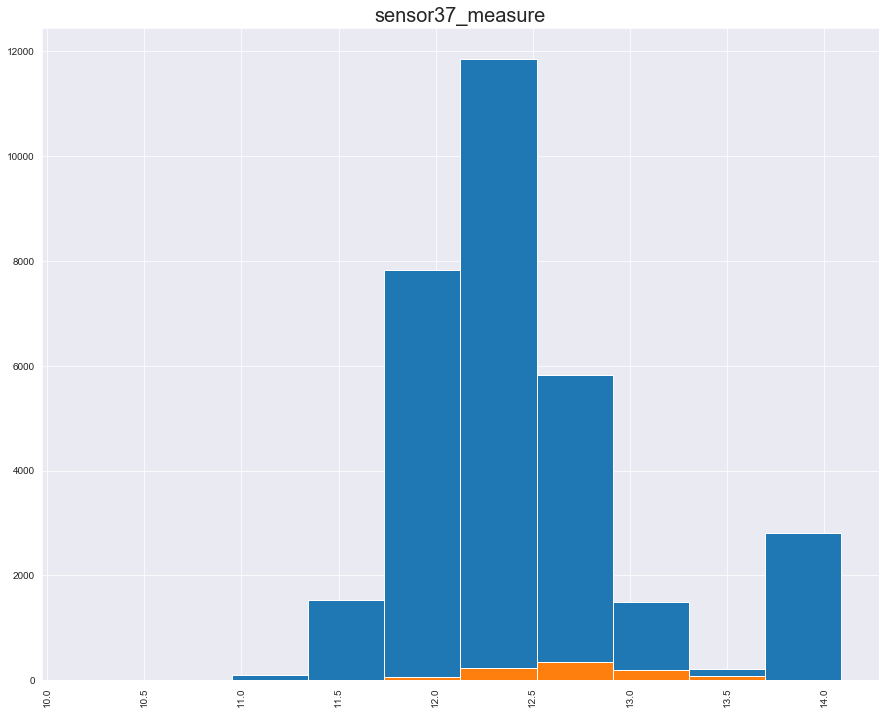

Missing 65.91492217207669%, Zero 0%
count     19237.000
mean     424821.146
std      406757.592
min       23980.000
25%      183780.000
50%      249200.000
75%      388840.000
max     1310700.000
Name: sensor38_measure, dtype: float64


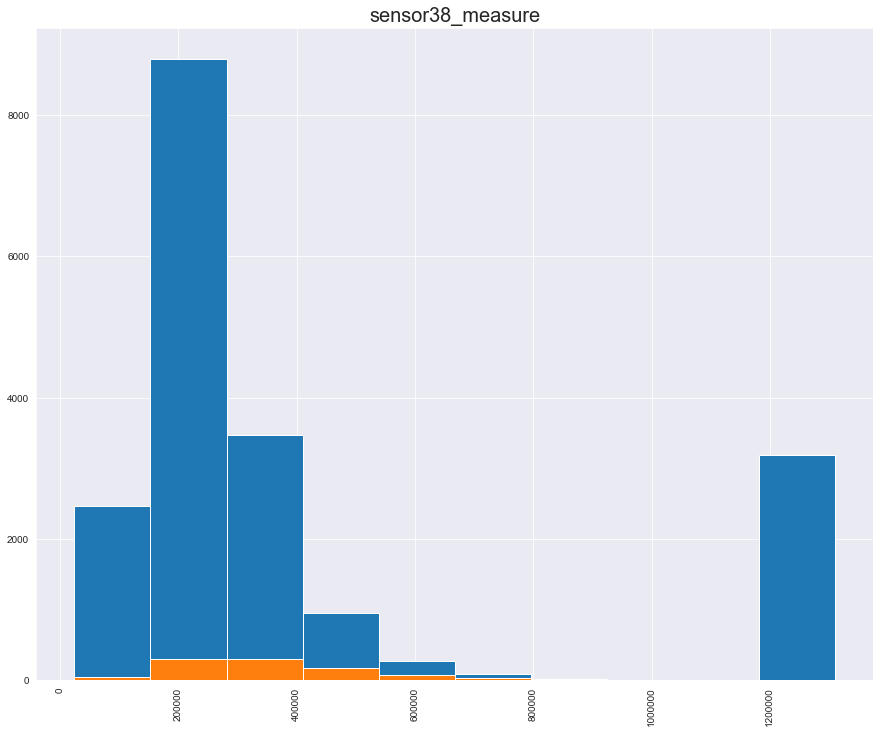

Missing 73.31877212141946%, Zero 0%
count     14569.000
mean     508971.099
std      462308.801
min       33860.000
25%      191420.000
50%      271460.000
75%      622420.000
max     1310700.000
Name: sensor39_measure, dtype: float64


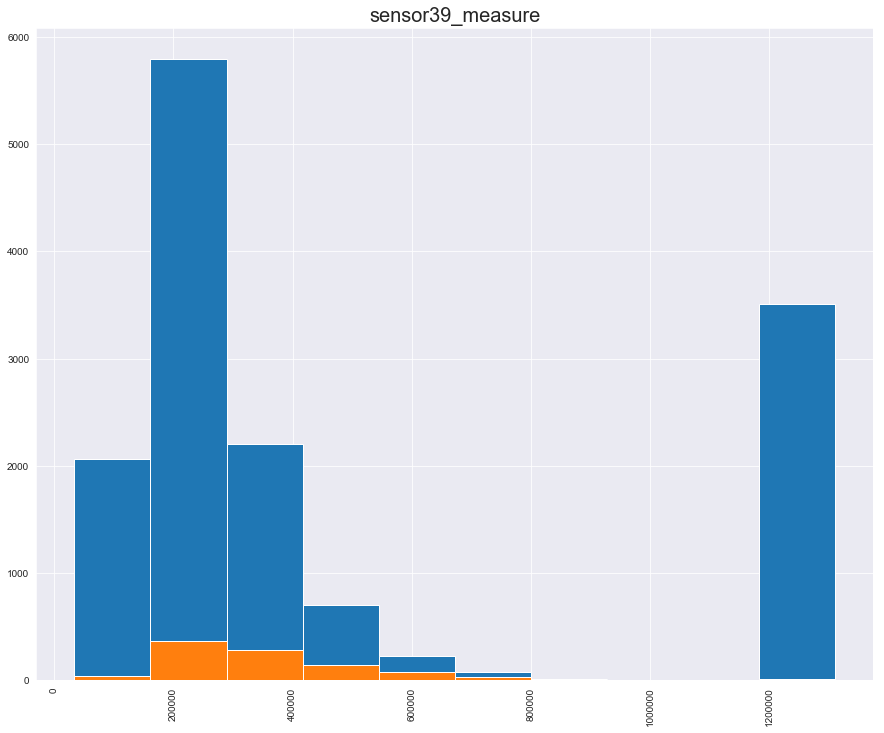

Missing 0%, Zero 0%
count   47913.000
mean        8.148
std         6.797
min         1.099
25%         3.850
50%         5.587
75%         7.347
max        21.480
Name: sensor3_measure, dtype: float64


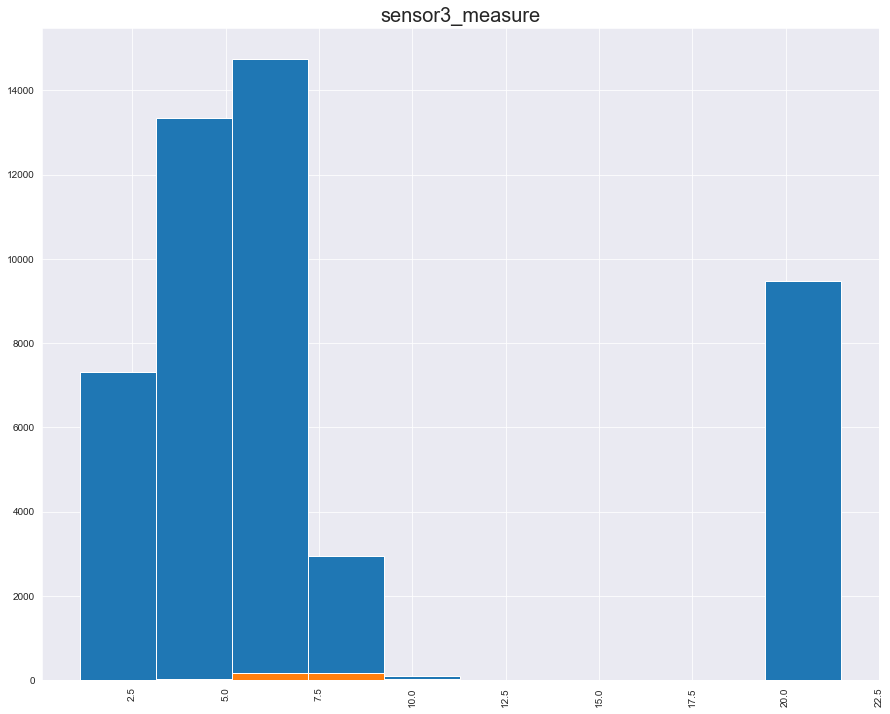

Missing 77.24898356600572%, Zero 0%
count     12164.000
mean     576553.047
std      491292.091
min       45580.000
25%      201430.000
50%      300970.000
75%     1310700.000
max     1310700.000
Name: sensor40_measure, dtype: float64


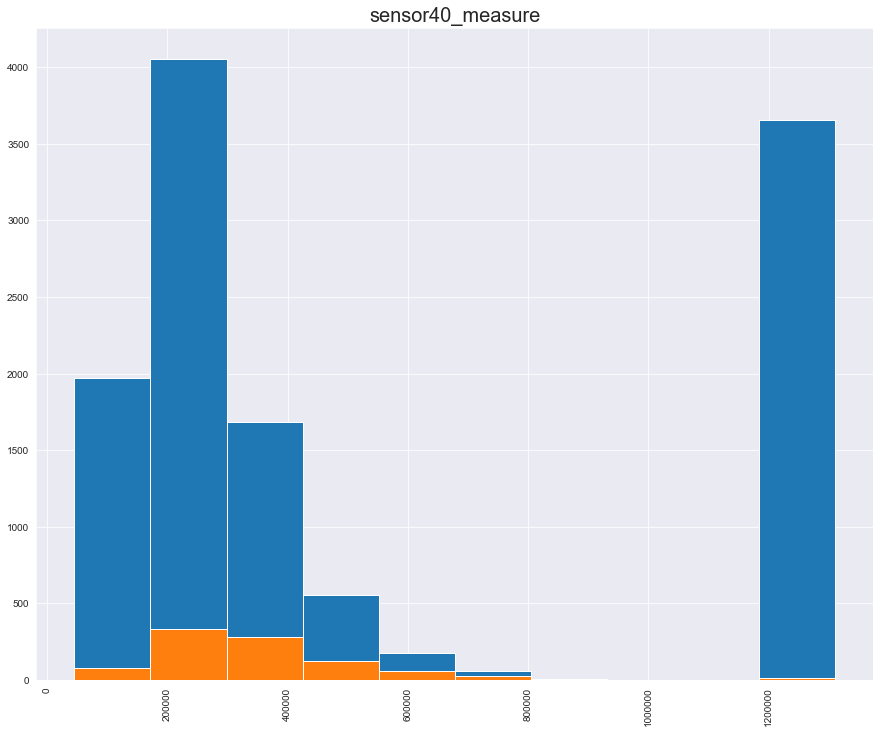

Missing 79.55421639188958%, Zero 0%
count     10648.000
mean     634864.664
std      507813.313
min       33000.000
25%      212585.000
50%      334350.000
75%     1310700.000
max     1310700.000
Name: sensor41_measure, dtype: float64


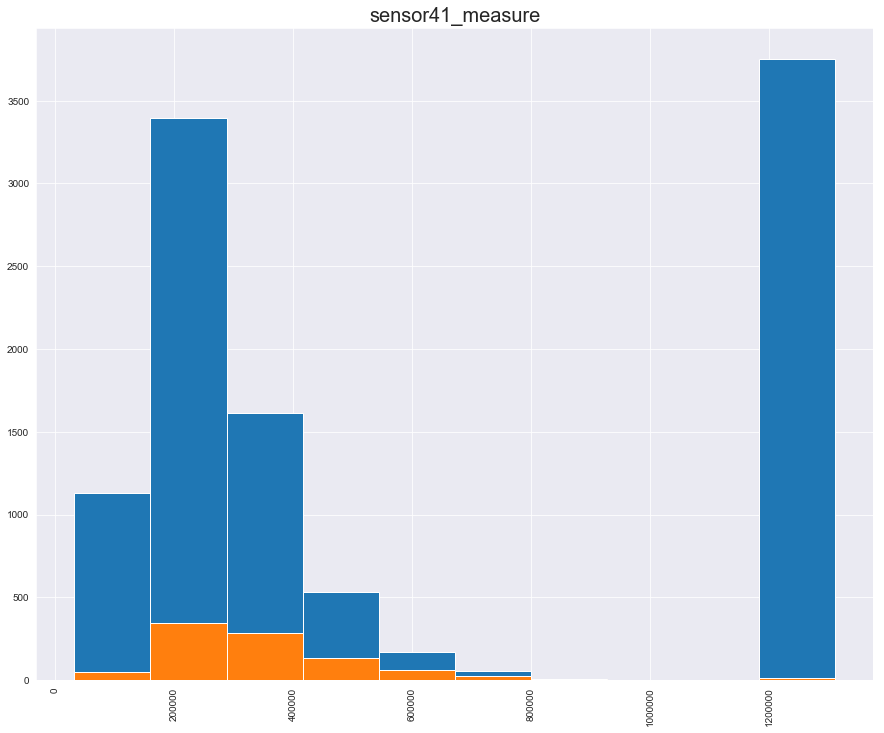

Missing 81.18840541571821%, Zero 0%
count      9544.000
mean     688770.199
std      517140.911
min       13620.000
25%      225660.000
50%      382210.000
75%     1310700.000
max     1310700.000
Name: sensor42_measure, dtype: float64


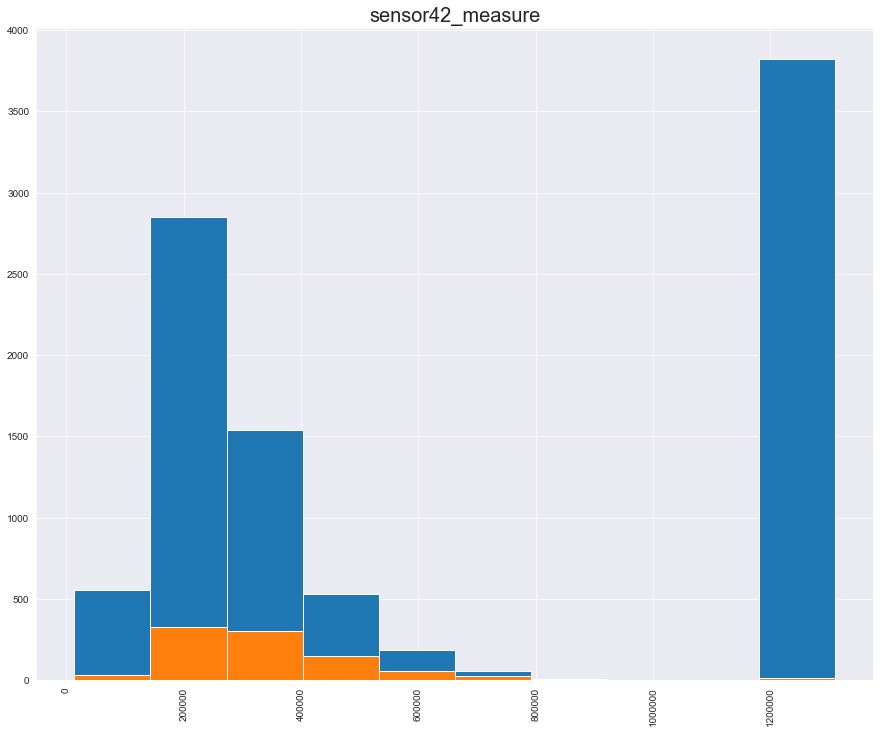

Missing 82.09628820673413%, Zero 0%
count      8923.000
mean     727789.161
std      520435.181
min       40820.000
25%      236360.000
50%      430160.000
75%     1310700.000
max     1310700.000
Name: sensor43_measure, dtype: float64


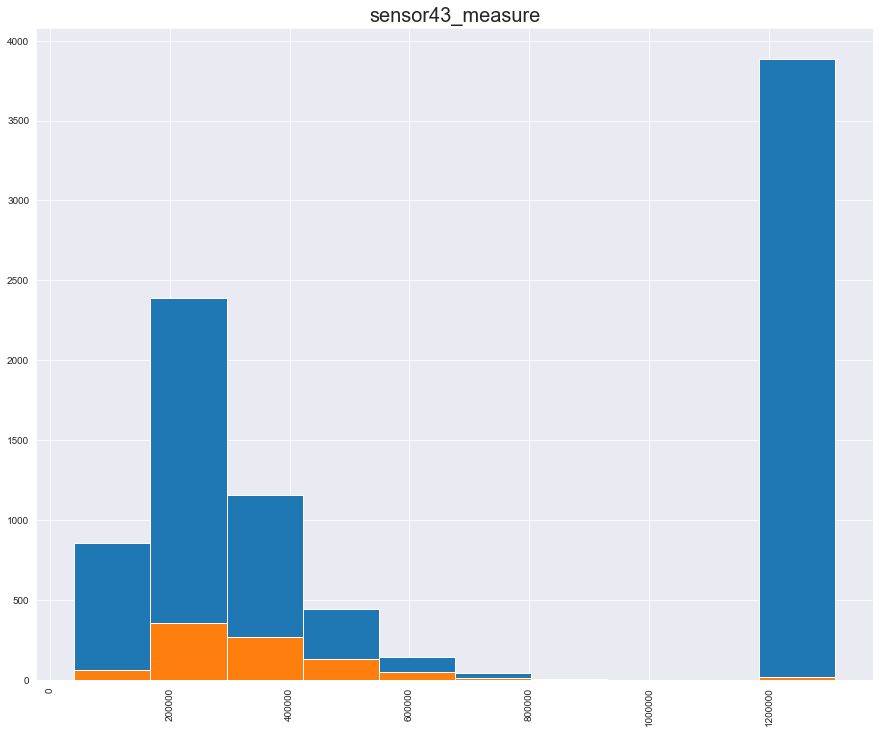

Missing 0%, Zero 0%
count   59154.000
mean       10.693
std         1.226
min         3.045
25%         9.767
50%        10.835
75%        11.685
max        13.852
Name: sensor44_measure, dtype: float64


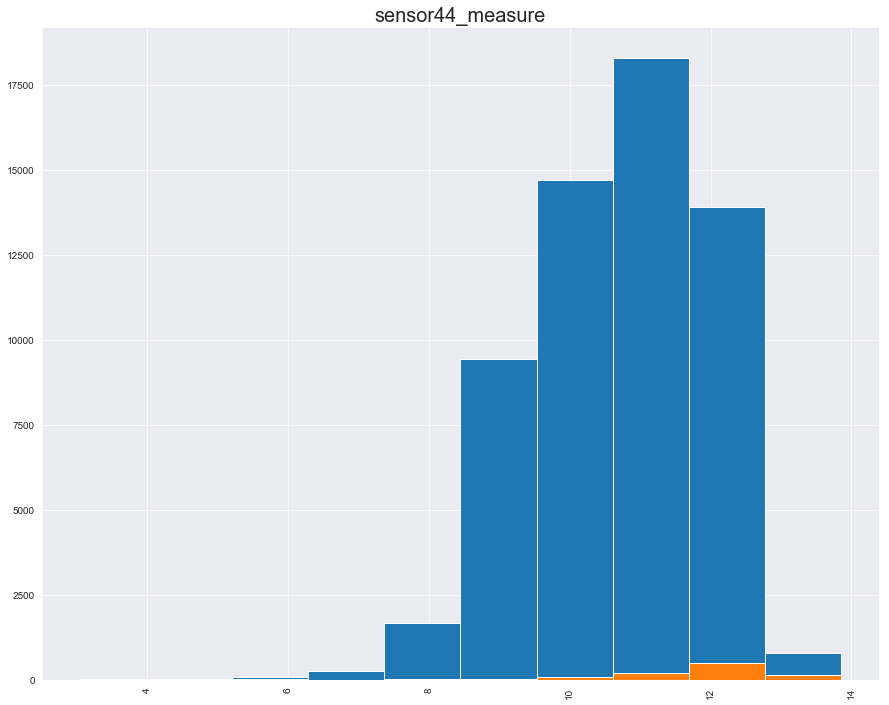

Missing 0%, Zero 0%
count   59702.000
mean        8.688
std         3.179
min         0.010
25%         6.786
50%        10.338
75%        10.797
max        14.826
Name: sensor45_measure, dtype: float64


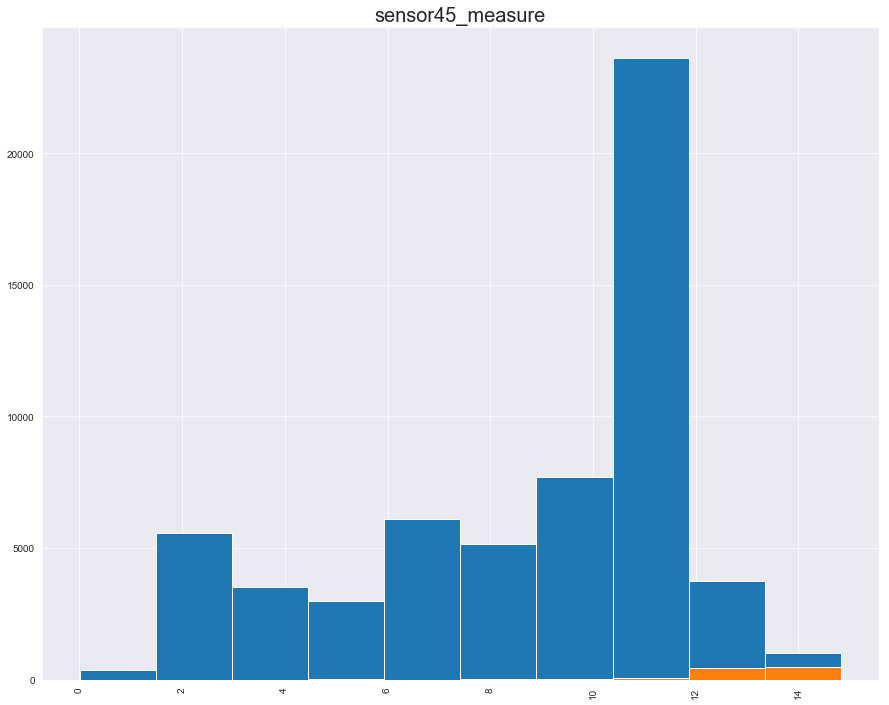

Missing 0%, Zero 0%
count   59202.000
mean       13.611
std         2.262
min         1.609
25%        11.577
50%        14.676
75%        15.168
max        19.078
Name: sensor46_measure, dtype: float64


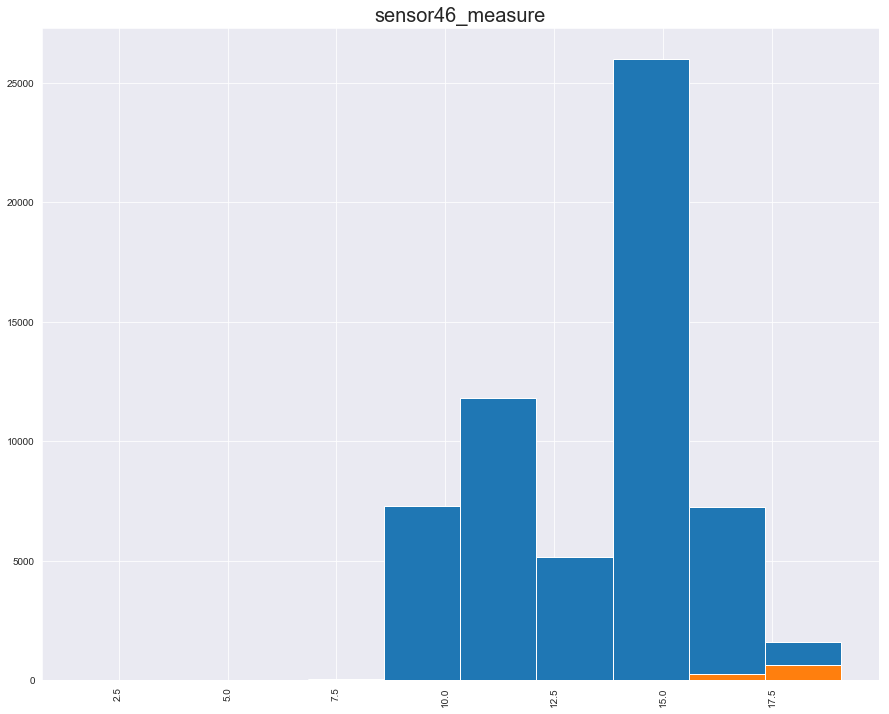

Missing 0%, Zero 0%
count   59202.000
mean       13.611
std         2.262
min         1.609
25%        11.577
50%        14.676
75%        15.168
max        19.078
Name: sensor47_measure, dtype: float64


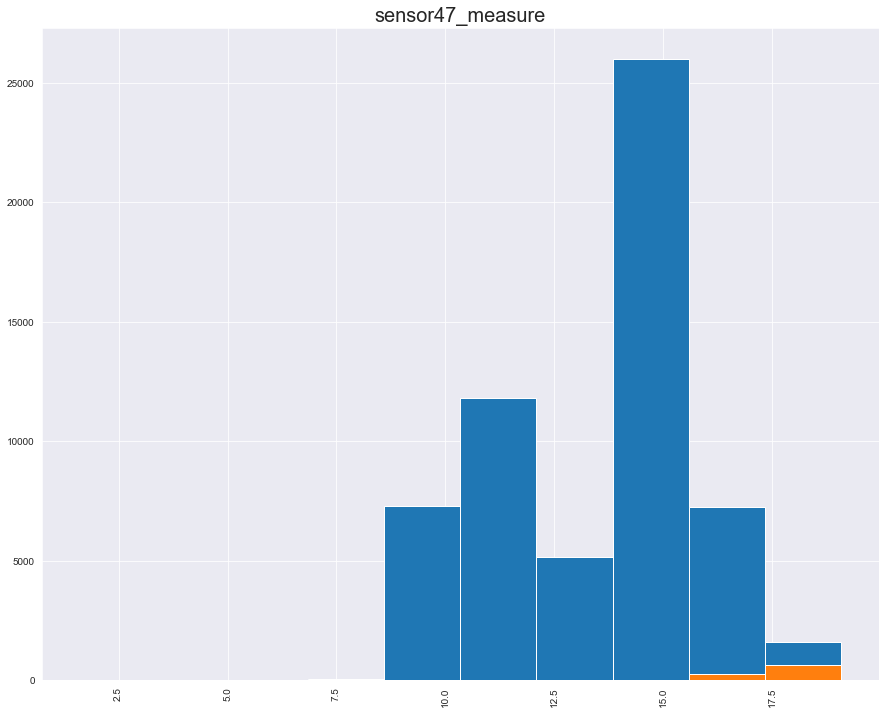

Missing 0%, Zero 0%
count   56743.000
mean       13.411
std         2.427
min         5.153
25%        11.404
50%        14.630
75%        15.109
max        19.043
Name: sensor48_measure, dtype: float64


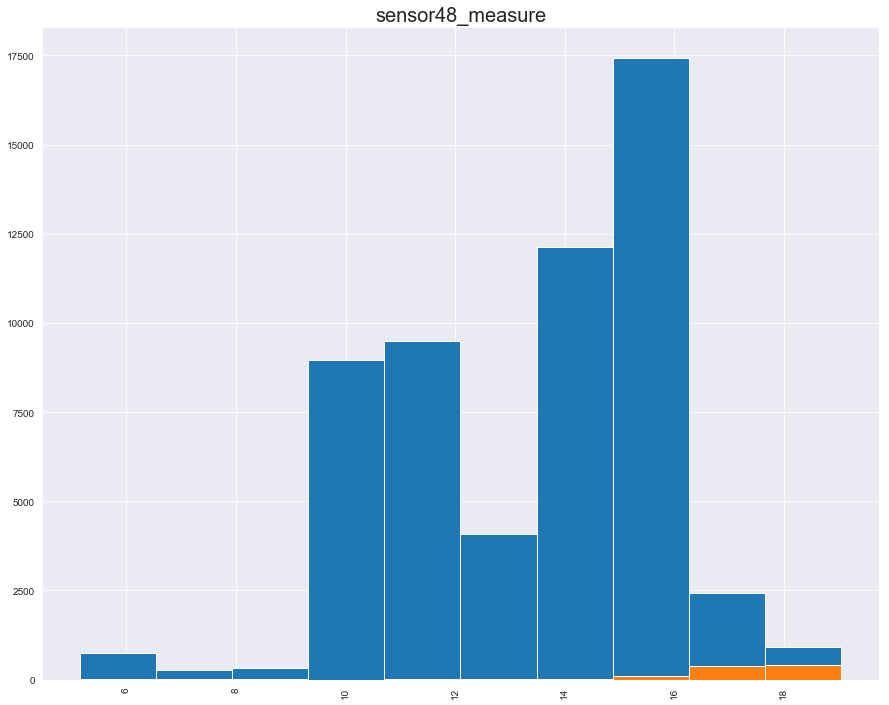

Missing 0%, Zero 0%
count   58303.000
mean        7.932
std         2.794
min         0.693
25%         5.549
50%         9.475
75%         9.934
max        13.818
Name: sensor49_measure, dtype: float64


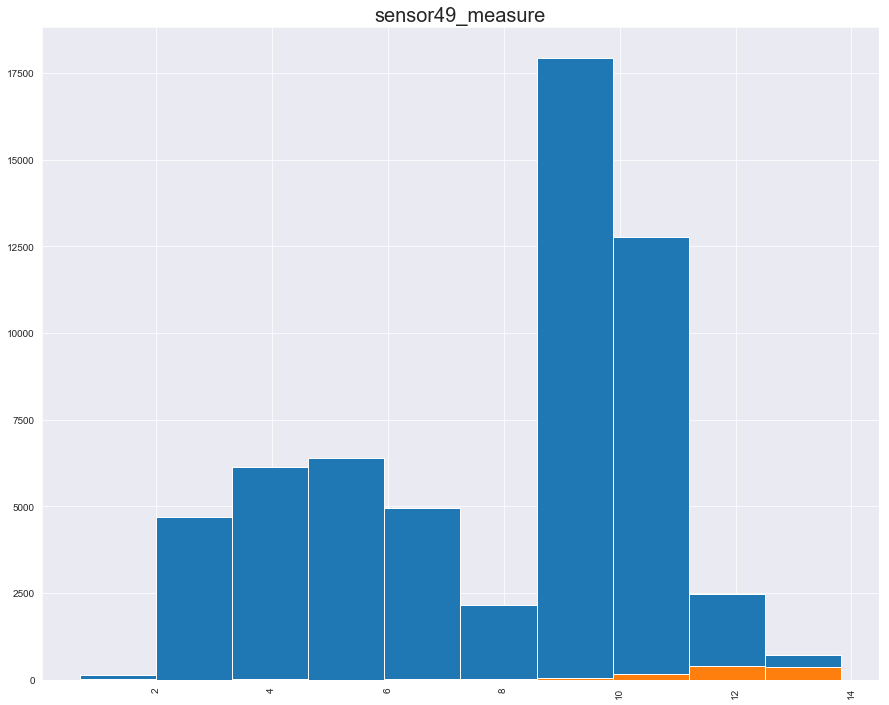

Missing 24.791779055538743%, Zero 0%
count   43130.000
mean        4.807
std         1.718
min         1.099
25%         3.434
50%         4.963
75%         6.120
max        22.873
Name: sensor4_measure, dtype: float64


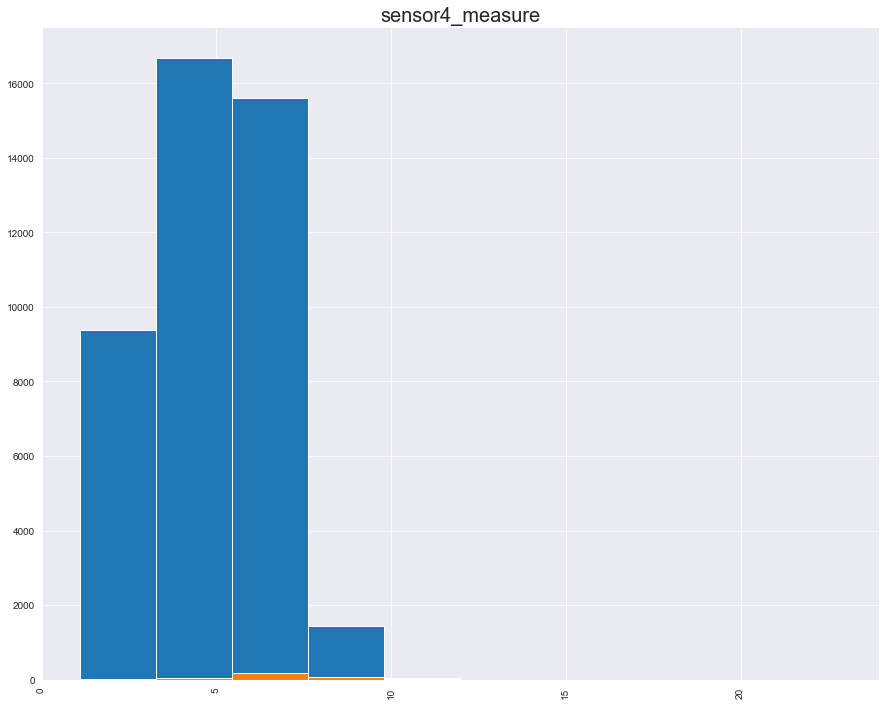

Missing 0%, Zero 0%
count   43436.000
mean        8.230
std         2.978
min         1.099
25%         6.075
50%         8.183
75%        10.334
max        17.518
Name: sensor50_measure, dtype: float64


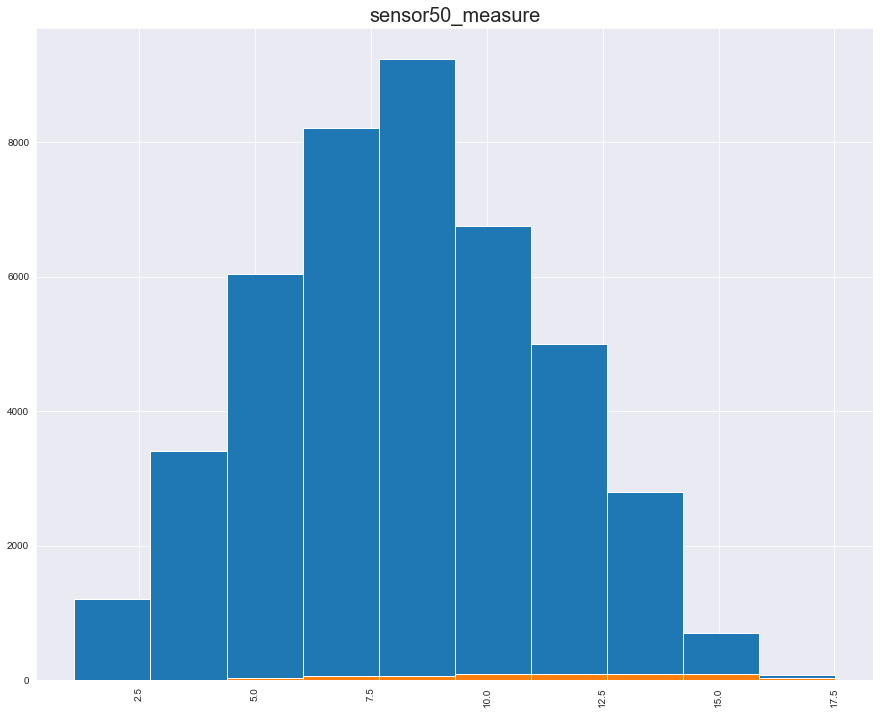

Missing 0%, Zero 0%
count    55535.000
mean     39245.695
std      36743.314
min          2.000
25%       6961.000
50%      25560.000
75%      68103.000
max     120956.000
Name: sensor51_measure, dtype: float64


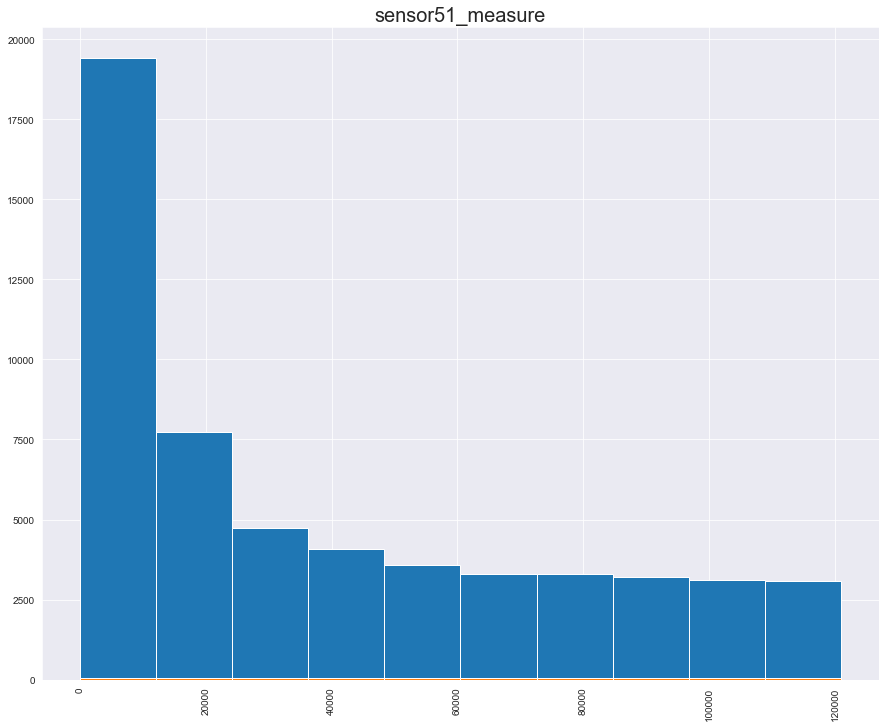

Missing 0%, Zero 0%
count     59165.000
mean     406385.457
std      369315.974
min          20.000
25%       77940.000
50%      280320.000
75%      705460.000
max     1209520.000
Name: sensor52_measure, dtype: float64


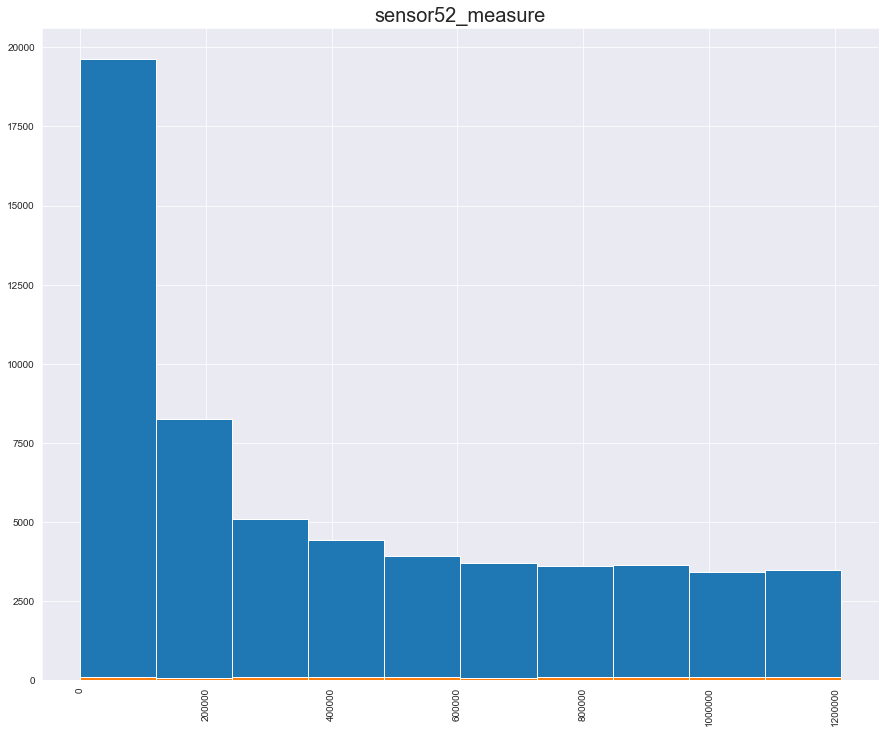

Missing 0%, Zero 0%
count   55867.000
mean       13.220
std         2.577
min         2.398
25%        11.164
50%        14.583
75%        15.042
max        18.817
Name: sensor53_measure, dtype: float64


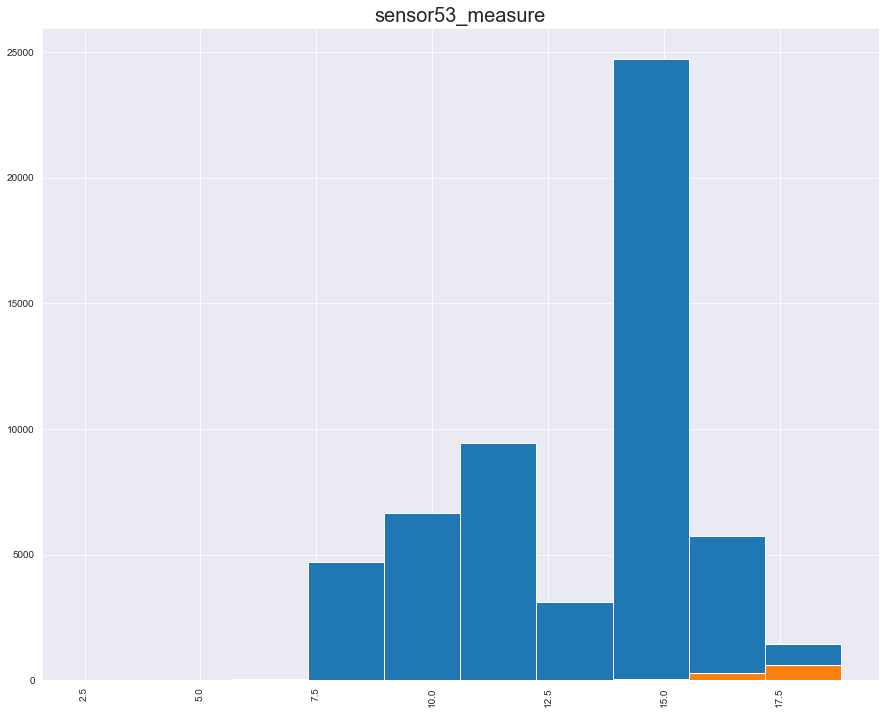

Missing 0%, Zero 0%
count     59324.000
mean    1209600.000
std           0.000
min     1209600.000
25%     1209600.000
50%     1209600.000
75%     1209600.000
max     1209600.000
Name: sensor54_measure, dtype: float64


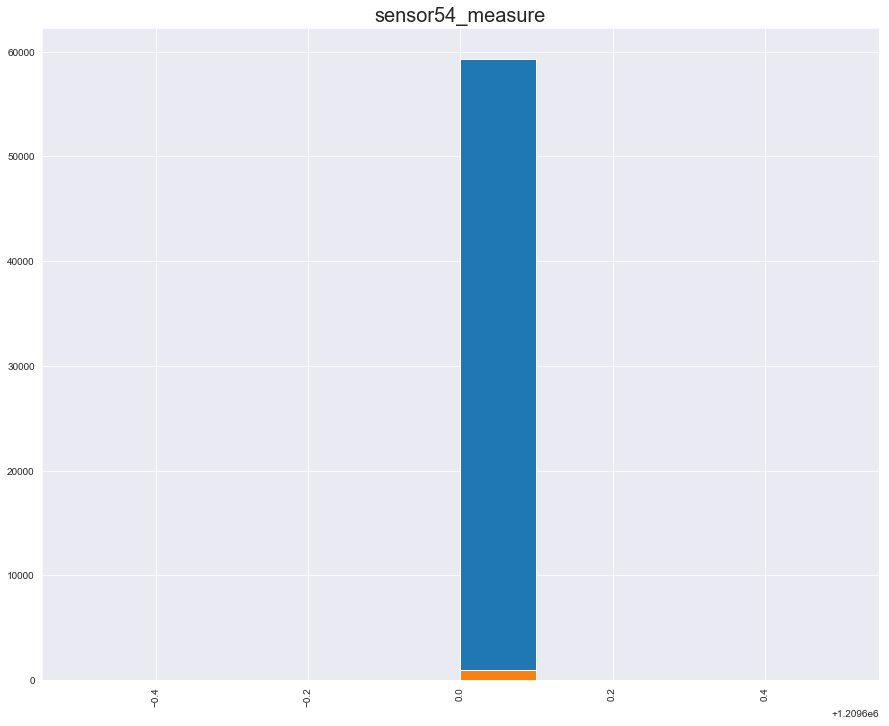

Missing 0%, Zero 0%
count   45653.000
mean        9.570
std         2.459
min         1.099
25%         7.317
50%        10.943
75%        11.513
max        15.406
Name: sensor55_measure, dtype: float64


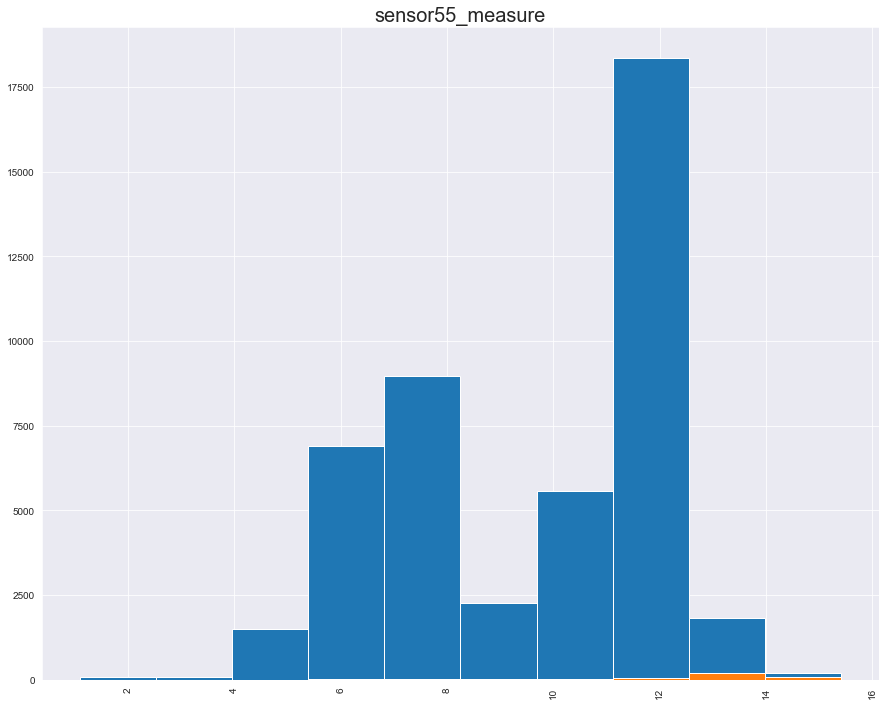

Missing 24.791779055538743%, Zero 0%
count   23671.000
mean        1.517
std         1.118
min         1.099
25%         1.099
50%         1.099
75%         1.609
max        22.873
Name: sensor56_measure, dtype: float64


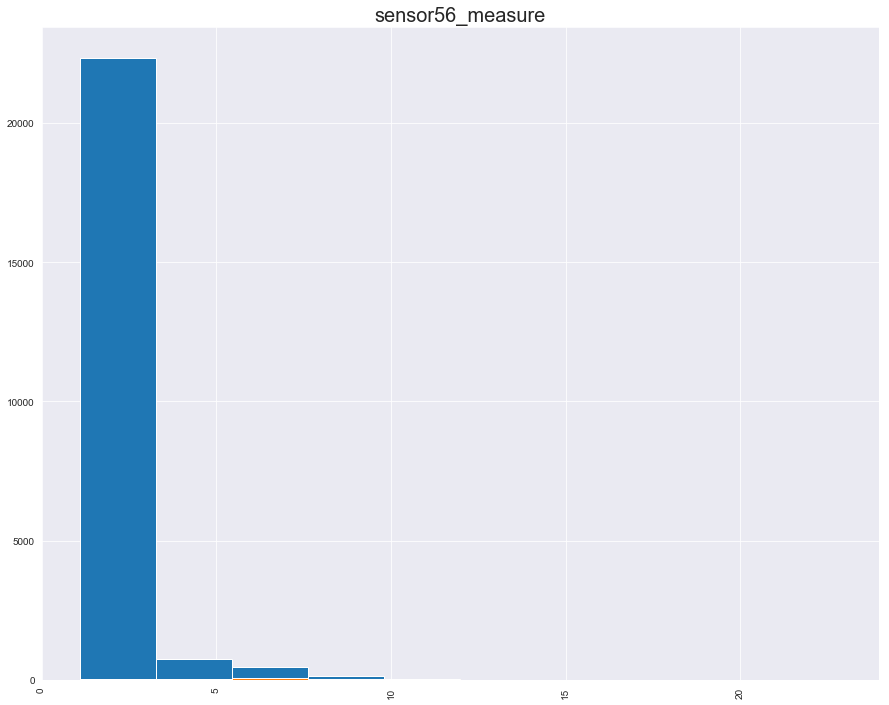

Missing 24.791779055538743%, Zero 0%
count   42224.000
mean        3.632
std         1.414
min         1.099
25%         2.398
50%         4.007
75%         4.691
max         9.971
Name: sensor57_measure, dtype: float64


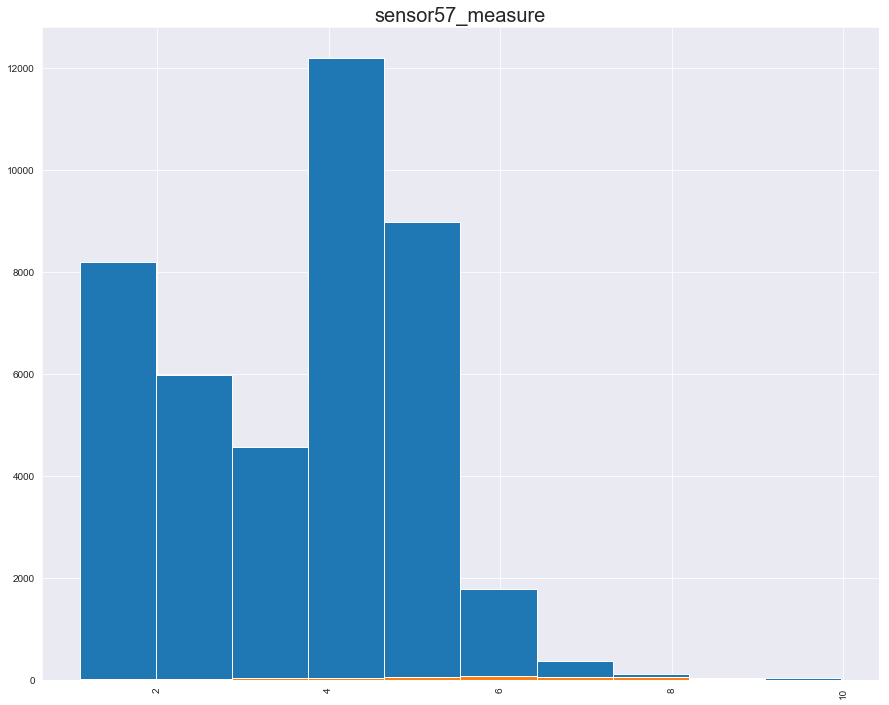

Missing 24.791779055538743%, Zero 99.9828949619084%
count   10.000
mean     2.000
std      0.000
min      2.000
25%      2.000
50%      2.000
75%      2.000
max      2.000
Name: sensor58_measure, dtype: float64


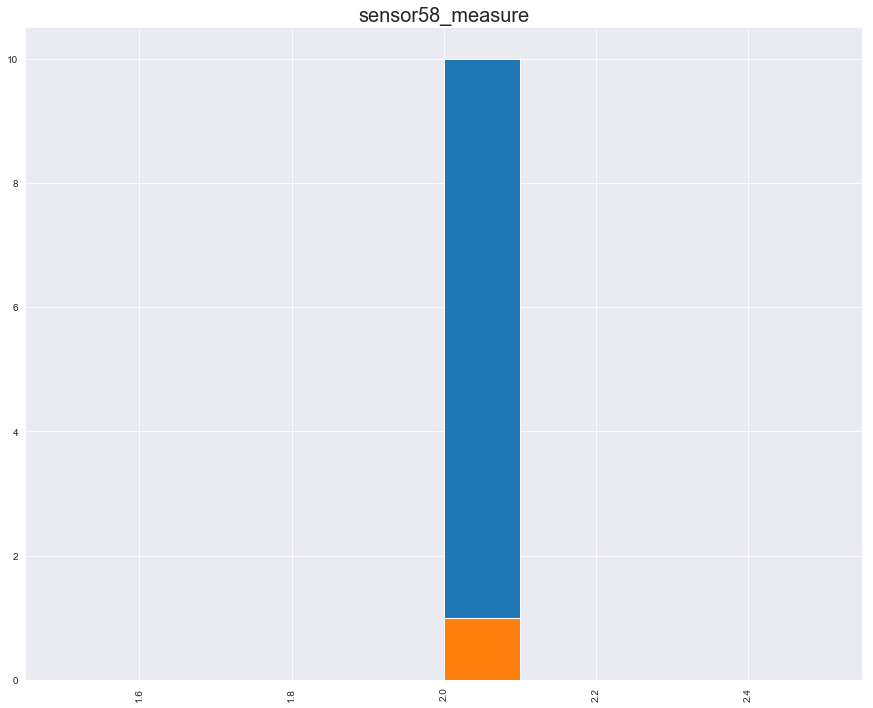

Missing 0%, Zero 0%
count   59439.000
mean       12.938
std         2.874
min         1.356
25%        10.814
50%        14.440
75%        14.899
max        18.764
Name: sensor59_measure, dtype: float64


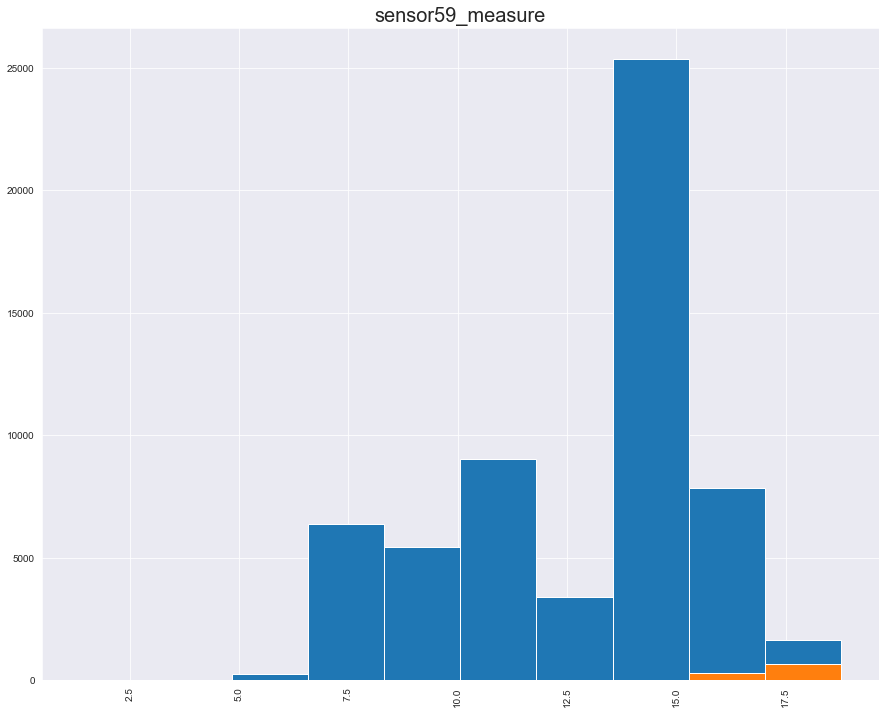

Missing 0%, Zero 96.70662228128577%
count   1957.000
mean       3.263
std        2.029
min        1.099
25%        1.099
50%        2.833
75%        5.043
max        9.955
Name: sensor5_measure, dtype: float64


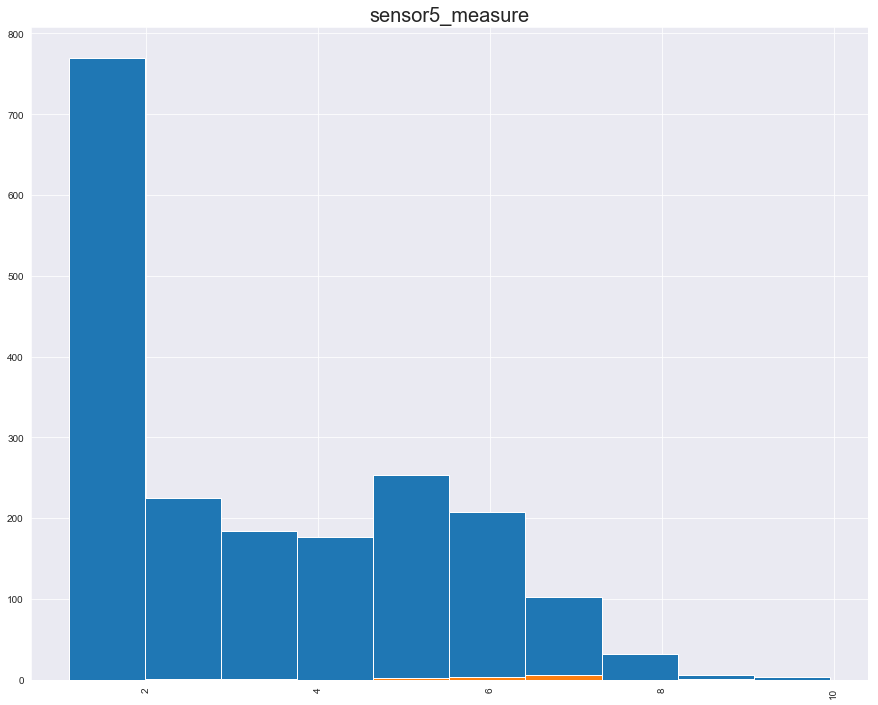

Missing 0%, Zero 0%
count   12540.000
mean        8.635
std         3.777
min         0.673
25%         5.367
50%         9.381
75%        11.111
max        17.926
Name: sensor60_measure, dtype: float64


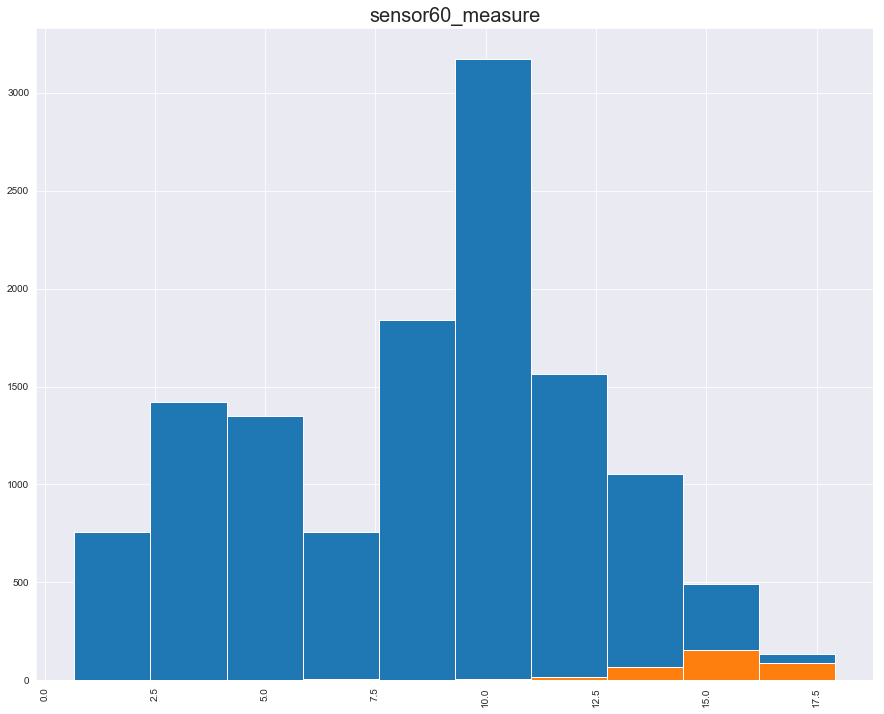

Missing 0%, Zero 0%
count   59468.000
mean       11.650
std         2.224
min         1.356
25%         9.608
50%        12.437
75%        13.220
max        17.831
Name: sensor61_measure, dtype: float64


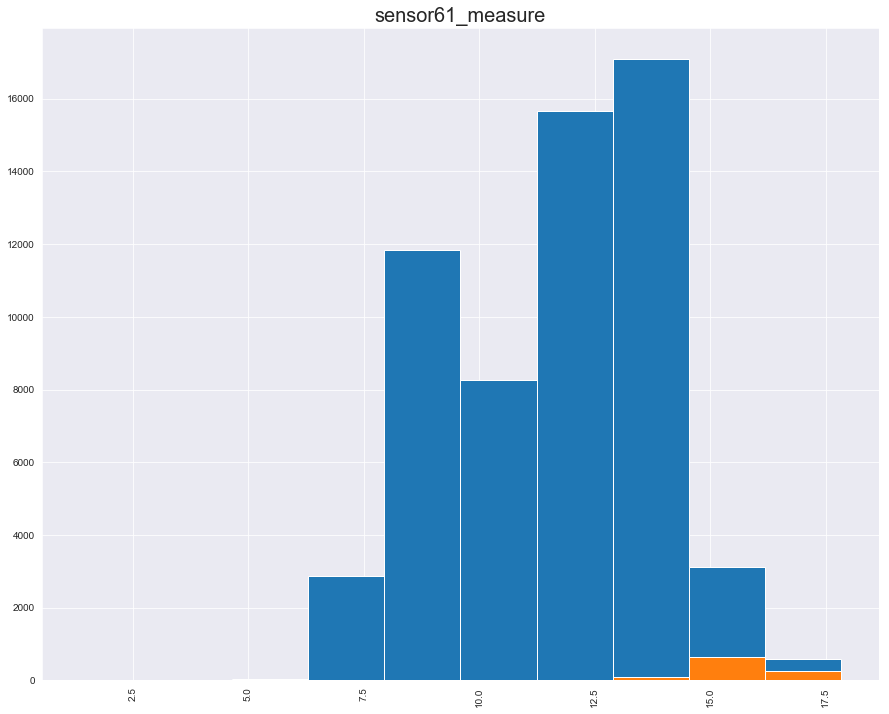

Missing 15.805055196642147%, Zero 0%
count   13660.000
mean        3.274
std         2.077
min         1.099
25%         1.609
50%         2.833
75%         4.290
max        11.780
Name: sensor62_measure, dtype: float64


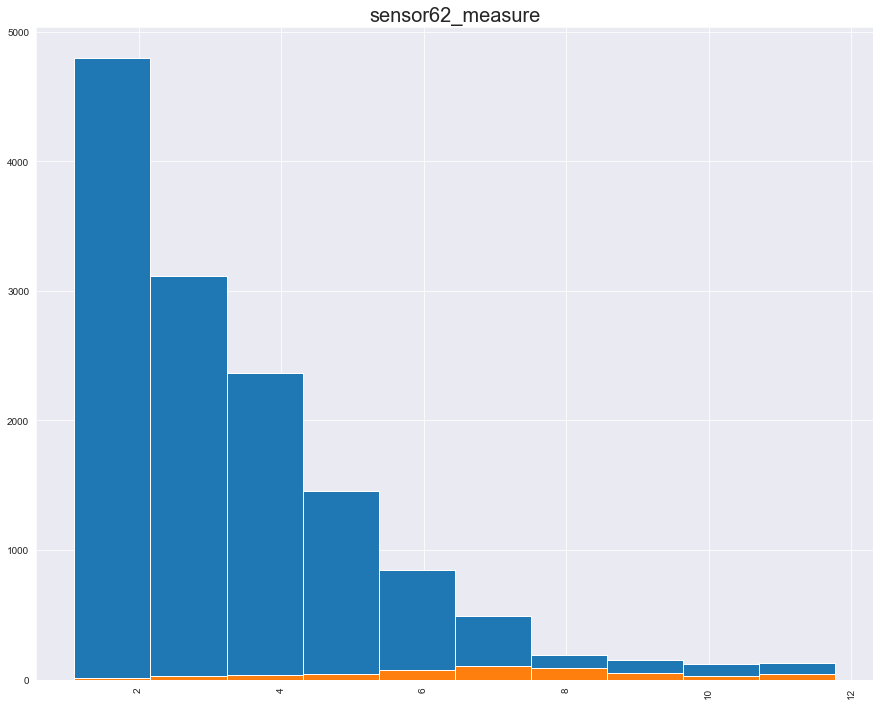

Missing 16.38794226391758%, Zero 0%
count   25908.000
mean        4.764
std         1.838
min         1.099
25%         3.135
50%         4.511
75%         6.276
max        11.203
Name: sensor63_measure, dtype: float64


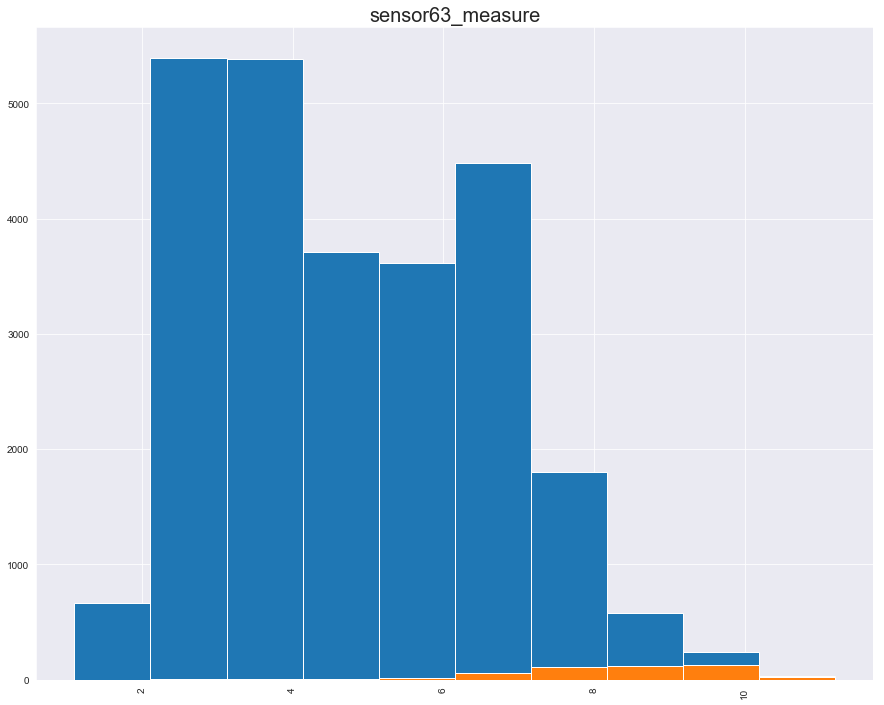

Missing 0%, Zero 96.6118866857015%
count   2013.000
mean       8.288
std        2.522
min        1.099
25%        6.629
50%        8.202
75%        9.968
max       15.653
Name: sensor64_histogram_bin0, dtype: float64


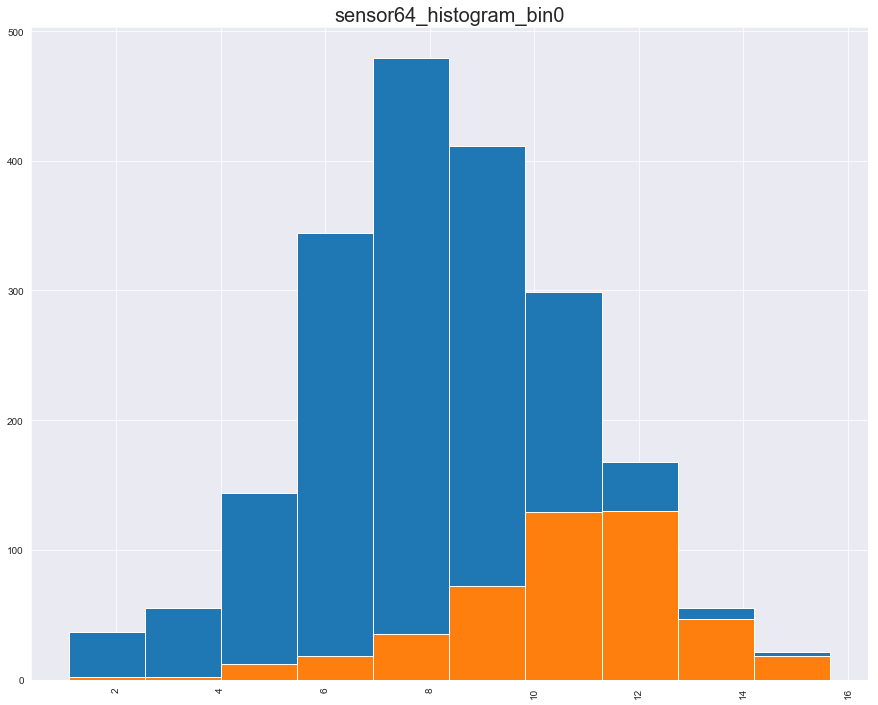

Missing 0%, Zero 0%
count   8849.000
mean       8.747
std        2.772
min        1.099
25%        6.880
50%        8.608
75%       10.701
max       16.491
Name: sensor64_histogram_bin1, dtype: float64


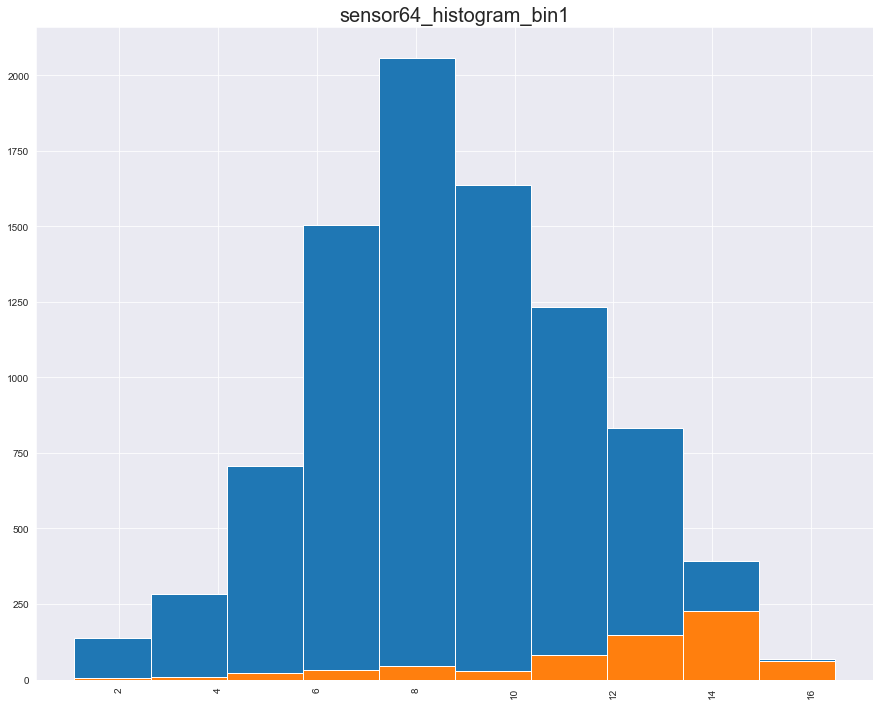

Missing 0%, Zero 0%
count   28775.000
mean        9.214
std         2.704
min         1.099
25%         7.499
50%         9.076
75%        10.670
max        17.885
Name: sensor64_histogram_bin2, dtype: float64


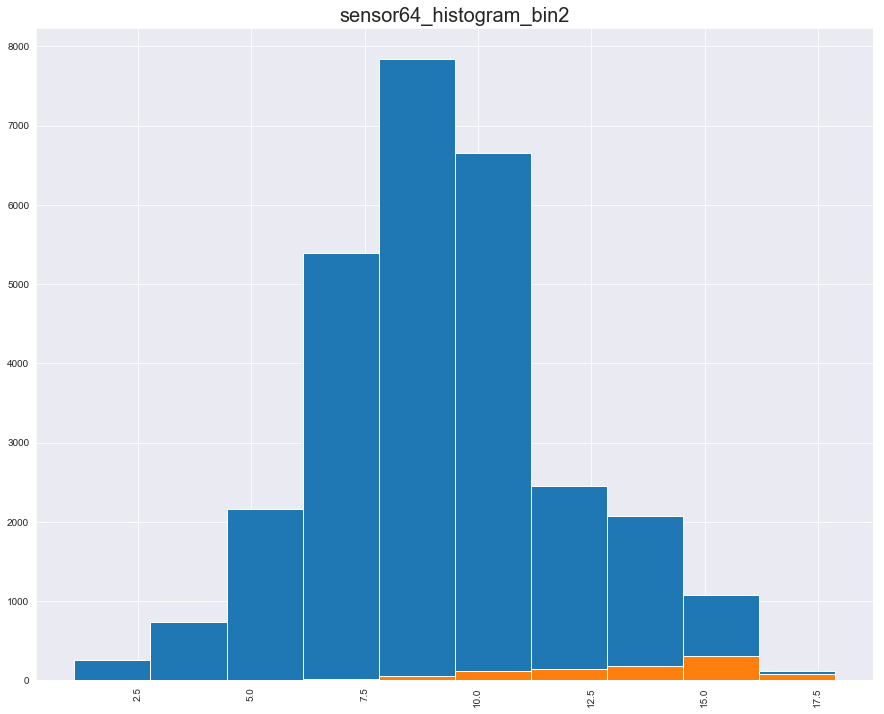

Missing 0%, Zero 0%
count   56719.000
mean       10.579
std         2.536
min         1.099
25%         8.735
50%        10.623
75%        12.439
max        18.369
Name: sensor64_histogram_bin3, dtype: float64


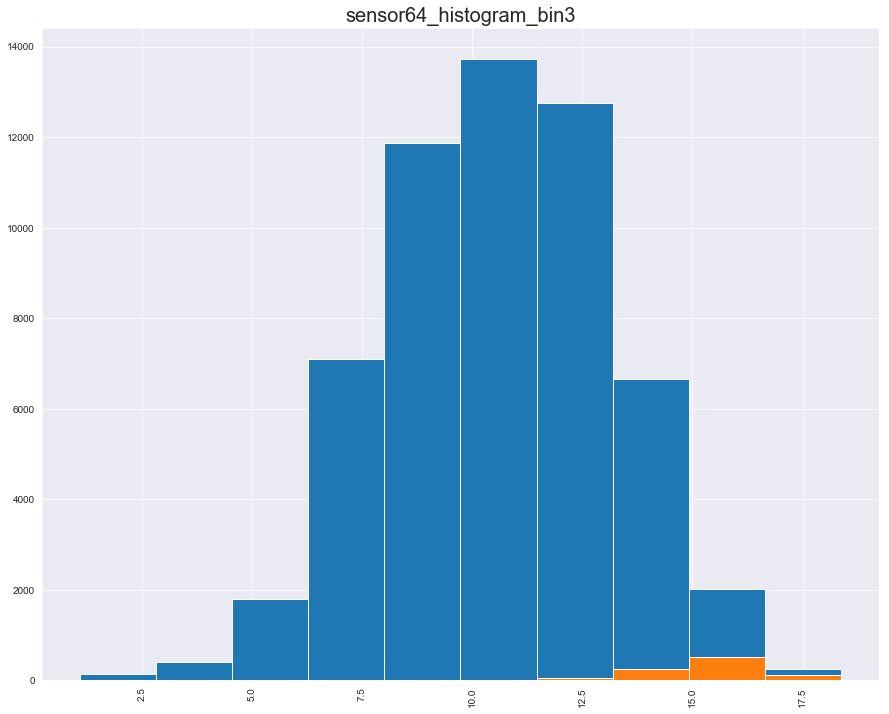

Missing 0%, Zero 0%
count   58206.000
mean       12.125
std         2.596
min         1.609
25%        10.072
50%        13.209
75%        14.019
max        18.951
Name: sensor64_histogram_bin4, dtype: float64


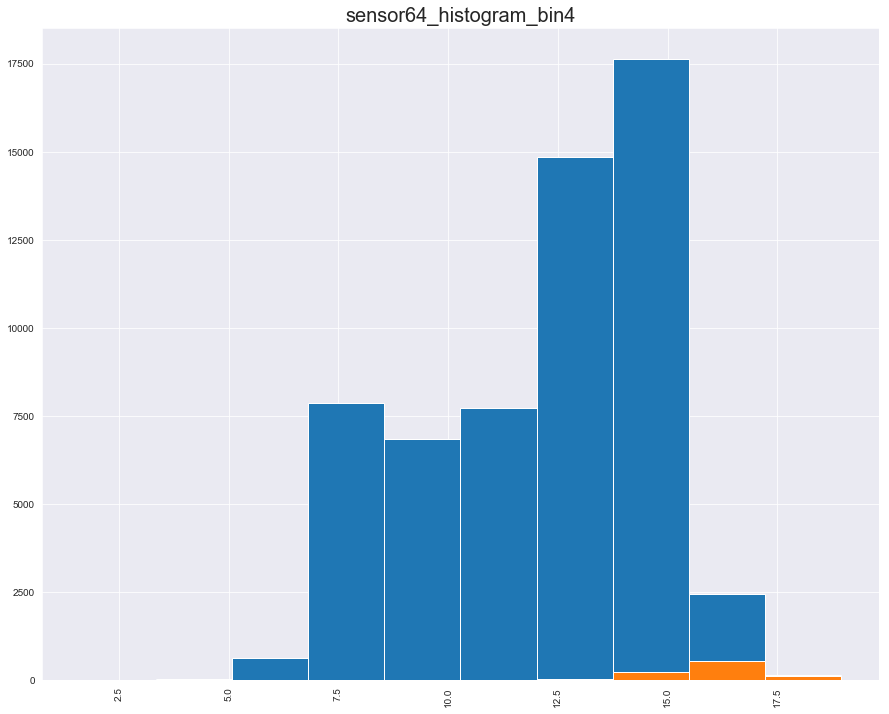

Missing 0%, Zero 0%
count   58138.000
mean       11.788
std         3.195
min         1.099
25%         8.815
50%        13.536
75%        14.247
max        18.585
Name: sensor64_histogram_bin5, dtype: float64


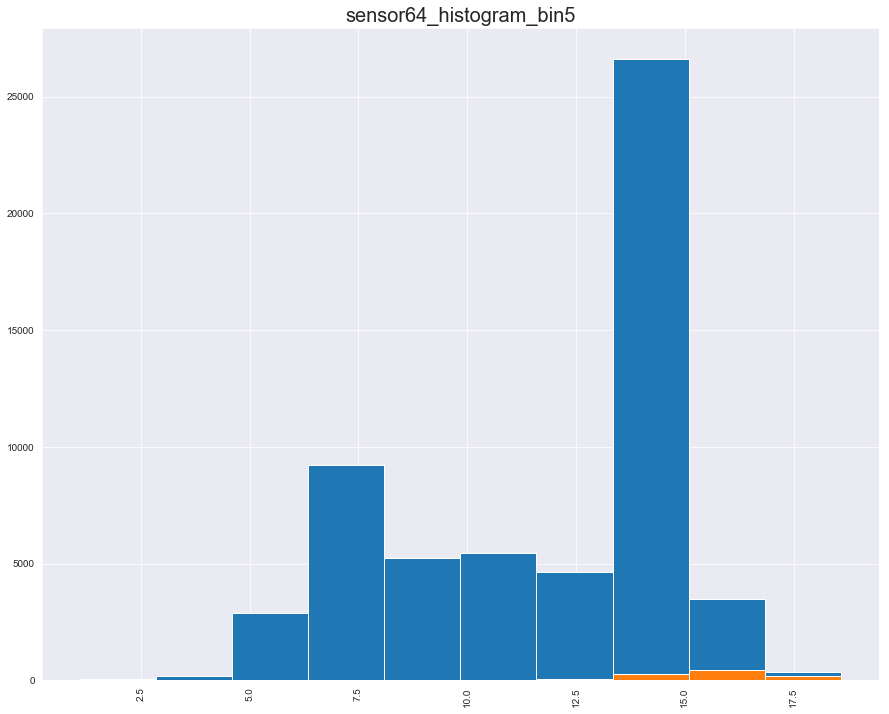

Missing 0%, Zero 0%
count   56587.000
mean       10.262
std         3.457
min         1.099
25%         6.812
50%        11.709
75%        13.066
max        18.093
Name: sensor64_histogram_bin6, dtype: float64


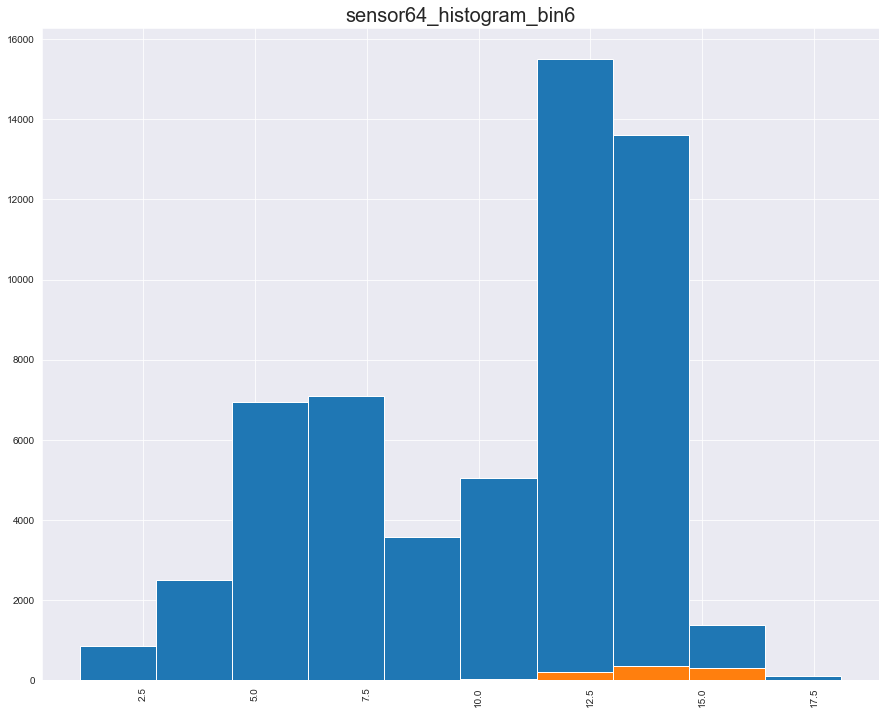

Missing 0%, Zero 0%
count   50024.000
mean        8.641
std         2.917
min         1.099
25%         6.494
50%         9.619
75%        10.536
max        17.316
Name: sensor64_histogram_bin7, dtype: float64


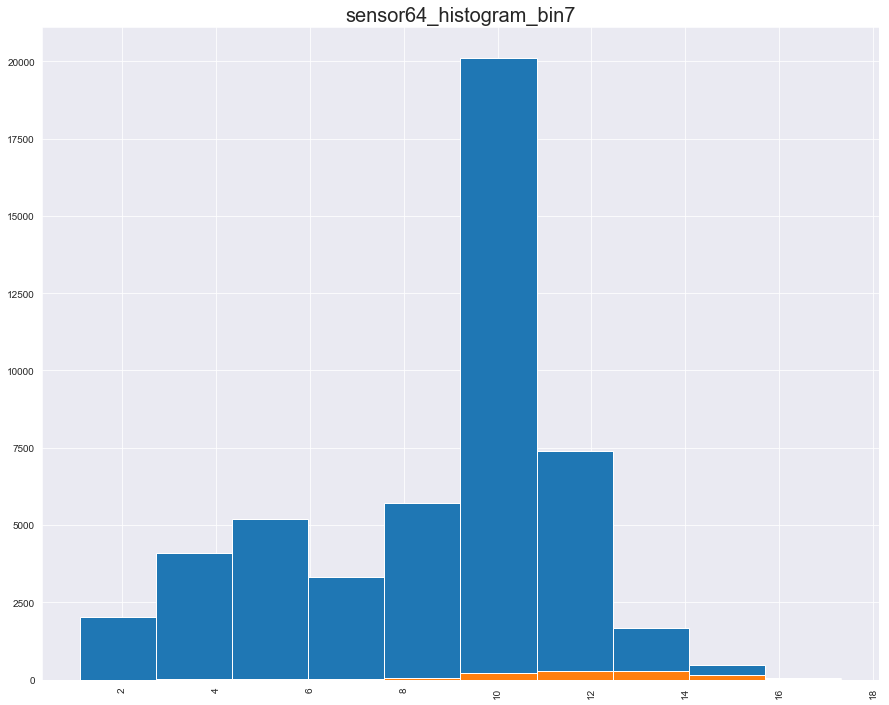

Missing 0%, Zero 0%
count   43926.000
mean        7.540
std         2.396
min         1.099
25%         6.774
50%         8.155
75%         8.860
max        15.836
Name: sensor64_histogram_bin8, dtype: float64


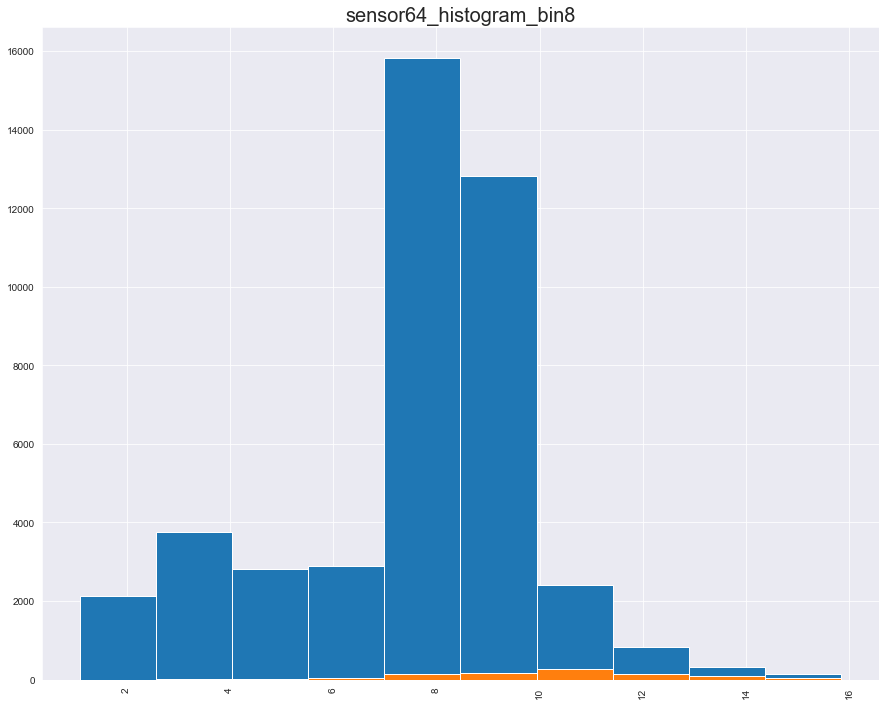

Missing 0%, Zero 0%
count   33335.000
mean        5.493
std         1.890
min         1.099
25%         4.369
50%         5.485
75%         6.475
max        17.410
Name: sensor64_histogram_bin9, dtype: float64


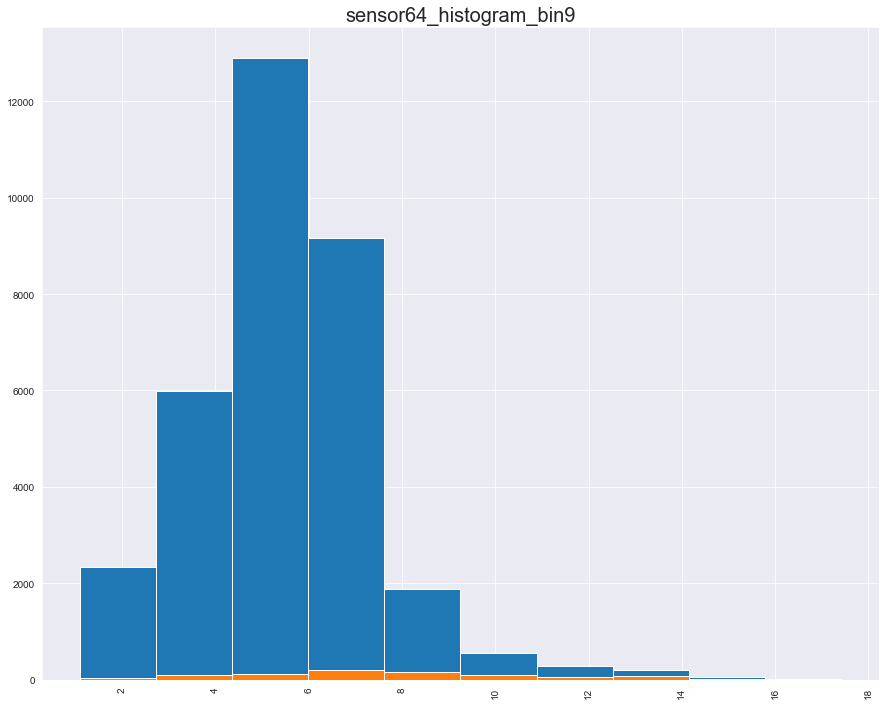

Missing 24.791779055538743%, Zero 0%
count   32346.000
mean        3.684
std         2.049
min         1.099
25%         1.946
50%         3.296
75%         5.094
max        22.873
Name: sensor65_measure, dtype: float64


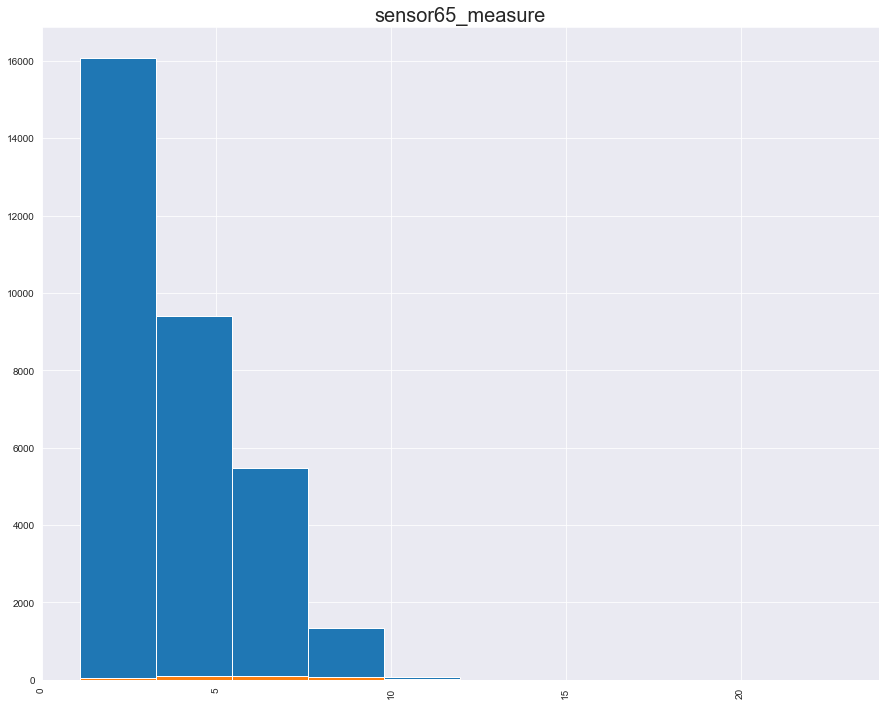

Missing 0%, Zero 0%
count   47739.000
mean        3.714
std         1.882
min         1.099
25%         2.197
50%         3.219
75%         4.828
max        13.115
Name: sensor66_measure, dtype: float64


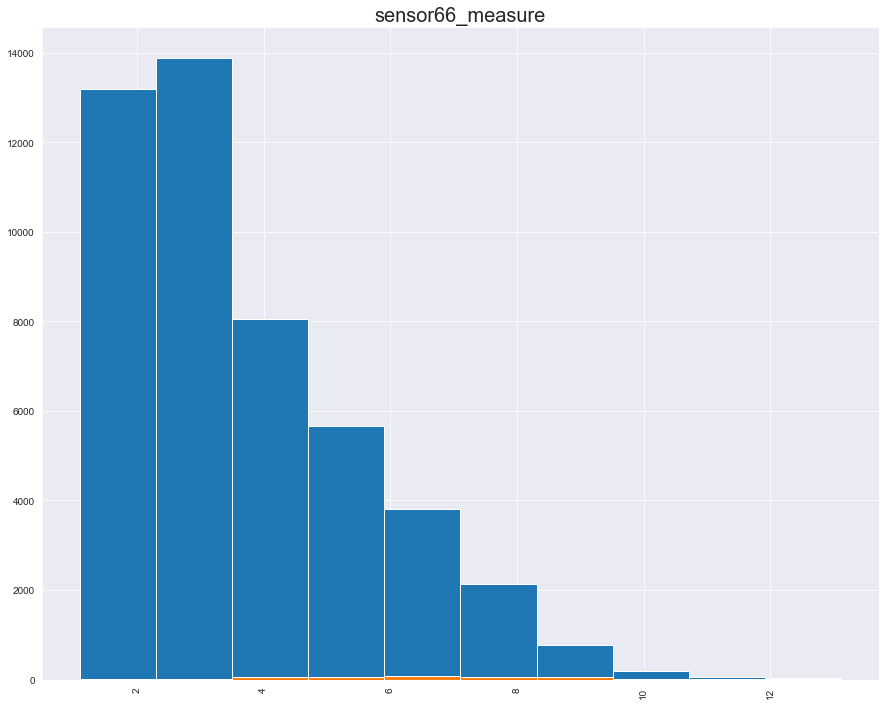

Missing 0%, Zero 0%
count   59202.000
mean       13.611
std         2.262
min         1.609
25%        11.577
50%        14.676
75%        15.168
max        19.078
Name: sensor67_measure, dtype: float64


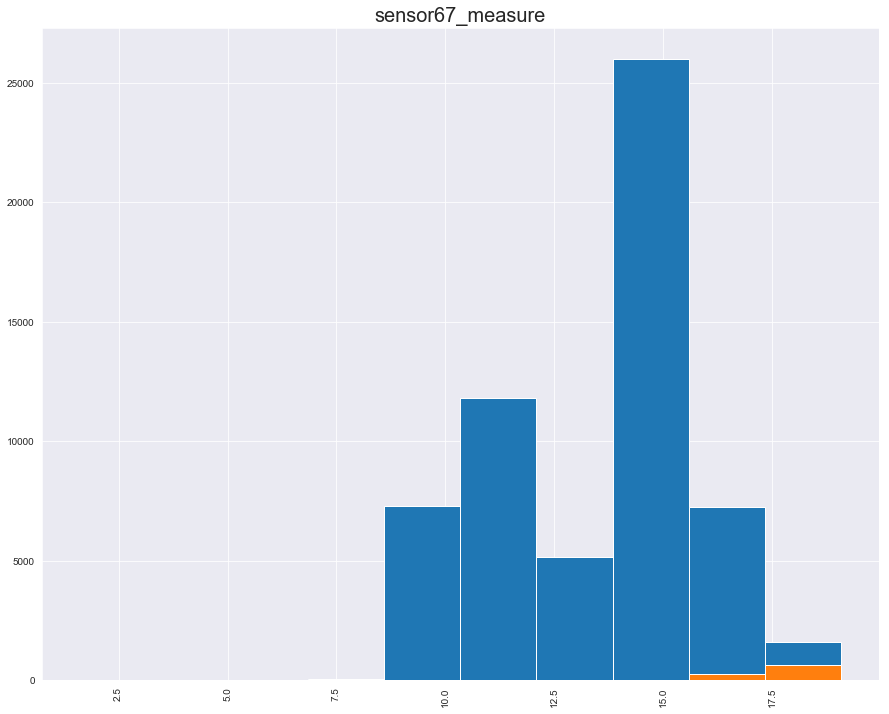

Missing 77.22661543927055%, Zero 99.8750016447152%
count   79.000
mean     6.925
std      2.307
min      1.609
25%      5.004
50%      7.244
75%      8.957
max     10.959
Name: sensor68_measure, dtype: float64


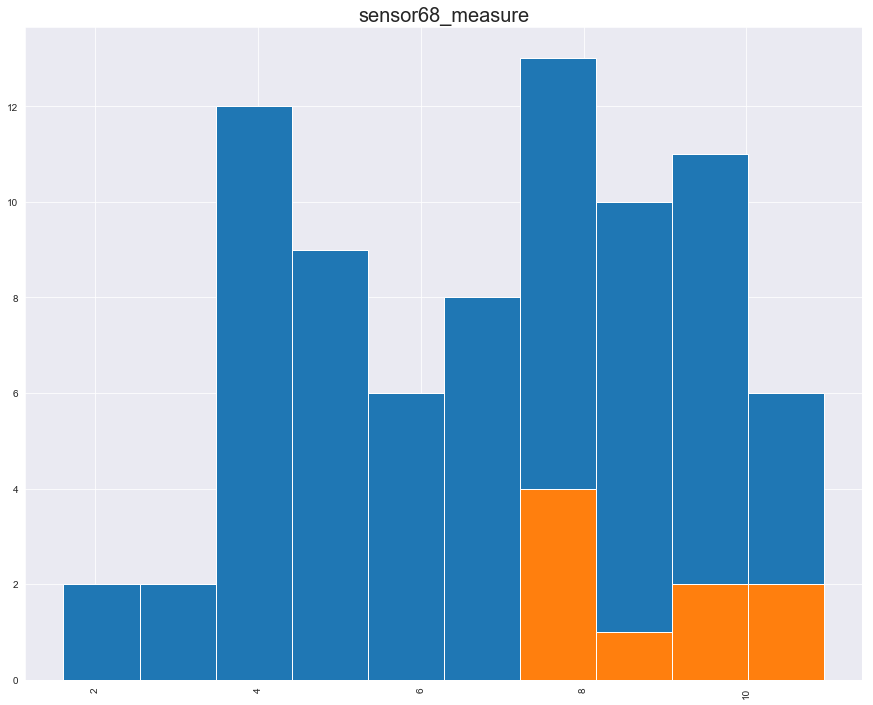

Missing 0%, Zero 0%
count   58241.000
mean        7.927
std         1.235
min         1.099
25%         7.148
50%         8.095
75%         8.658
max        13.640
Name: sensor69_histogram_bin0, dtype: float64


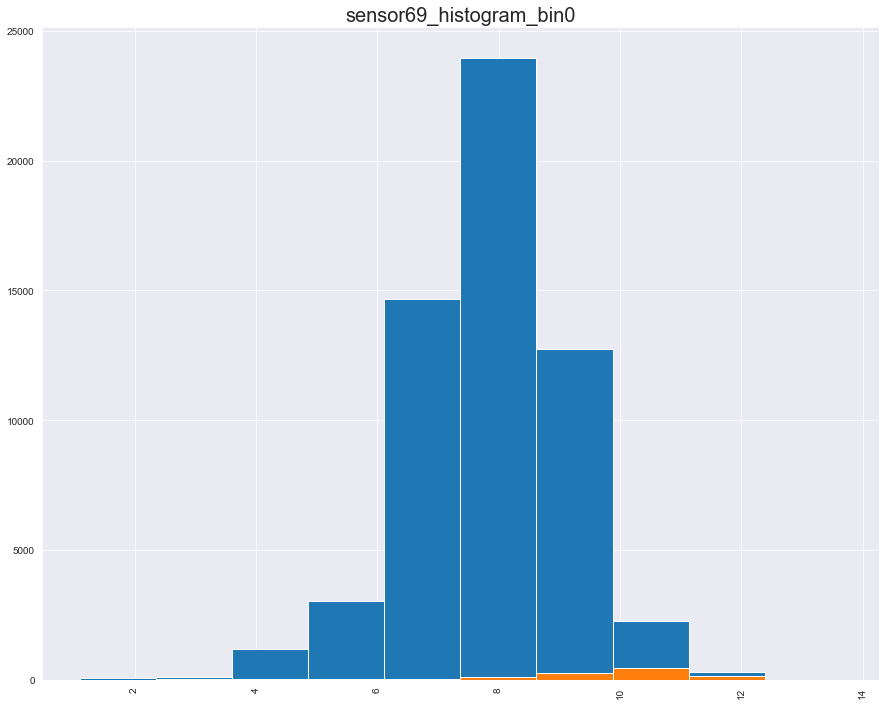

Missing 0%, Zero 0%
count   58076.000
mean        5.295
std         1.835
min         1.099
25%         3.611
50%         5.927
75%         6.561
max        12.992
Name: sensor69_histogram_bin1, dtype: float64


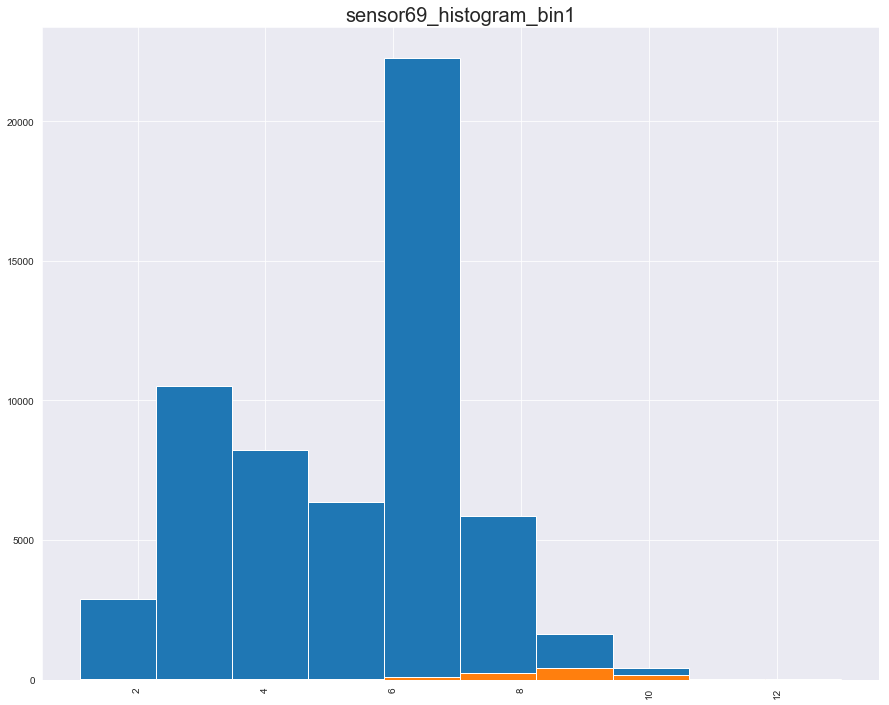

Missing 0%, Zero 0%
count   58163.000
mean        8.835
std         3.566
min         1.099
25%         5.790
50%        10.043
75%        11.487
max        17.646
Name: sensor69_histogram_bin2, dtype: float64


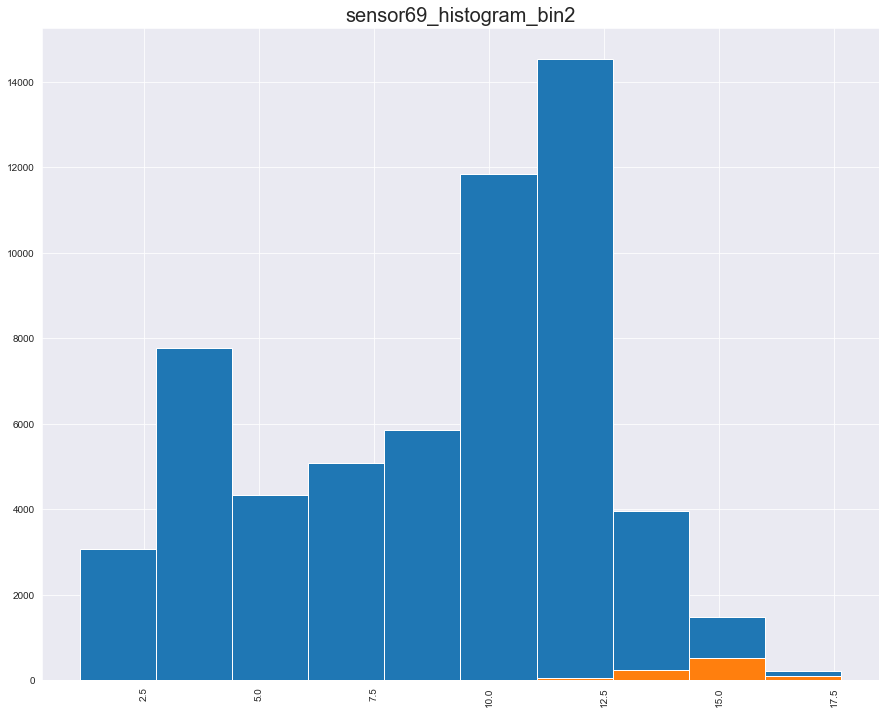

Missing 0%, Zero 0%
count   58126.000
mean       10.316
std         3.345
min         1.099
25%         8.235
50%        11.756
75%        12.616
max        17.563
Name: sensor69_histogram_bin3, dtype: float64


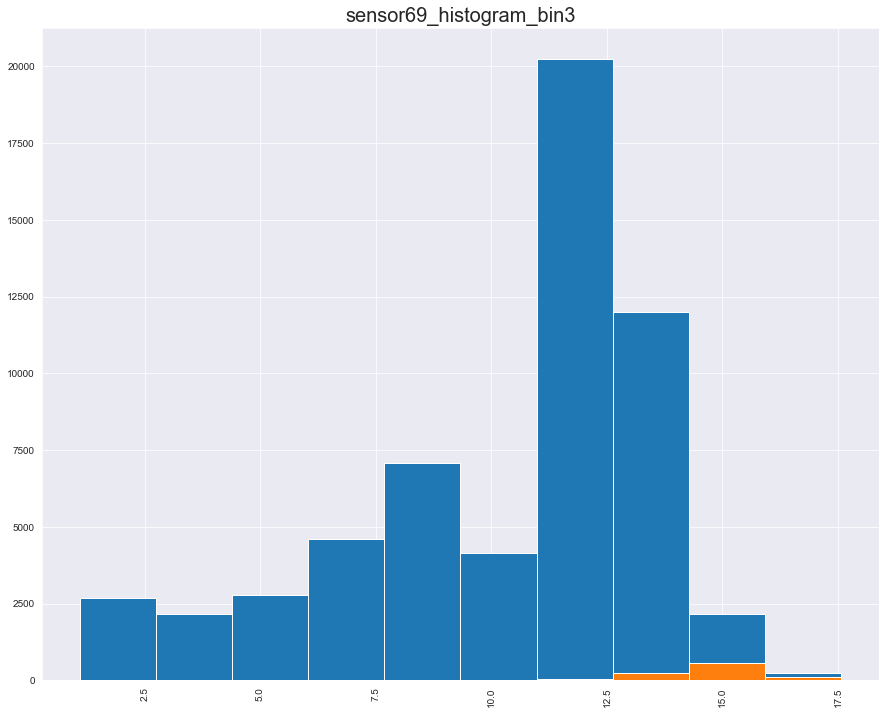

Missing 0%, Zero 0%
count   58108.000
mean       10.363
std         2.902
min         1.099
25%         8.095
50%        11.460
75%        12.266
max        18.131
Name: sensor69_histogram_bin4, dtype: float64


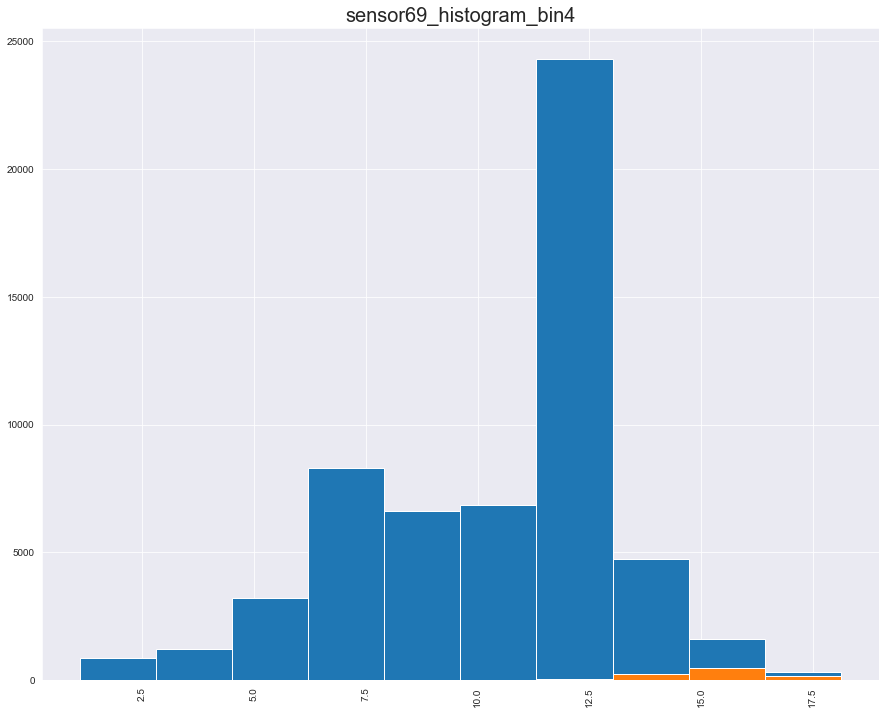

Missing 0%, Zero 0%
count   58201.000
mean       12.461
std         2.957
min         1.099
25%        10.051
50%        14.050
75%        14.544
max        19.753
Name: sensor69_histogram_bin5, dtype: float64


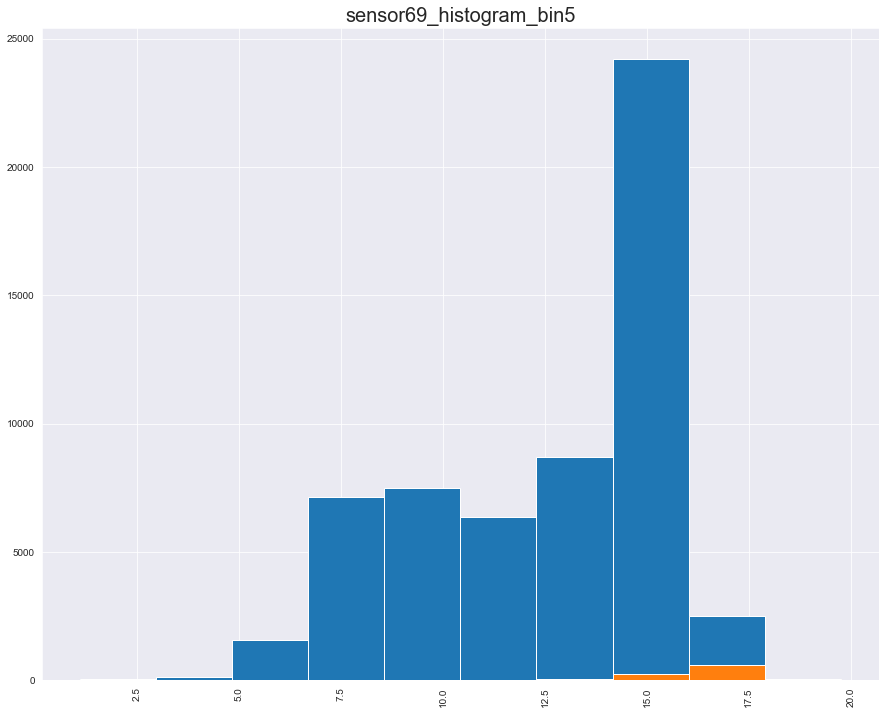

Missing 0%, Zero 0%
count   58209.000
mean       11.548
std         2.480
min         1.099
25%         9.743
50%        12.460
75%        13.454
max        18.116
Name: sensor69_histogram_bin6, dtype: float64


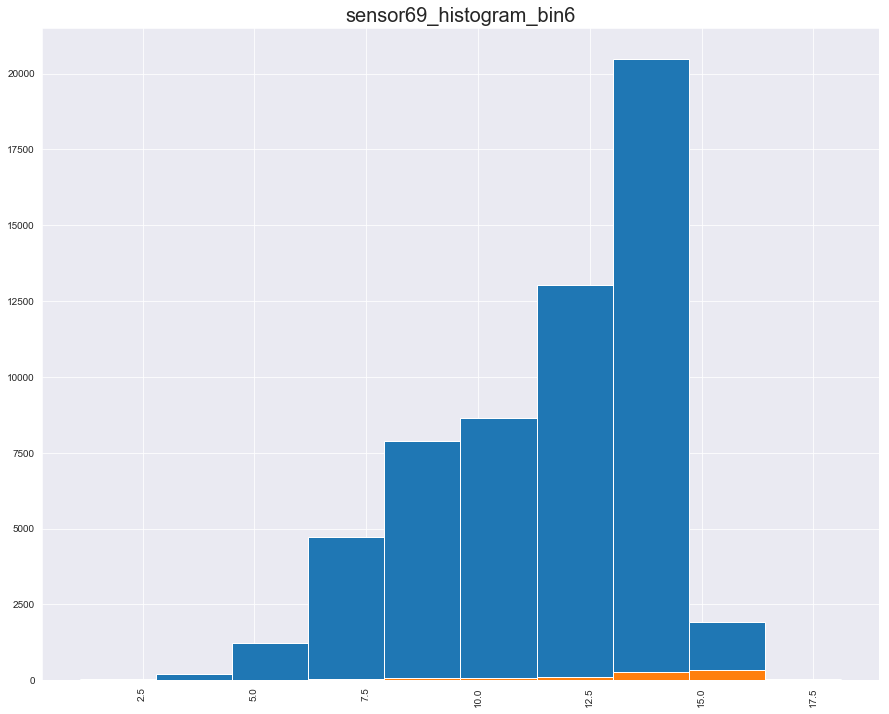

Missing 0%, Zero 0%
count   54224.000
mean        8.632
std         1.735
min         1.099
25%         7.515
50%         8.977
75%         9.886
max        16.372
Name: sensor69_histogram_bin7, dtype: float64


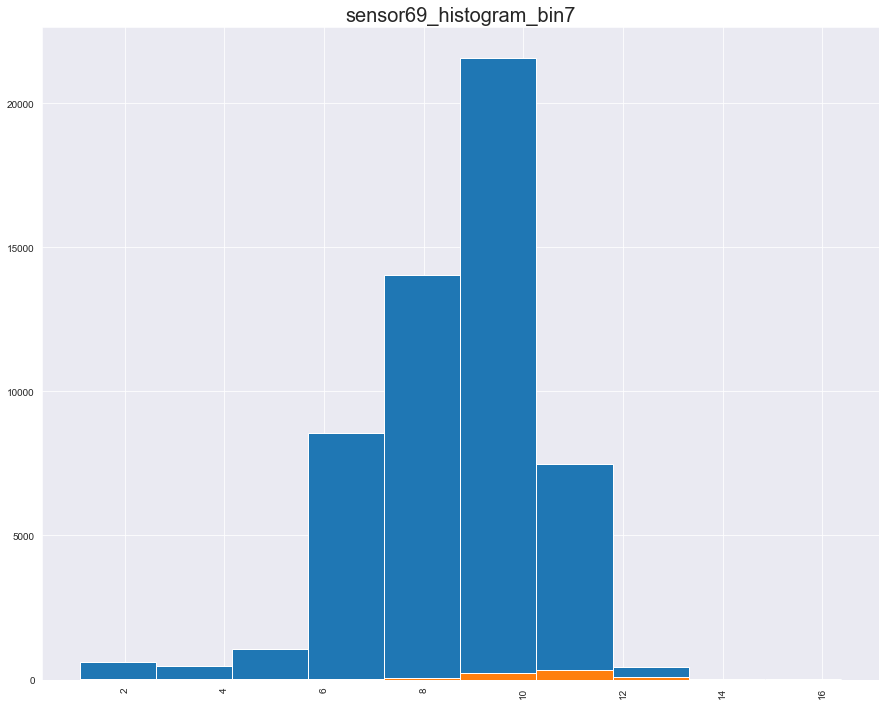

Missing 0%, Zero 0%
count   45288.000
mean        4.232
std         1.418
min         1.099
25%         3.367
50%         4.466
75%         5.252
max        14.276
Name: sensor69_histogram_bin8, dtype: float64


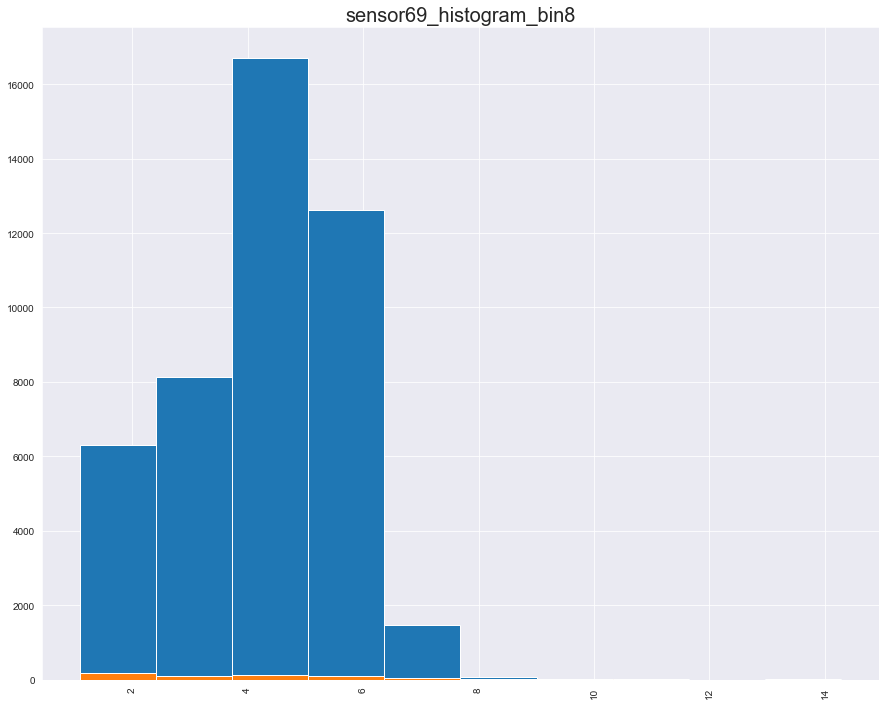

Missing 0%, Zero 0%
count   2904.000
mean       1.584
std        0.992
min        1.099
25%        1.099
50%        1.099
75%        1.609
max       17.620
Name: sensor69_histogram_bin9, dtype: float64


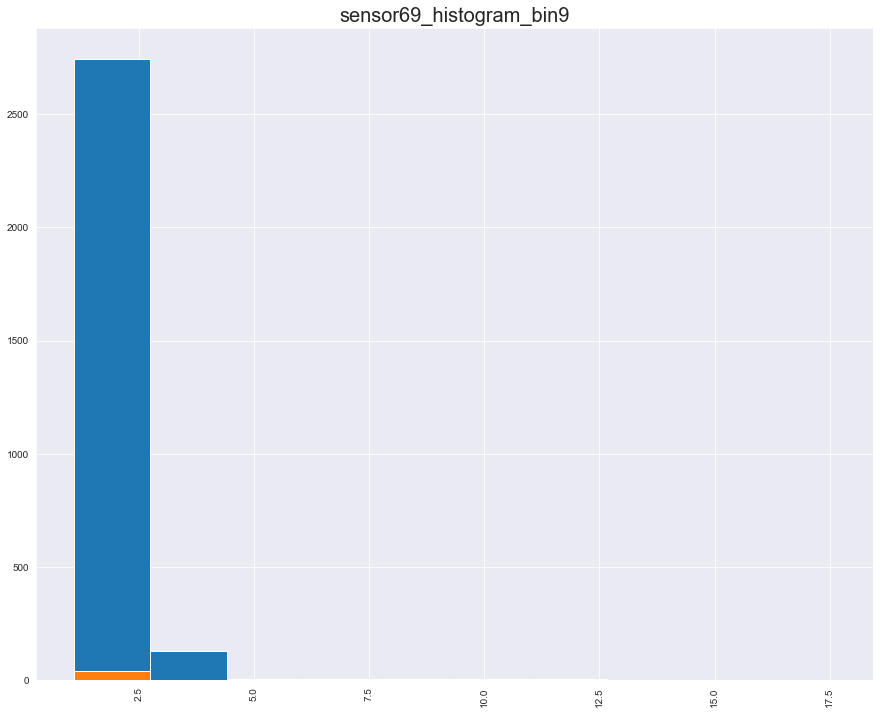

Missing 0%, Zero 96.58820278680544%
count   2024.000
mean       3.473
std        2.199
min        1.099
25%        1.099
50%        3.045
75%        5.479
max        9.907
Name: sensor6_measure, dtype: float64


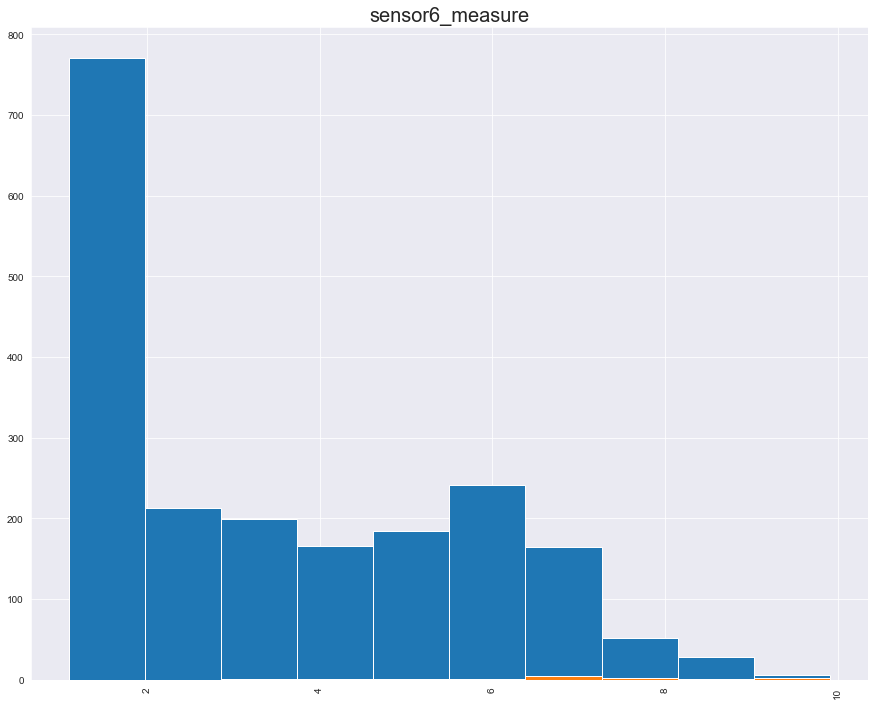

Missing 23.060222891804056%, Zero 0%
count   44006.000
mean        5.251
std         1.777
min         1.099
25%         3.932
50%         5.476
75%         6.561
max        13.722
Name: sensor70_measure, dtype: float64


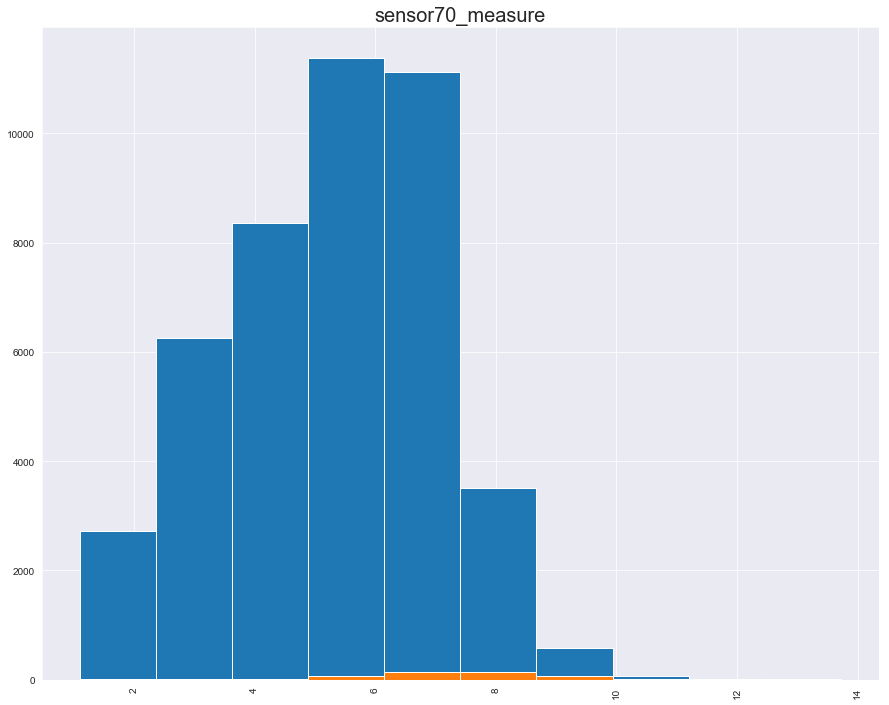

Missing 23.060222891804056%, Zero 0%
count   44032.000
mean        5.673
std         1.713
min         1.099
25%         4.635
50%         5.746
75%         6.810
max        13.506
Name: sensor71_measure, dtype: float64


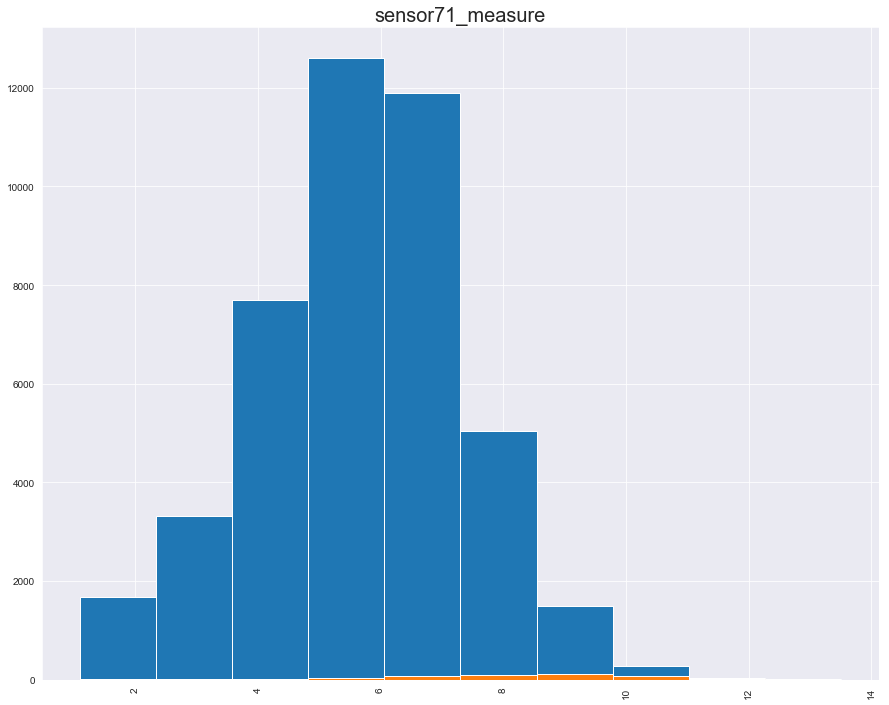

Missing 23.060222891804056%, Zero 0%
count   45163.000
mean       12.540
std         2.842
min         1.099
25%        10.406
50%        14.106
75%        14.701
max        18.217
Name: sensor72_measure, dtype: float64


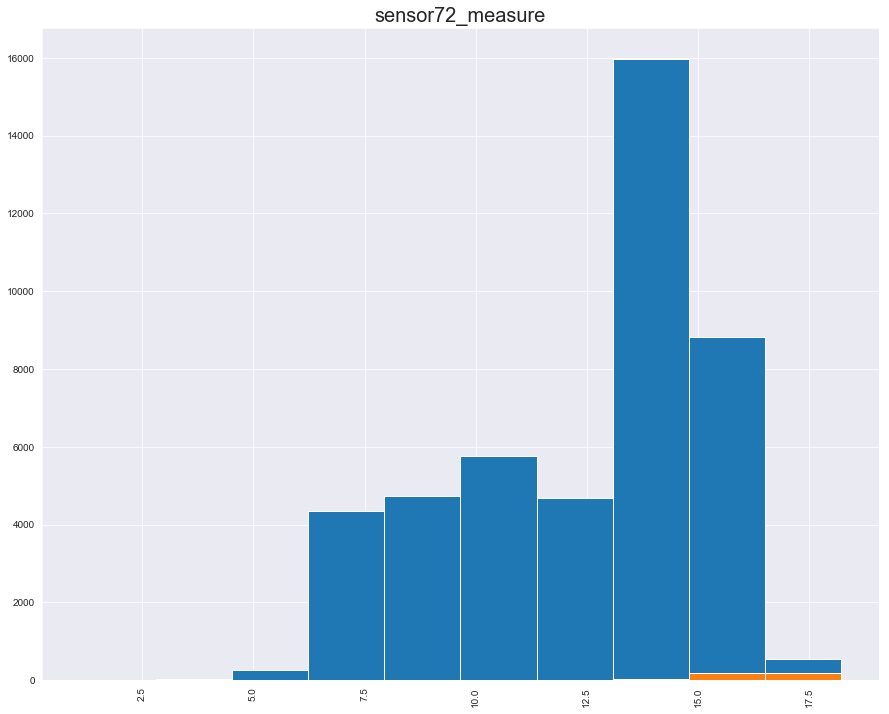

Missing 23.060222891804056%, Zero 0%
count   44554.000
mean        9.774
std         3.252
min         1.099
25%         8.002
50%        10.776
75%        11.822
max        17.602
Name: sensor73_measure, dtype: float64


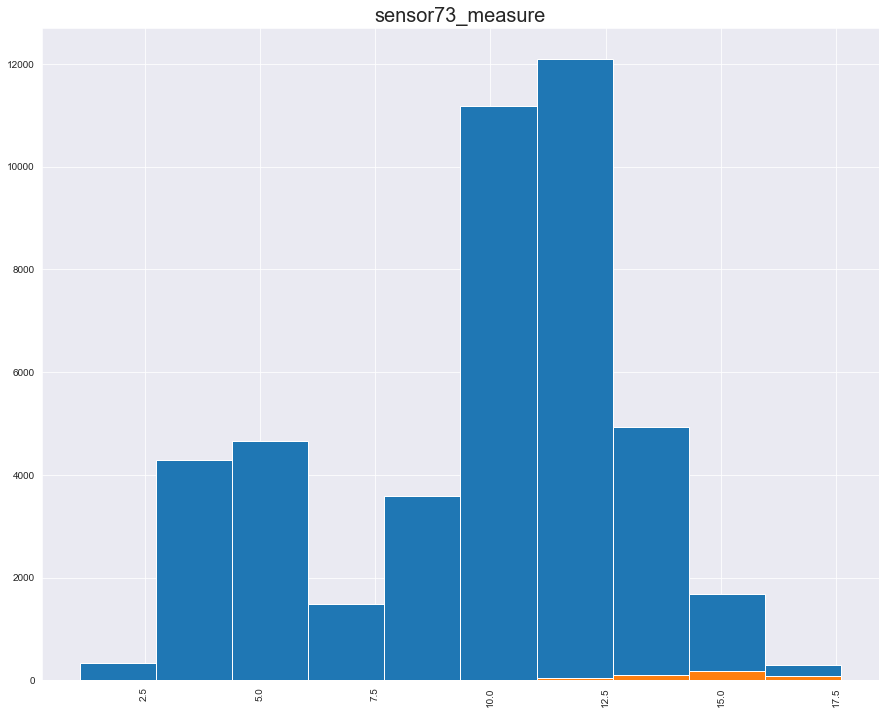

Missing 23.060222891804056%, Zero 0%
count   6683.000
mean       4.291
std        1.619
min        1.099
25%        3.367
50%        4.007
75%        4.691
max       13.745
Name: sensor74_measure, dtype: float64


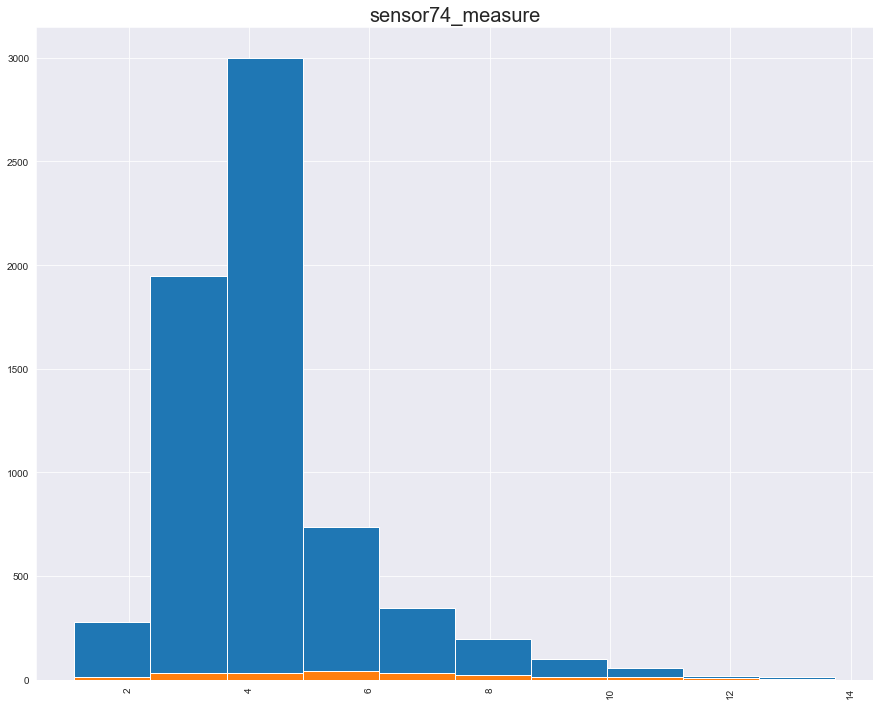

Missing 23.060222891804056%, Zero 0%
count   37078.000
mean        6.620
std         3.183
min         1.099
25%         3.892
50%         6.741
75%         9.353
max        16.768
Name: sensor75_measure, dtype: float64


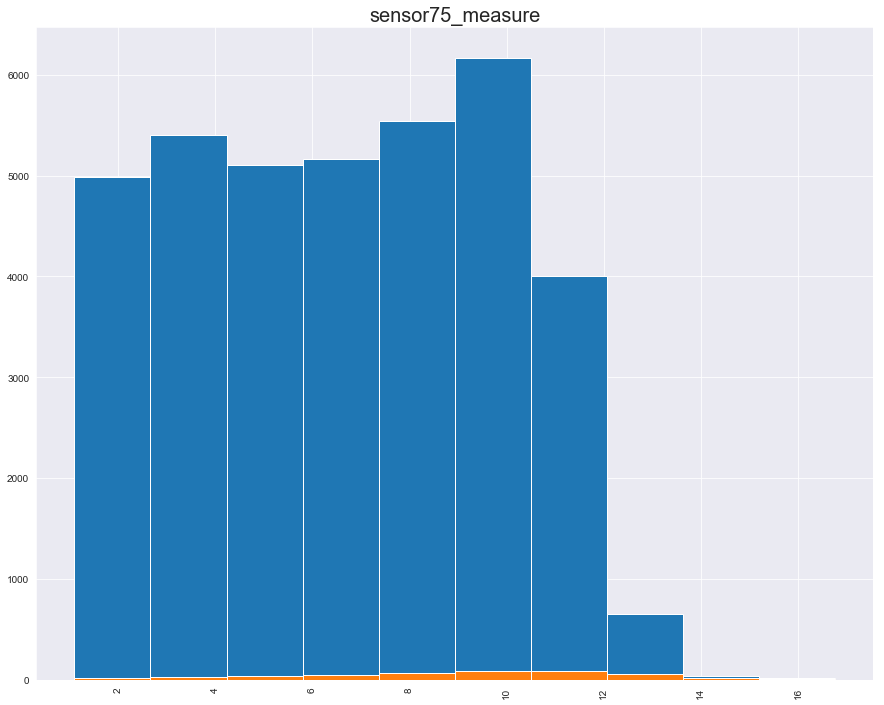

Missing 23.060222891804056%, Zero 99.10659070275392%
count   547.000
mean      5.235
std       1.565
min       1.099
25%       4.317
50%       5.187
75%       6.224
max       9.953
Name: sensor76_measure, dtype: float64


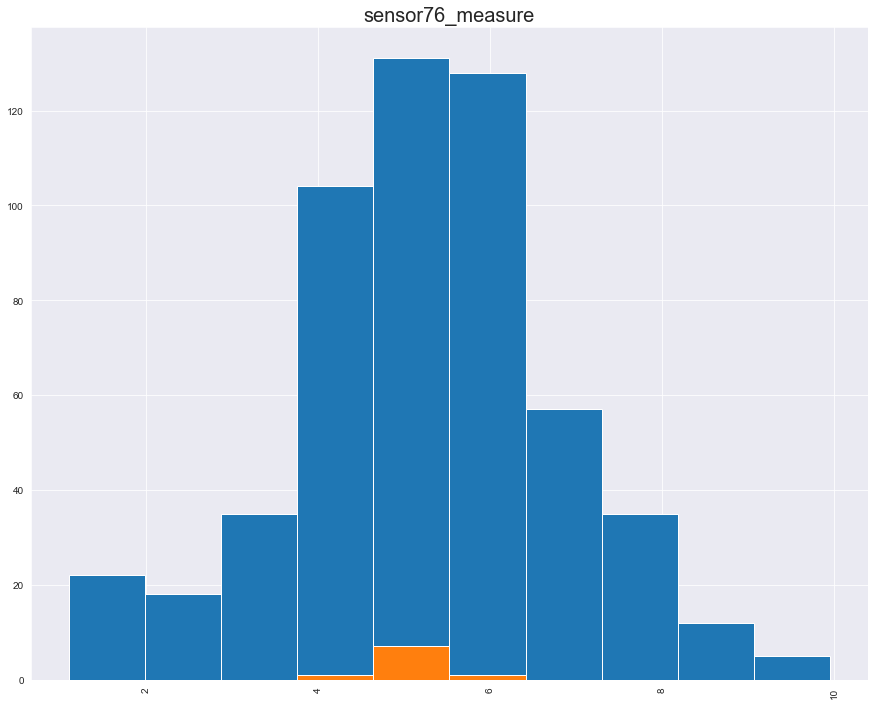

Missing 23.060222891804056%, Zero 0%
count   18477.000
mean        3.231
std         0.685
min         1.099
25%         2.708
50%         3.219
75%         3.714
max         9.173
Name: sensor77_measure, dtype: float64


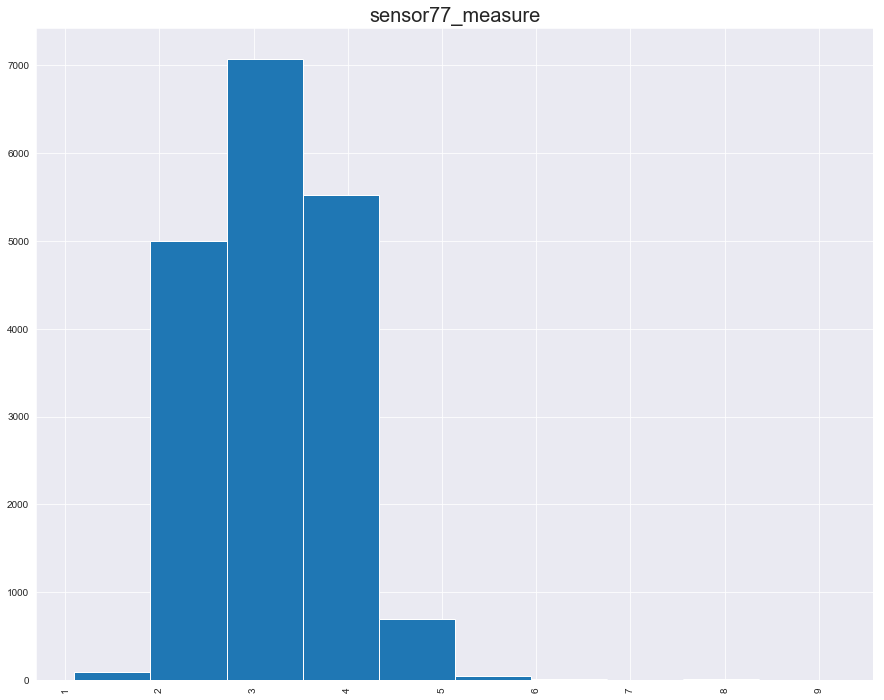

Missing 23.060222891804056%, Zero 0%
count   45163.000
mean       12.707
std         2.818
min         1.099
25%        10.506
50%        14.401
75%        14.800
max        18.609
Name: sensor78_measure, dtype: float64


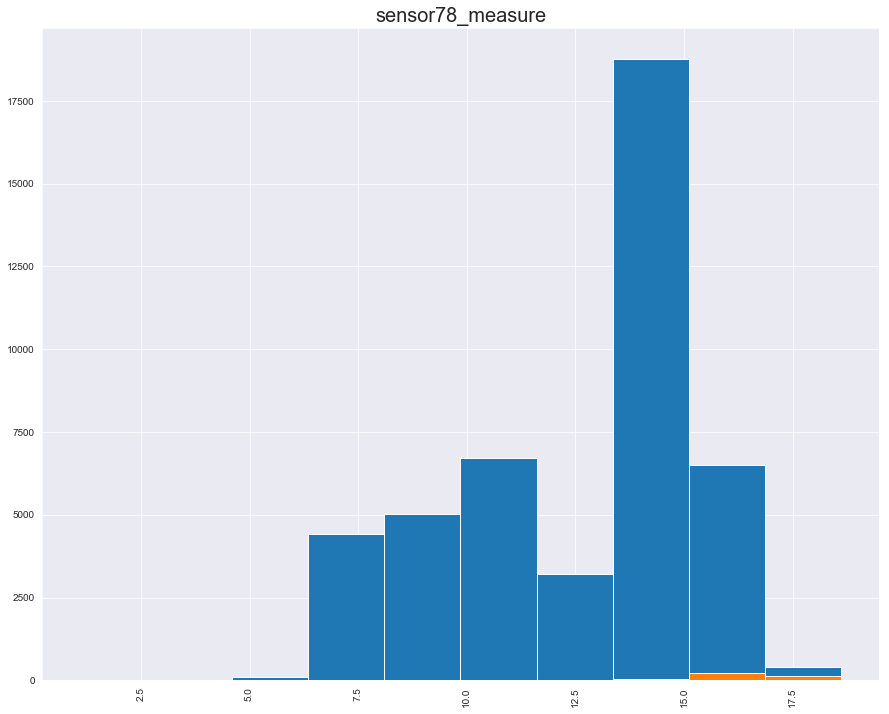

Missing 0%, Zero 0%
count   56631.000
mean        6.634
std         1.827
min         1.099
25%         4.949
50%         7.239
75%         7.905
max        13.006
Name: sensor79_measure, dtype: float64


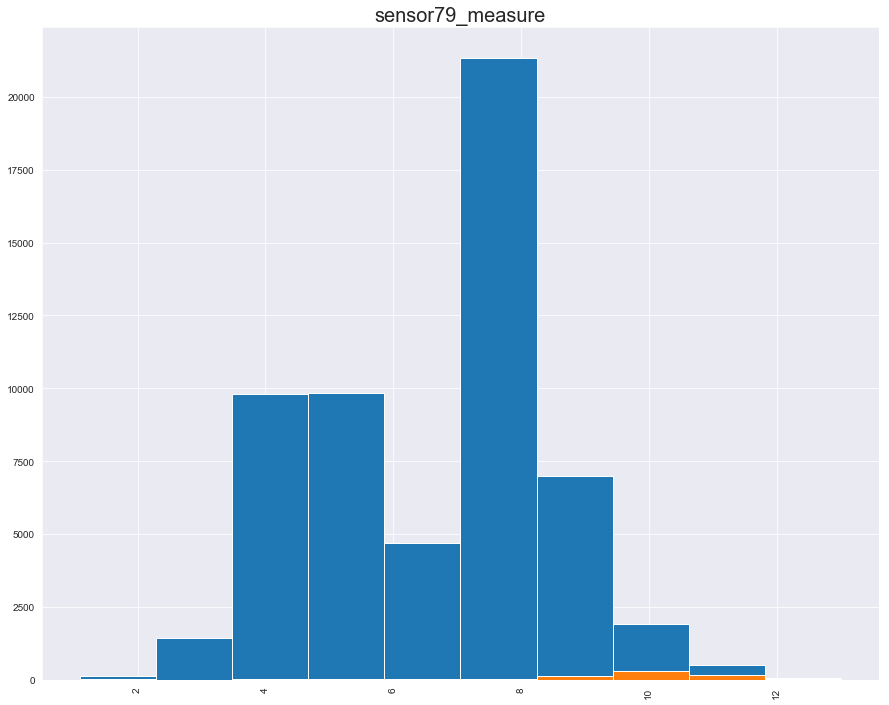

Missing 0%, Zero 99.66053078248972%
count   196.000
mean      7.413
std       3.311
min       1.099
25%       5.120
50%       7.897
75%       9.763
max      15.032
Name: sensor7_histogram_bin0, dtype: float64


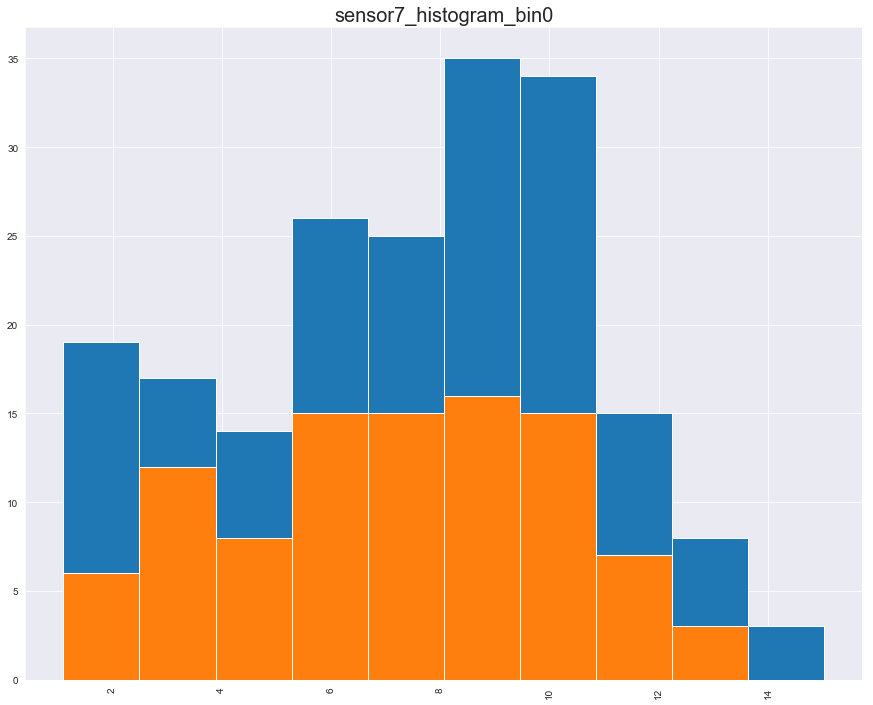

Missing 0%, Zero 98.71317482664702%
count   742.000
mean      8.473
std       2.810
min       1.099
25%       6.635
50%       8.654
75%      10.527
max      15.229
Name: sensor7_histogram_bin1, dtype: float64


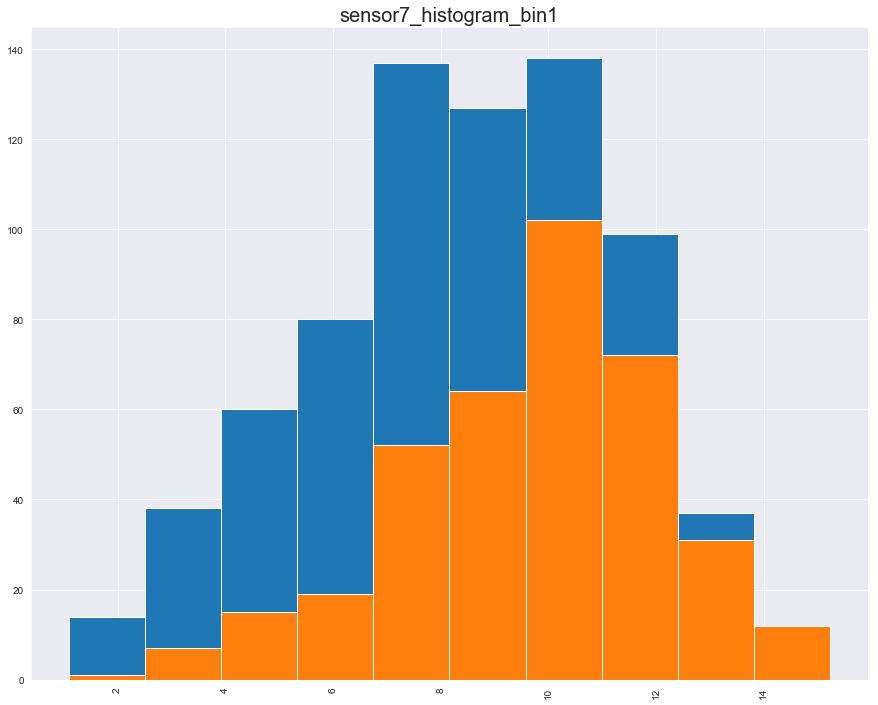

Missing 0%, Zero 0%
count   3148.000
mean       9.064
std        2.693
min        1.099
25%        7.223
50%        9.072
75%       10.827
max       16.172
Name: sensor7_histogram_bin2, dtype: float64


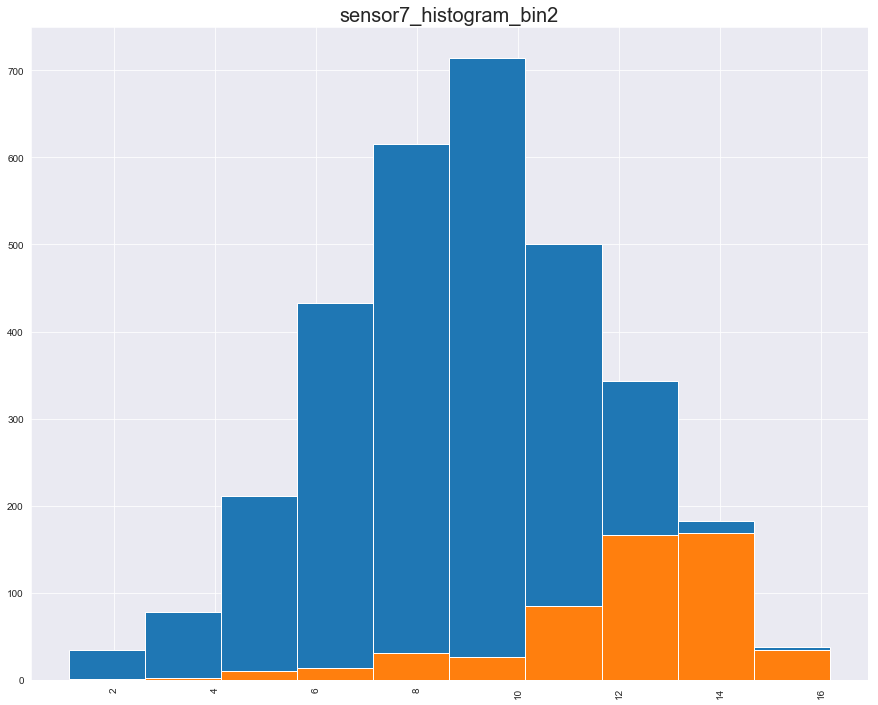

Missing 0%, Zero 0%
count   12435.000
mean        9.429
std         3.041
min         1.099
25%         7.281
50%         9.228
75%        11.594
max        17.965
Name: sensor7_histogram_bin3, dtype: float64


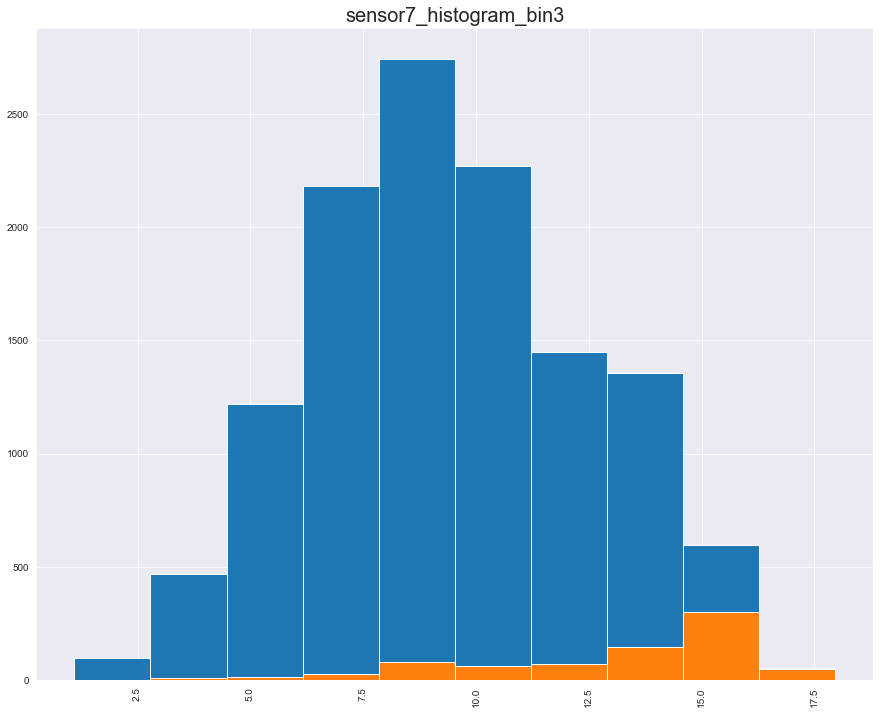

Missing 0%, Zero 0%
count   58024.000
mean        8.535
std         3.285
min         1.099
25%         5.922
50%         8.323
75%        10.863
max        19.248
Name: sensor7_histogram_bin4, dtype: float64


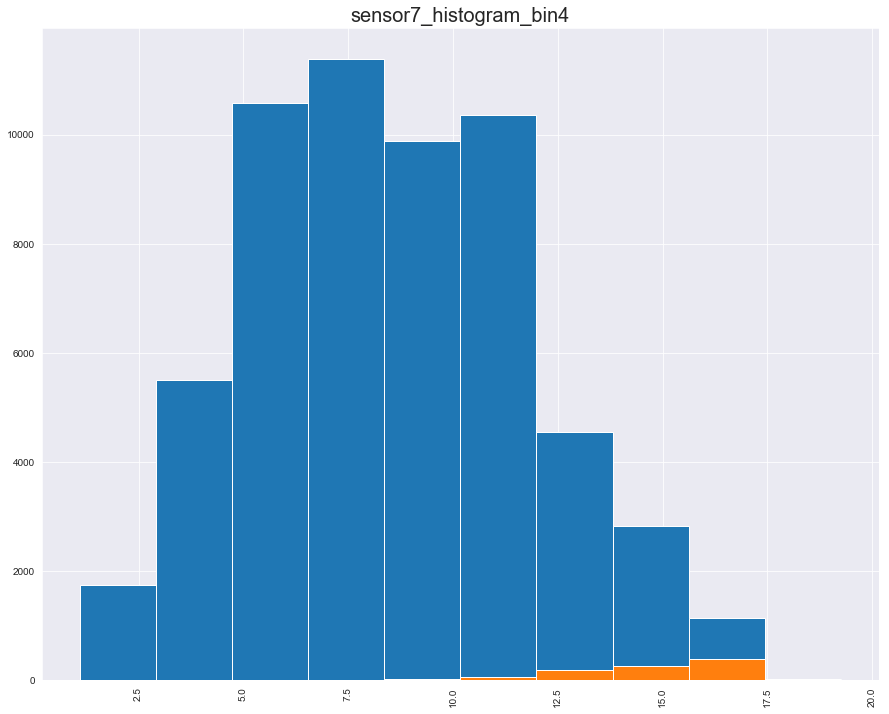

Missing 0%, Zero 0%
count   57388.000
mean       11.762
std         2.567
min         1.099
25%         9.839
50%        12.220
75%        13.768
max        19.004
Name: sensor7_histogram_bin5, dtype: float64


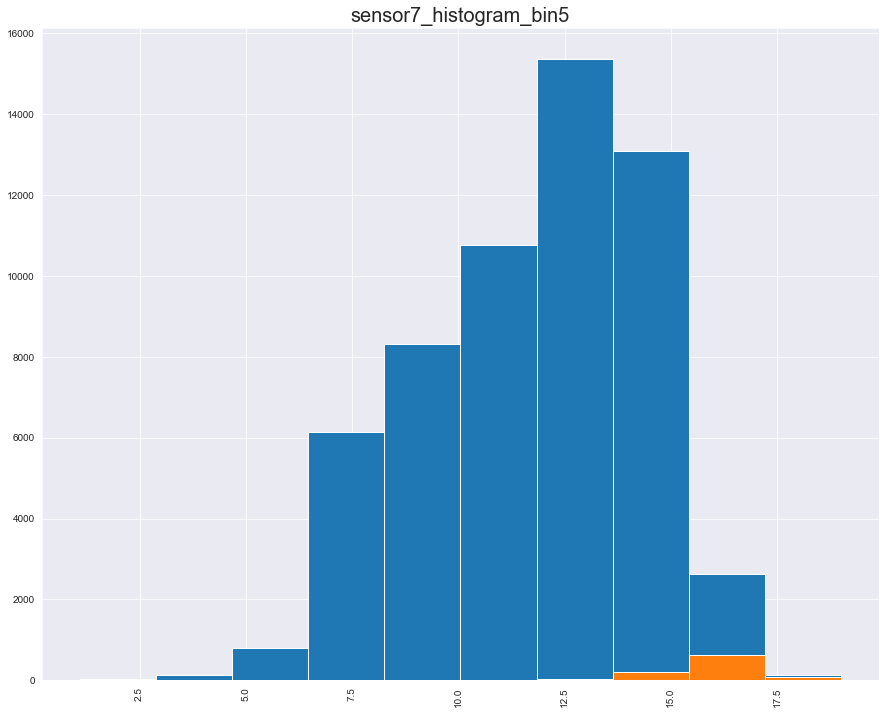

Missing 0%, Zero 0%
count   58091.000
mean       12.255
std         2.860
min         2.398
25%         9.552
50%        13.819
75%        14.462
max        18.359
Name: sensor7_histogram_bin6, dtype: float64


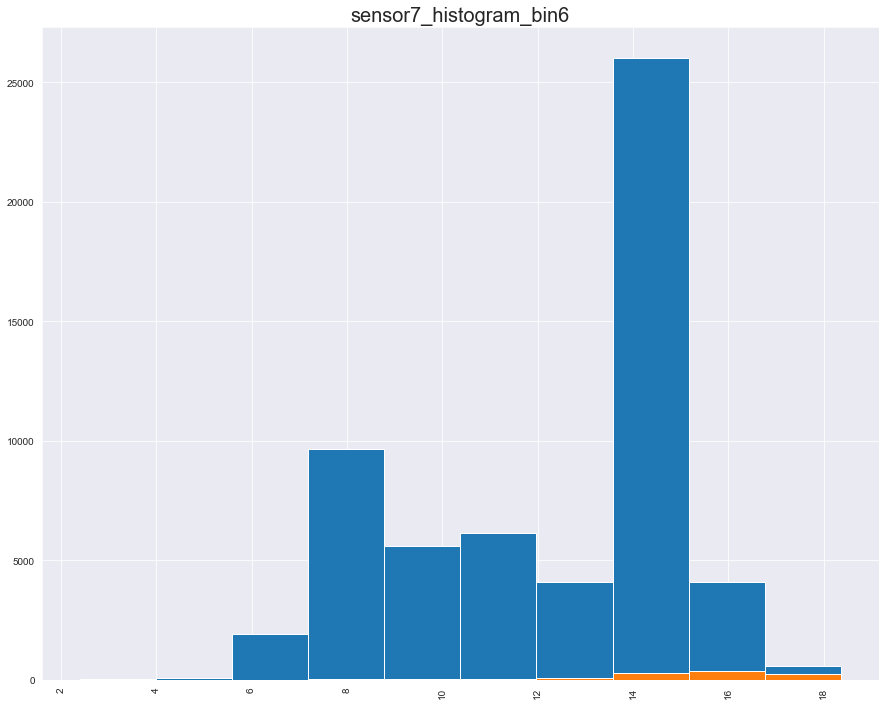

Missing 0%, Zero 0%
count   43454.000
mean       11.864
std         2.576
min         1.099
25%        10.869
50%        12.794
75%        13.528
max        17.964
Name: sensor7_histogram_bin7, dtype: float64


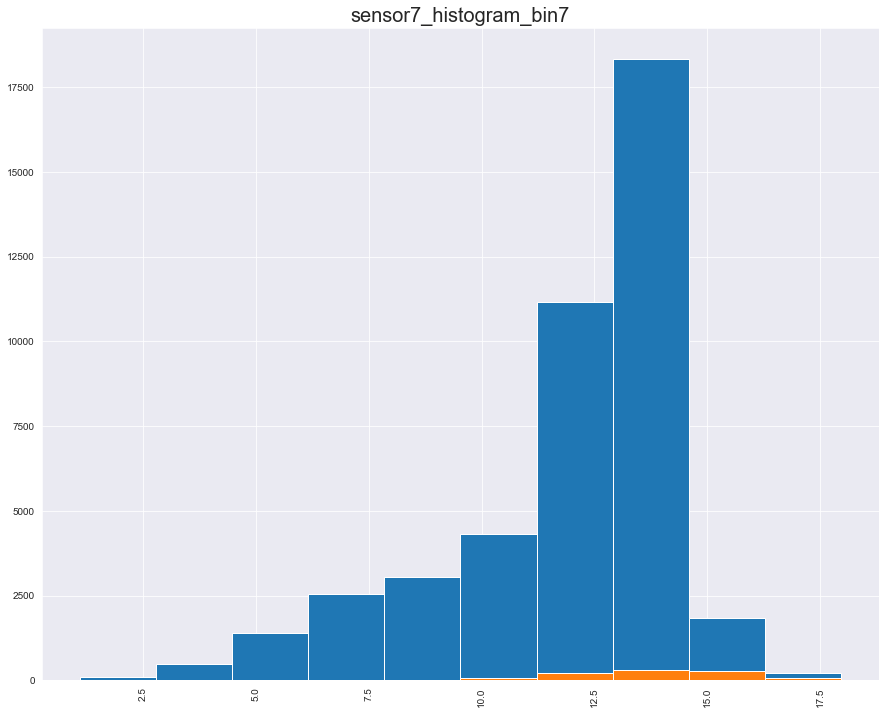

Missing 0%, Zero 0%
count   34238.000
mean        9.581
std         1.933
min         1.099
25%         8.607
50%         9.930
75%        10.850
max        16.689
Name: sensor7_histogram_bin8, dtype: float64


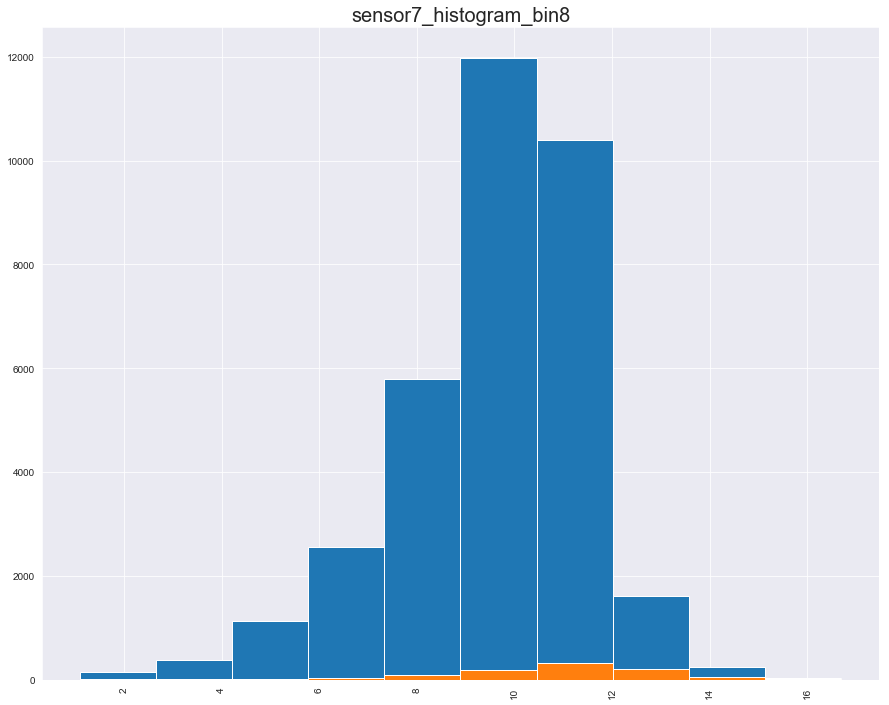

Missing 0%, Zero 0%
count   18631.000
mean        7.299
std         1.914
min         1.099
25%         6.229
50%         7.448
75%         8.515
max        17.042
Name: sensor7_histogram_bin9, dtype: float64


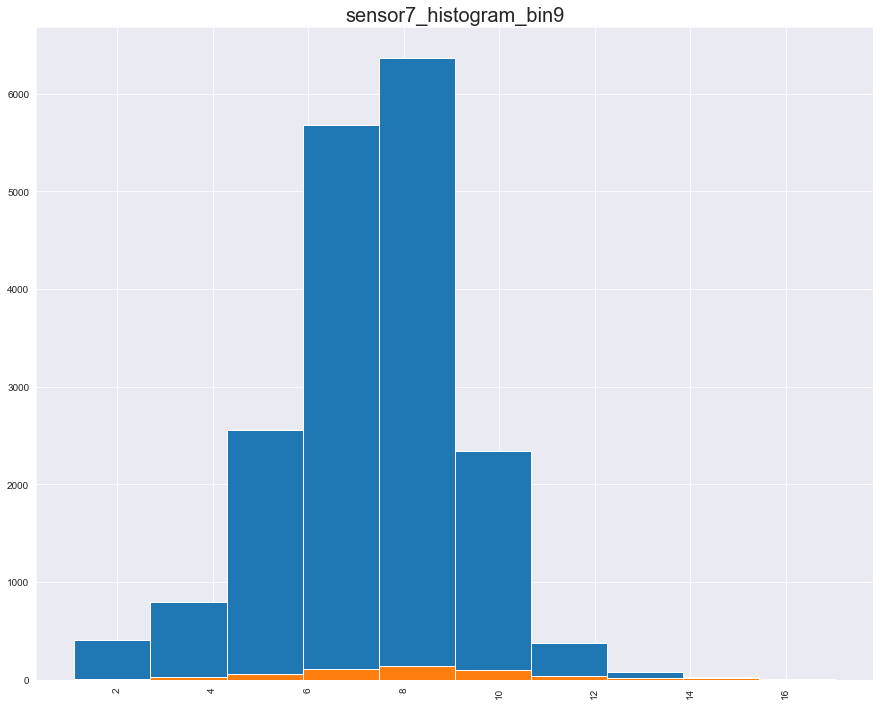

Missing 0%, Zero 0%
count   56416.000
mean        5.059
std         1.117
min         1.099
25%         4.234
50%         4.990
75%         5.707
max        12.079
Name: sensor80_measure, dtype: float64


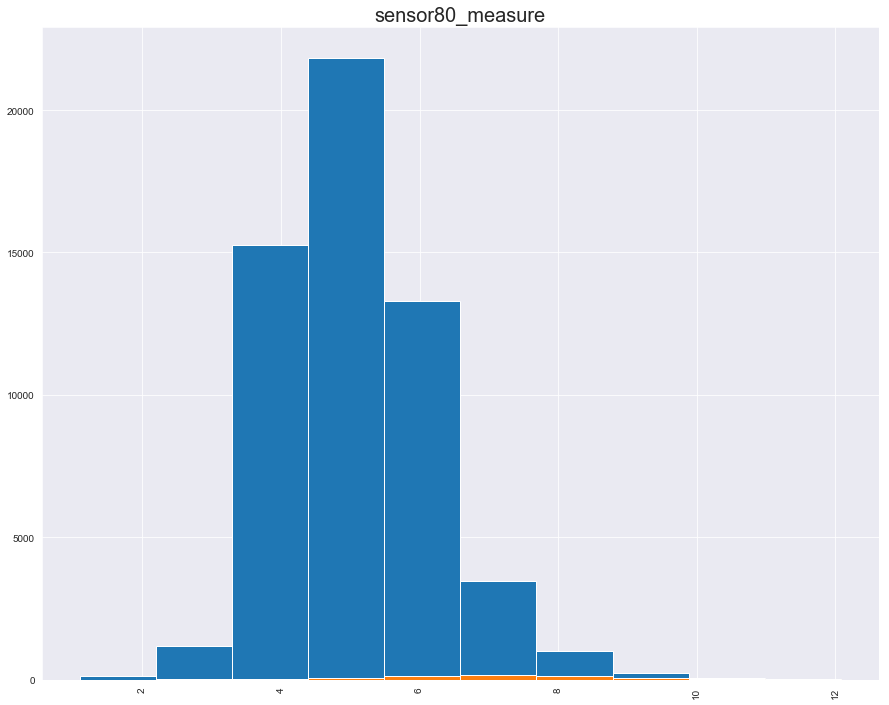

Missing 0%, Zero 98.19344482309444%
count   1062.000
mean       6.781
std        2.907
min        2.398
25%        4.875
50%        6.133
75%        8.032
max       16.889
Name: sensor81_measure, dtype: float64


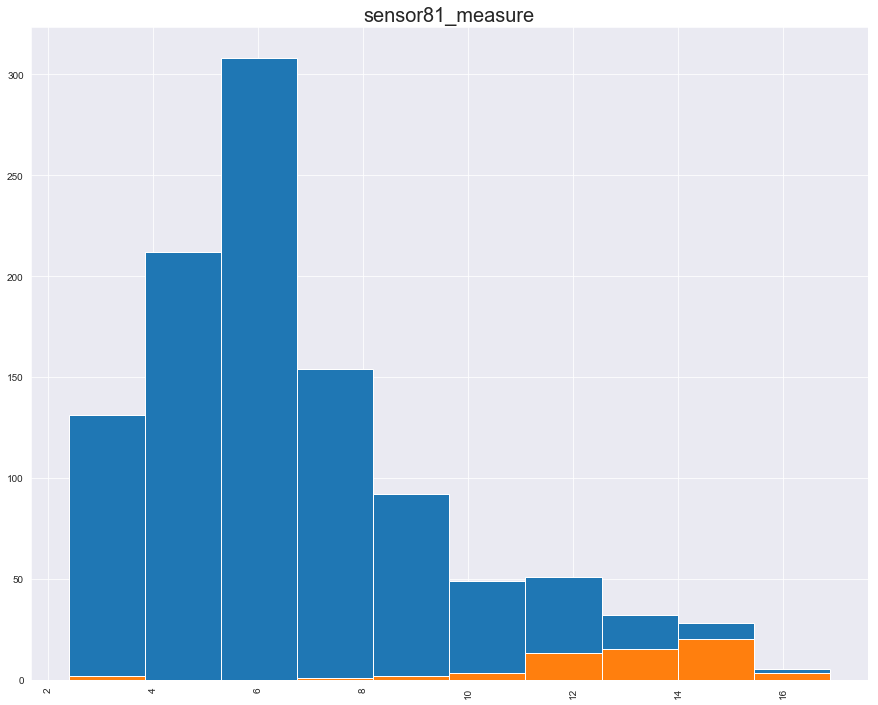

Missing 0%, Zero 97.33819291851424%
count   1568.000
mean       9.193
std        2.442
min        1.099
25%        8.445
50%        9.391
75%       10.263
max       17.114
Name: sensor82_measure, dtype: float64


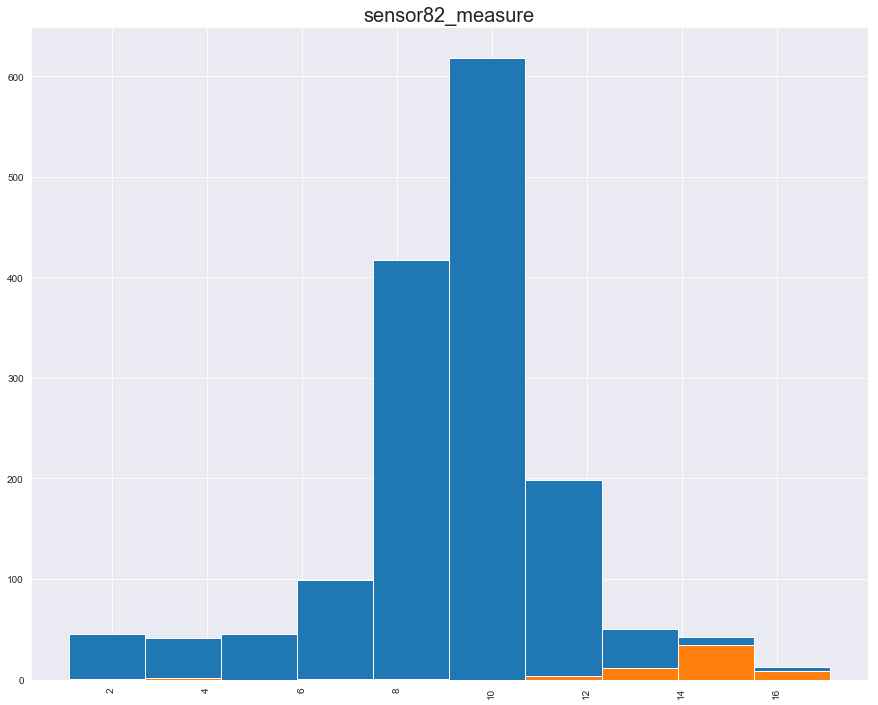

Missing 0%, Zero 0%
count   6984.000
mean       5.575
std        2.350
min        2.398
25%        3.714
50%        5.081
75%        6.979
max       18.641
Name: sensor83_measure, dtype: float64


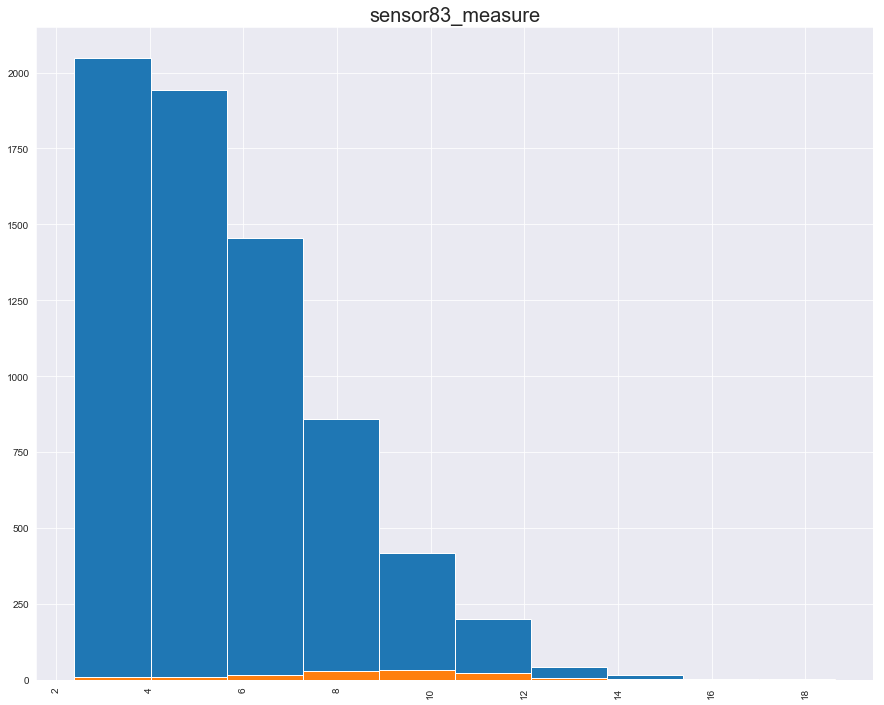

Missing 0%, Zero 0%
count   10347.000
mean        8.203
std         3.667
min         1.099
25%         5.037
50%         9.058
75%        10.925
max        16.950
Name: sensor84_measure, dtype: float64


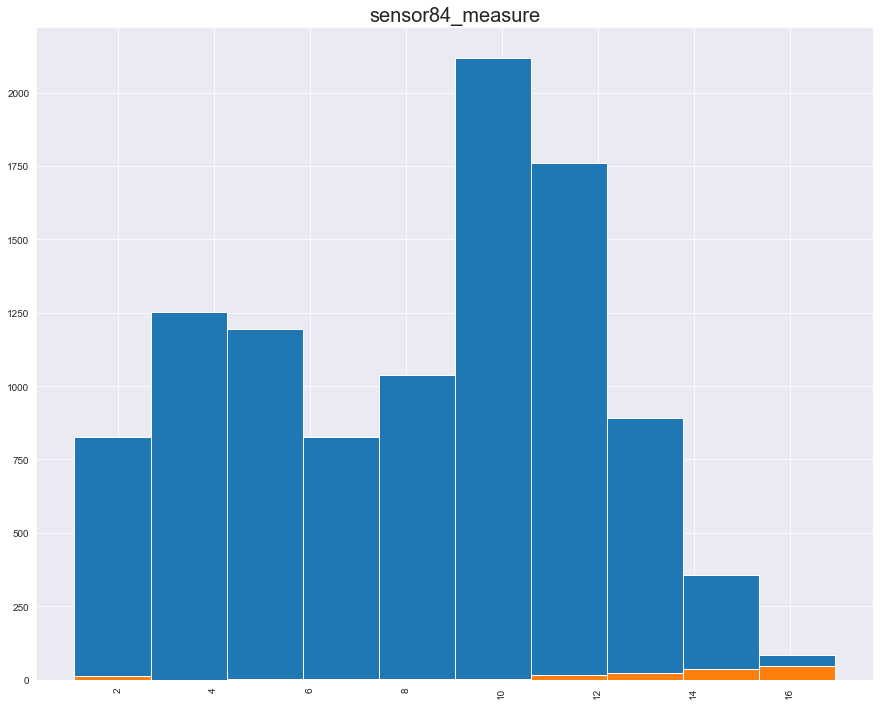

Missing 0%, Zero 99.67237273193774%
count   197.000
mean      5.211
std       2.253
min       2.398
25%       3.714
50%       4.710
75%       5.832
max      13.496
Name: sensor85_measure, dtype: float64


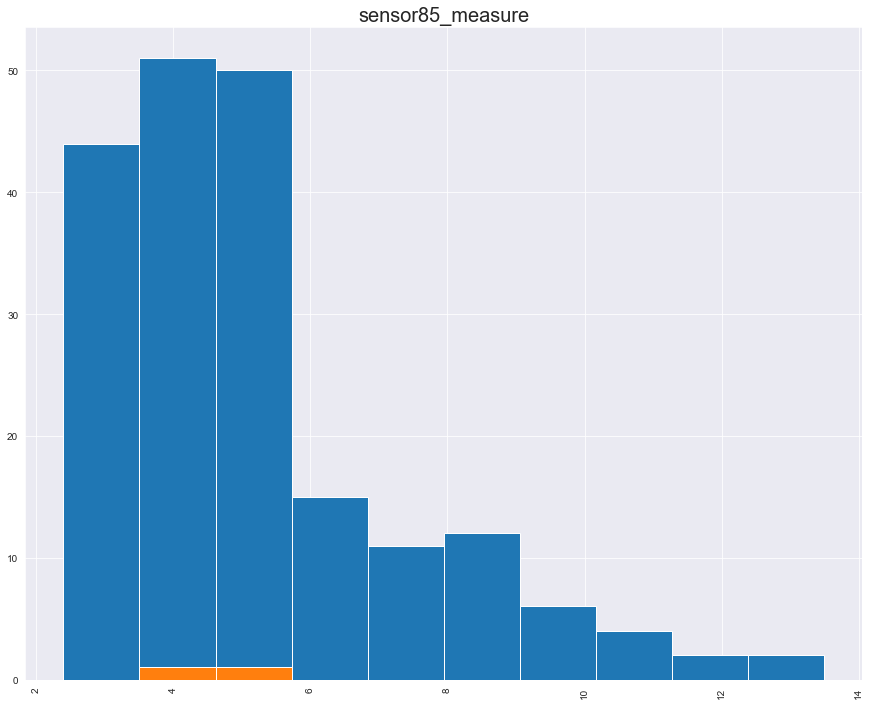

Missing 0%, Zero 99.47105959132116%
count   318.000
mean      8.471
std       3.940
min       1.099
25%       5.485
50%       8.471
75%      11.657
max      15.517
Name: sensor86_measure, dtype: float64


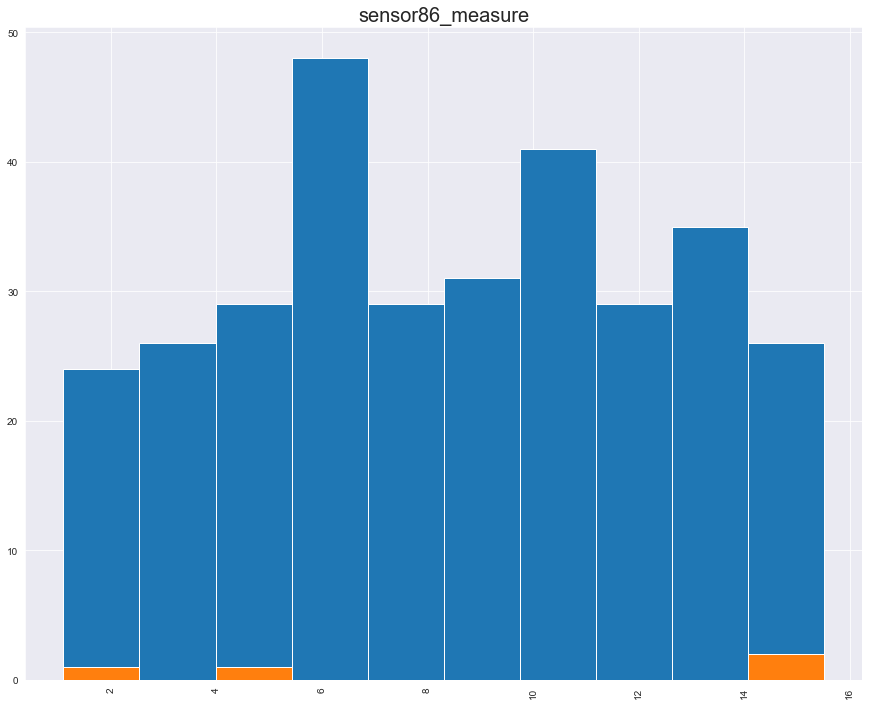

Missing 0%, Zero 99.62368916198471%
count   223.000
mean     10.910
std       4.555
min       2.398
25%       7.238
50%      10.151
75%      15.463
max      18.459
Name: sensor87_measure, dtype: float64


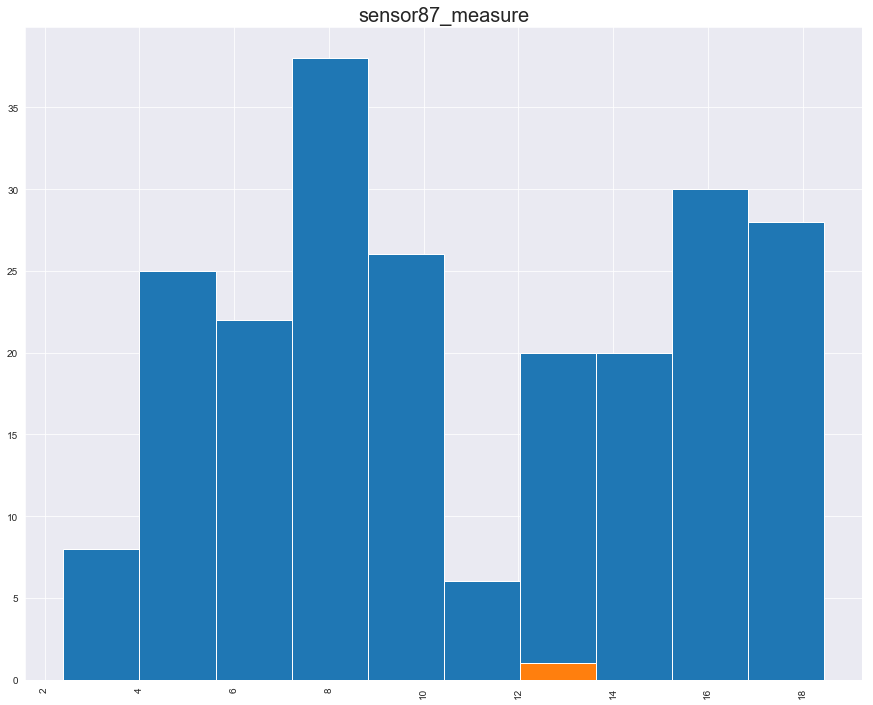

Missing 0%, Zero 99.56974250338811%
count   257.000
mean     10.750
std       3.941
min       1.609
25%       8.392
50%      11.381
75%      14.272
max      16.981
Name: sensor88_measure, dtype: float64


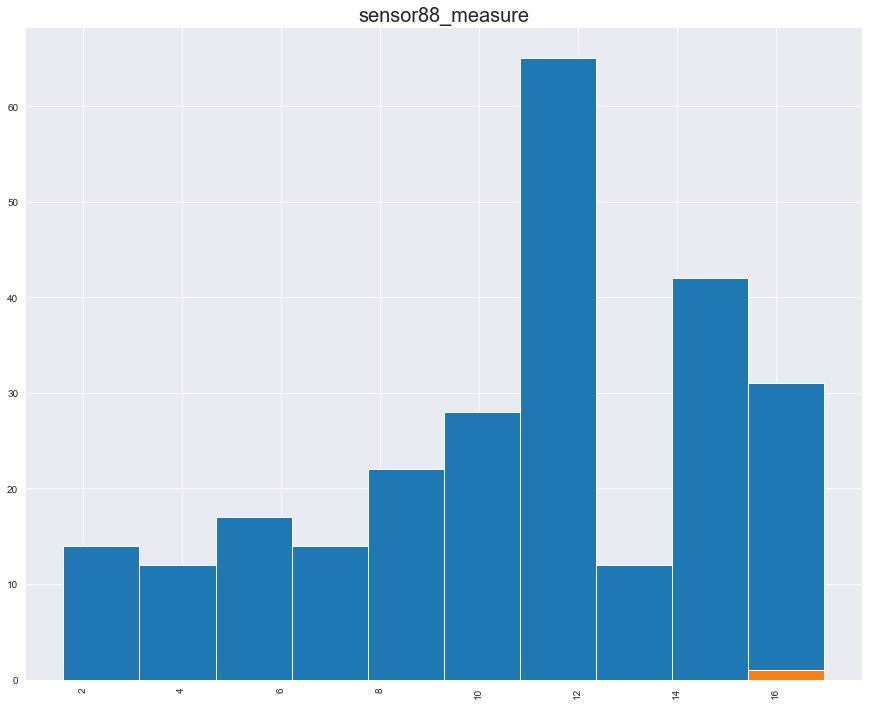

Missing 0%, Zero 0%
count   59202.000
mean        8.617
std         2.245
min         1.099
25%         6.500
50%         9.573
75%        10.217
max        14.889
Name: sensor89_measure, dtype: float64


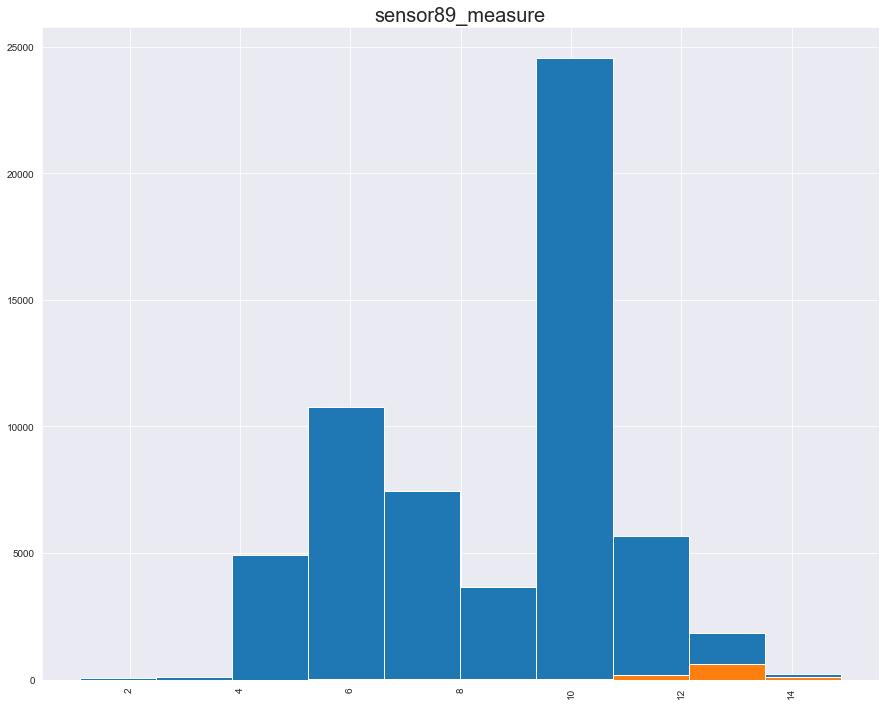

Missing 0%, Zero 0%
count   59222.000
mean       12.415
std         2.699
min         1.099
25%        10.316
50%        13.821
75%        14.289
max        18.123
Name: sensor8_measure, dtype: float64


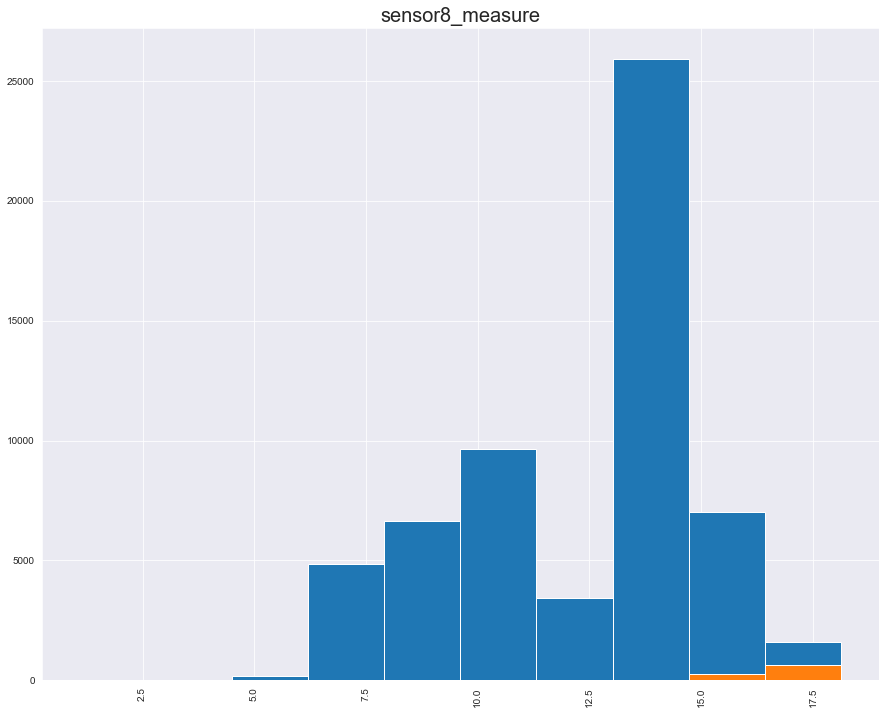

Missing 0%, Zero 0%
count   43989.000
mean        8.977
std         2.561
min         1.099
25%         7.004
50%        10.143
75%        10.700
max        14.444
Name: sensor90_measure, dtype: float64


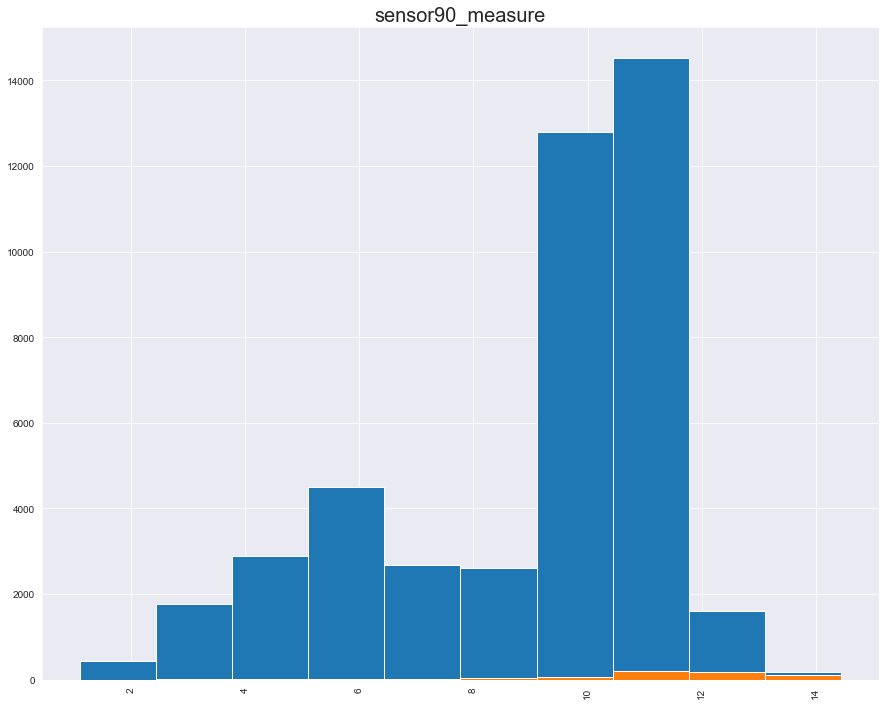

Missing 0%, Zero 0%
count   44524.000
mean        7.537
std         2.561
min         1.099
25%         5.707
50%         8.632
75%         9.257
max        12.760
Name: sensor91_measure, dtype: float64


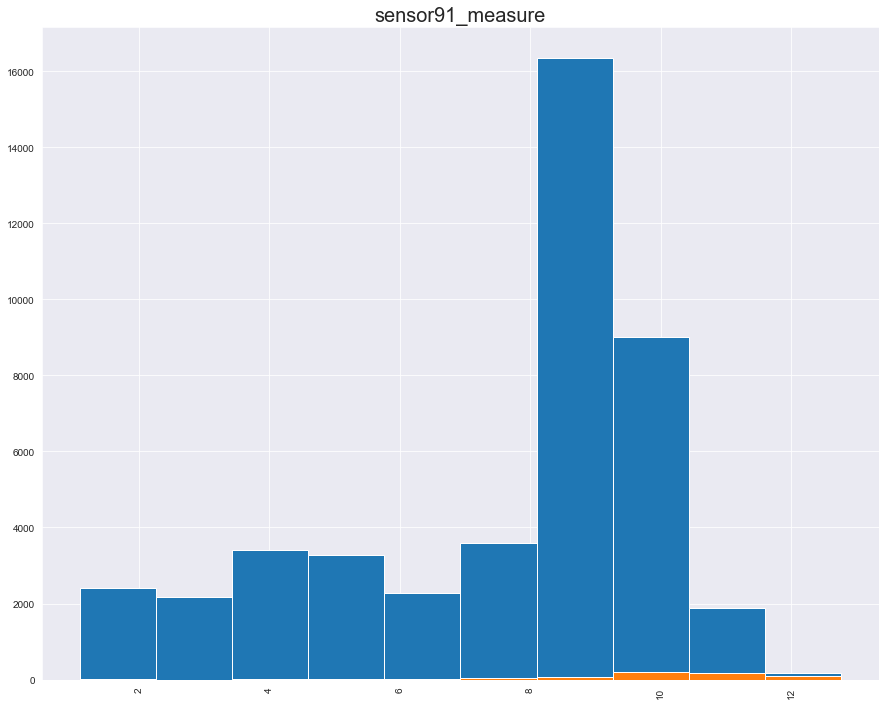

Missing 0%, Zero 0%
count   12870.000
mean       10.740
std         4.304
min         1.946
25%         7.138
50%         9.668
75%        15.141
max        22.572
Name: sensor92_measure, dtype: float64


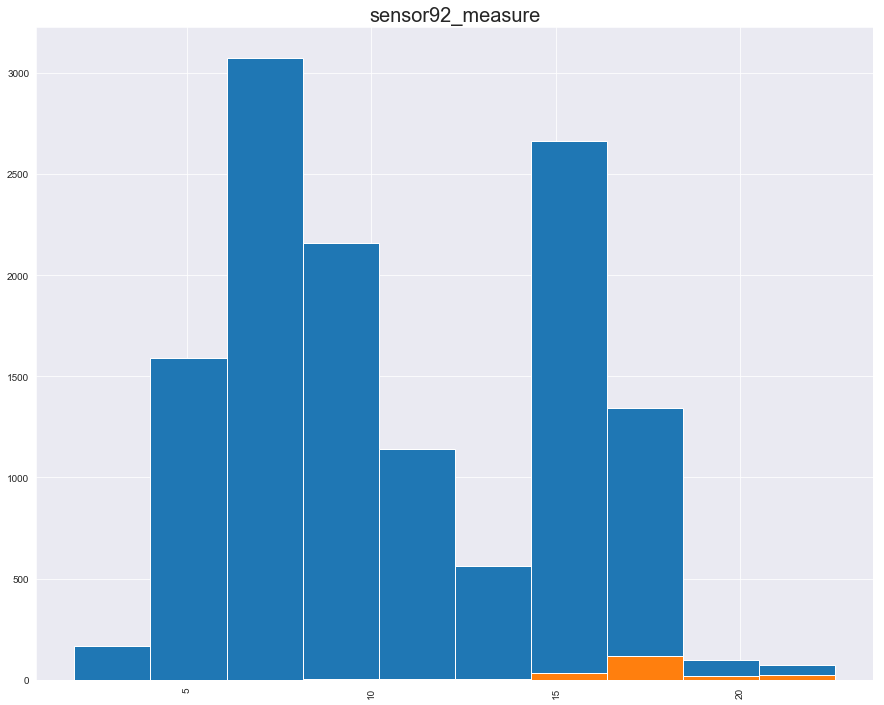

Missing 0%, Zero 0%
count   13007.000
mean        9.170
std         3.907
min         1.099
25%         5.814
50%         8.157
75%        13.192
max        17.730
Name: sensor93_measure, dtype: float64


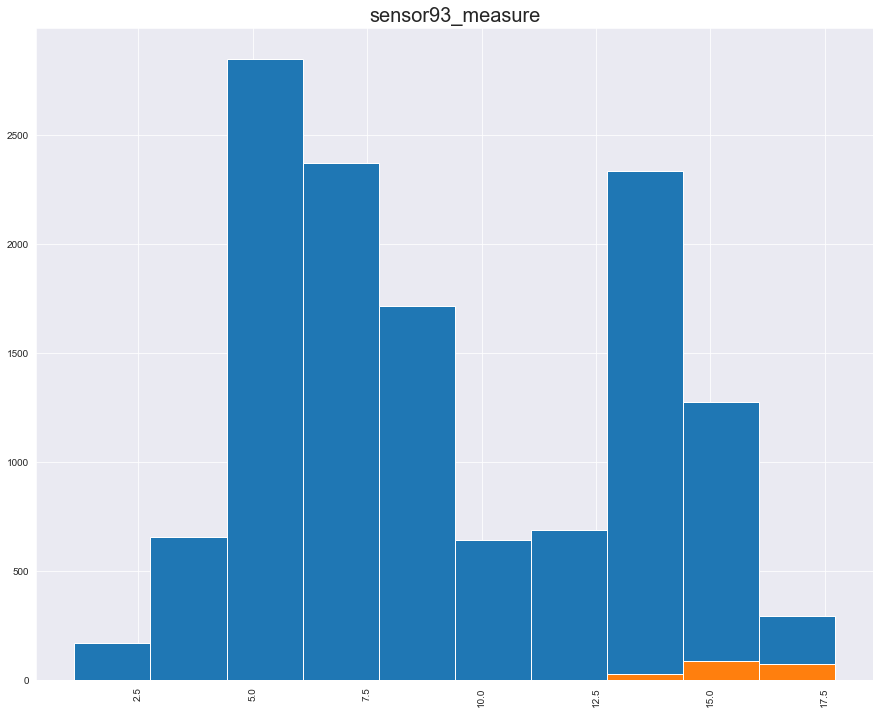

Missing 0%, Zero 0%
count   54611.000
mean        9.330
std         2.937
min         1.099
25%         6.932
50%        10.892
75%        11.537
max        15.419
Name: sensor94_measure, dtype: float64


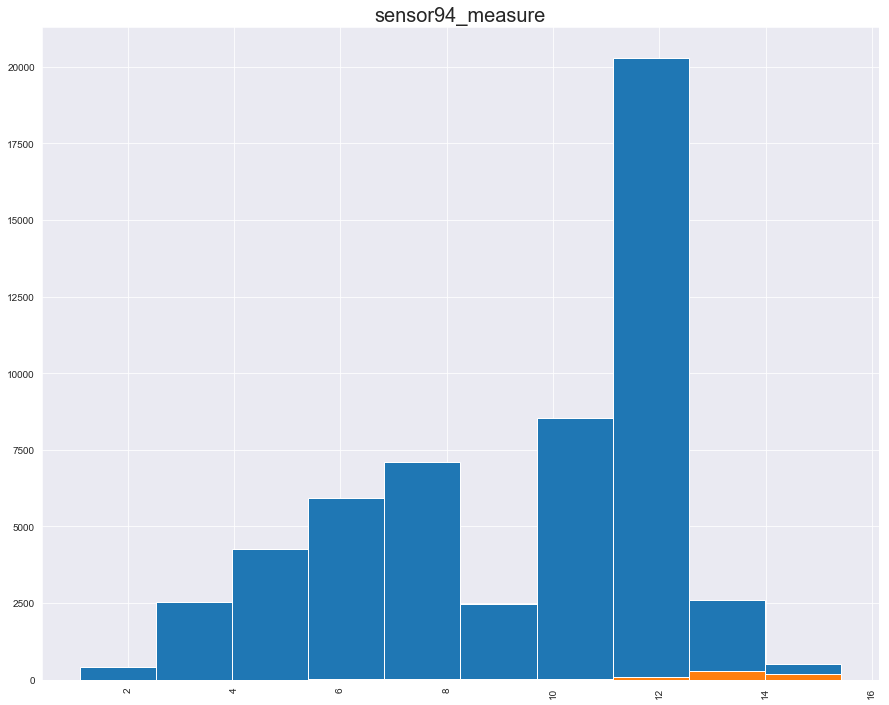

Missing 0%, Zero 0%
count   54722.000
mean        7.726
std         2.730
min         1.099
25%         5.361
50%         9.137
75%         9.808
max        13.395
Name: sensor95_measure, dtype: float64


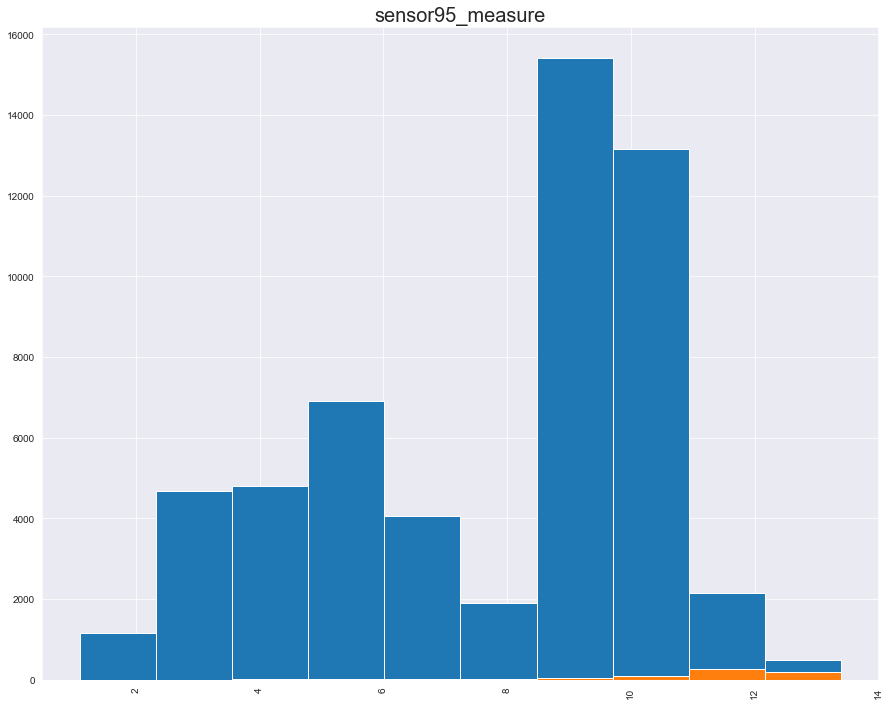

Missing 0%, Zero 0%
count   53994.000
mean       12.073
std         3.472
min         3.045
25%         9.190
50%        12.436
75%        15.181
max        19.947
Name: sensor96_measure, dtype: float64


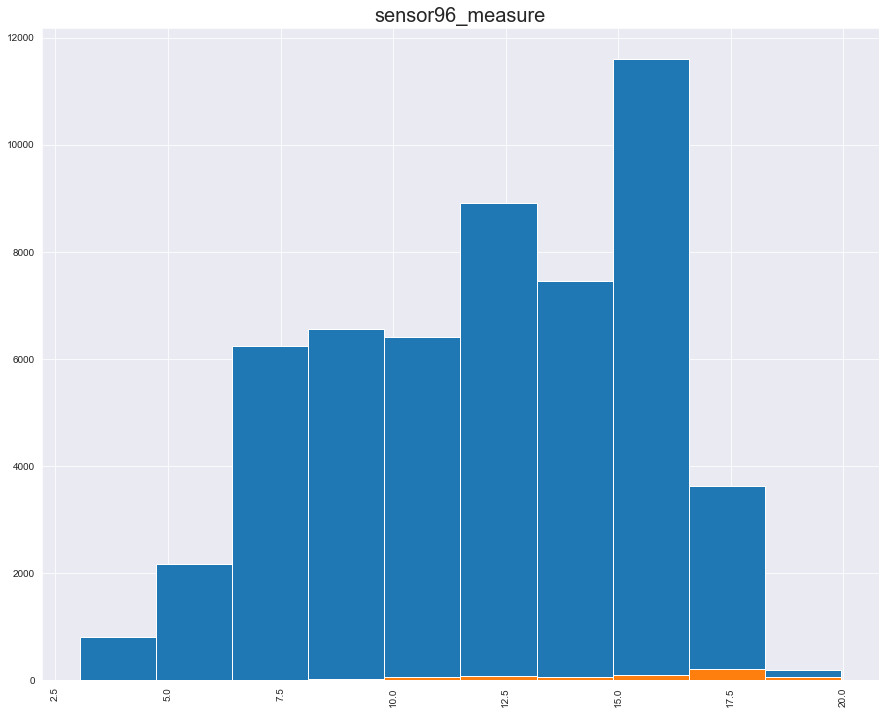

Missing 0%, Zero 0%
count   53996.000
mean       10.173
std         3.482
min         1.099
25%         7.239
50%        10.626
75%        13.290
max        18.660
Name: sensor97_measure, dtype: float64


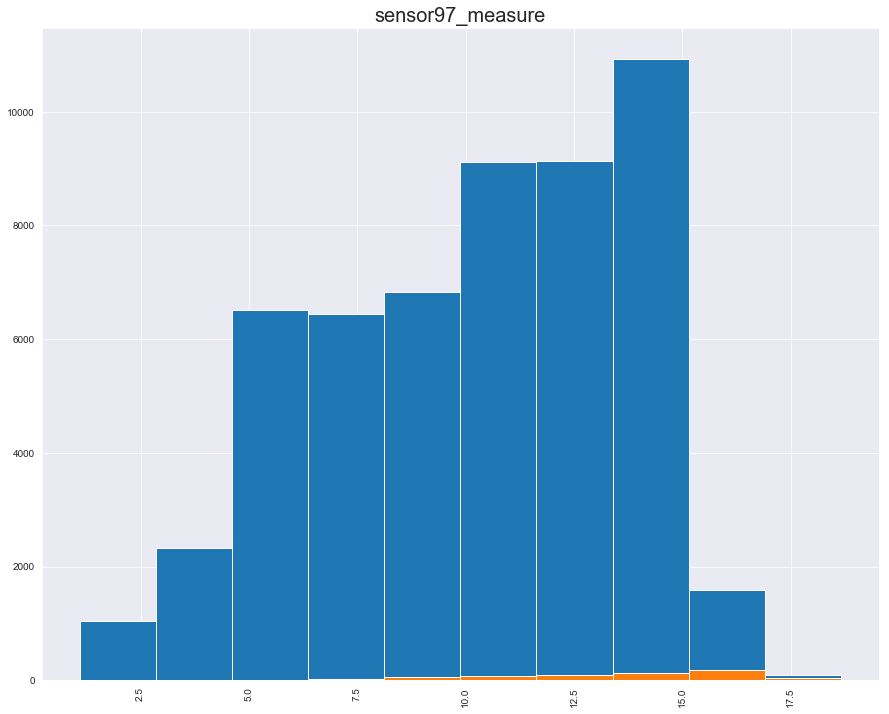

Missing 0%, Zero 0%
count   17719.000
mean       11.619
std         3.375
min         1.099
25%         9.427
50%        11.410
75%        14.612
max        18.554
Name: sensor98_measure, dtype: float64


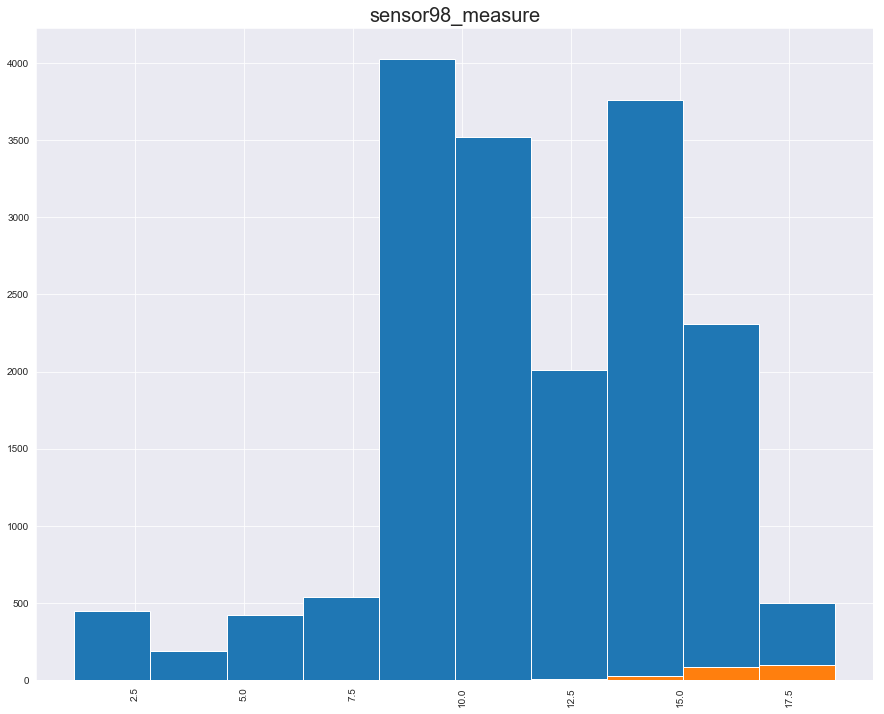

Missing 0%, Zero 0%
count   21007.000
mean        6.054
std         3.216
min         1.099
25%         3.135
50%         5.333
75%         8.926
max        15.149
Name: sensor99_measure, dtype: float64


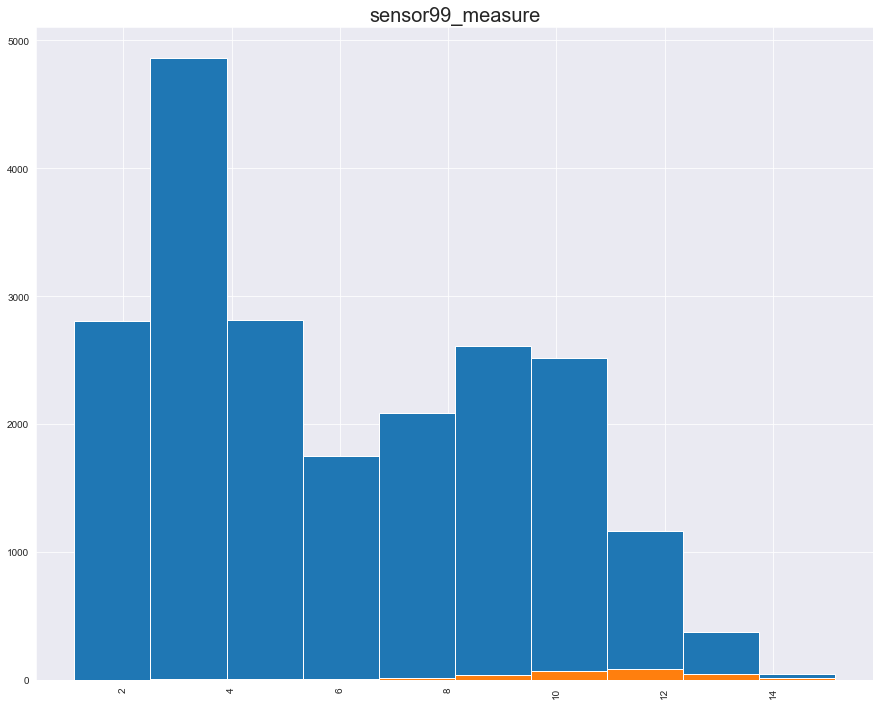

Missing 0%, Zero 0%
count   5783.000
mean       9.261
std        1.792
min        2.944
25%        7.938
50%        9.005
75%       10.282
max       16.620
Name: sensor9_measure, dtype: float64


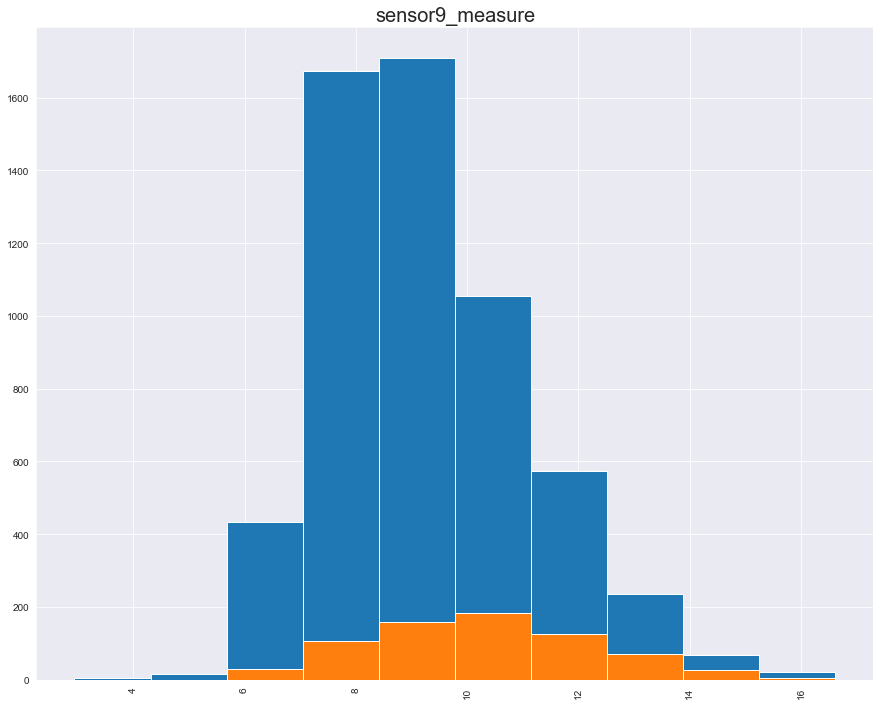

In [38]:
for c in numeric_cols:
    f, ax = plt.subplots(figsize=(15, 12))
    plt.xticks(rotation='90')
    data = df_training_full[c].replace({0:np.nan}).dropna()
    plt.hist(data)
    plt.hist(df_training_full[df_training_full['target'] == 1][c].replace({0:np.nan}).dropna(), range=(min(data), max(data)))
    plt.title(c, fontsize=20)
    value = 0
    value2 = 0
    try:
        value = missing_data.loc[c,"Missing Ratio"]
    except KeyError:
        value = 0
    try:
        value2 = zero_data.loc[c, "Zero Density"]
    except KeyError:
        value2 = 0
    print("Missing %s%%, Zero %s%%\n%s" % (value,value2,data.describe()))
    plt.show()

In [16]:
# much better. now that our data makes sense, lets actually do a thing on it
#

from sklearn.model_selection import train_test_split

# temp

#
from IPython.display import display

# temp

if "target" in numeric_cols:
    numeric_cols.remove("target") #no answers kek
if "id" in numeric_cols:
    numeric_cols.remove("id")
    
# replace na with mean value of column
all_data[numeric_cols] = all_data[numeric_cols].fillna(all_data[numeric_cols].mean())
# normalize data
all_data[numeric_cols] = all_data[numeric_cols]/all_data[numeric_cols].max()


train=all_data[all_data['Type']=="Train"]
test=all_data[all_data['Type']=="Test"]
X = train[numeric_cols].values
y = train["target"].values



training_set, validation_set, training_sols, validation_sols = train_test_split(X, y, test_size=0.30, random_state=42)


display(train[numeric_cols])

sensor100_measure  sensor101_measure  sensor102_measure  \
0                  0.000              0.000              0.001   
1                  0.000              0.000              0.001   
2                  0.000              0.000              0.000   
3                  0.000              0.000              0.000   
4                  0.000              0.000              0.005   
5                  0.000              0.000              0.000   
6                  0.000              0.000              0.000   
7                  0.000              0.000              0.001   
8                  0.000              0.000              0.000   
9                  0.000              0.000              0.000   
10                 0.000              0.000              0.002   
11                 0.000              0.000              0.000   
12                 0.000              0.000              0.000   
13                 0.000              0.000              0.001   
14                 0.000              0.000              0.000   
15                 0.000              0.000              0.000   
16                 0.000              0.000              0.000   
17                 0.000              0.000              0.000   
18                 0.000              0.000              0.000   
19                 0.000              0.000              0.000   
20                 0.000              0.000              0.000   
21                 0.000              0.000              0.000   
22                 0.000              0.000              0.000   
23                 0.000              0.000              0.096   
24                 0.000              0.000              0.004   
25                 0.000              0.000              0.006   
26                 0.000              0.000              0.000   
27                 0.000              0.000              0.010   
28                 0.000              0.000              0.002   
29                 0.000              0.000              0.003   
...                  ...                ...                ...   
59970              0.000              0.000              0.000   
59971              0.000              0.000              0.000   
59972              0.000              0.000              0.000   
59973              0.000              0.000              0.000   
59974              0.000              0.000              0.008   
59975              0.000              0.000              0.000   
59976              0.000              0.000              0.000   
59977              0.000              0.000              0.007   
59978              0.000              0.000              0.000   
59979              0.000              0.000              0.000   
59980              0.000              0.000              0.000   
59981              0.000              0.000              0.000   
59982              0.000              0.000              0.002   
59983              0.000              0.000              0.008   
59984              0.000              0.000              0.001   
59985              0.000              0.000              0.000   
59986              0.000              0.000              0.000   
59987              0.000              0.000              0.000   
59988              0.000              0.000              0.001   
59989              0.000              0.000              0.001   
59990              0.000              0.000              0.001   
59991              0.000              0.000              0.000   
59992              0.000              0.000              0.000   
59993              0.000              0.000              0.000   
59994              0.000              0.000              0.000   
59995              0.000              0.000              0.018   
59996              0.000              0.000              0.000   
59997              0.000              0.000              0.000   
59998              0.000              0.000    

helper function to round and calculate false positive, true positive, false negative, true negative

In [17]:
def rn(n, cutoff=0.5):
    if n > cutoff:
        return 1
    else:
        return 0

def calc_stats(Vx, Vy, cutoff=0.5):
    """
    Vx: predictions
    Vy: actual
    """
    assert len(Vx) == len(Vy), "length mismatch: %s/%s" % (len(Vx), len(Vy))
    cp=0;cn=0;fp=0;fn=0
    for i in range(len(Vx)):
        if rn(Vx[i], cutoff=cutoff) == 1 and rn(Vy[i], cutoff=cutoff) == 1:
            cp+=1
        elif rn(Vx[i], cutoff=cutoff) == 0 and rn(Vy[i], cutoff=cutoff) == 0:
            cn+=1
        elif rn(Vx[i], cutoff=cutoff) == 1 and rn(Vy[i], cutoff=cutoff) == 0:
            fp+=1
        elif rn(Vx[i], cutoff=cutoff) == 0 and rn(Vy[i], cutoff=cutoff) == 1:
            fn+=1
        else:
            raise Exception("wtf")
    return cp, cn, fp, fn

## Random Forest (fail, filtering was removed during debugging)

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=15, verbose=2, n_jobs=16)
rf.fit(training_set, training_sols)

predict_training = rf.predict(training_set)
tp, tn, fp, fn = calc_stats(predict_training, training_sols, cutoff=0.5)
print("Correct positives: %s\nCorrect negatives: %s\nFalse positives: %s\nFalse negatives: %s" % (tp, tn, fp, fn))


predict_validation = rf.predict(validation_set)
tp, tn, fp, fn = calc_stats(predict_validation, validation_sols, cutoff=0.5)
print("Correct positives: %s\nCorrect negatives: %s\nFalse positives: %s\nFalse negatives: %s" % (tp, tn, fp, fn))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

## xgboost (failure, gets 0s)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

my_imputer = Imputer()
training_set = my_imputer.fit_transform(training_set)
validation_set = my_imputer.transform(validation_set)



In [21]:
from xgboost import XGBRegressor

my_model = XGBRegressor()

train_in, feedback_in, train_out, feedback_out = train_test_split(training_set, training_sols, test_size=0.25)

my_model.fit(train_in, train_out, early_stopping_rounds=5, 
             eval_set=[(feedback_in, feedback_out)], verbose=True)

[10:02:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.451747
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:0.408388
[2]	validation_0-rmse:0.369547
[3]	validation_0-rmse:0.33472
[4]	validation_0-rmse:0.303462
[5]	validation_0-rmse:0.275621
[6]	validation_0-rmse:0.250751
[7]	validation_0-rmse:0.228567
[8]	validation_0-rmse:0.208859
[9]	validation_0-rmse:0.191346
[10]	validation_0-rmse:0.175882
[11]	validation_0-rmse:0.162121
[12]	validation_0-rmse:0.15002
[13]	validation_0-rmse:0.13944
[14]	validation_0-rmse:0.130141
[15]	validation_0-rmse:0.122163
[16]	validation_0-rmse:0.115112
[17]	validation_0-rmse:0.109016
[18]	validation_0-rmse:0.10385
[19]	validation_0-rmse:0.099377
[20]	validation_0-rmse:0.095703
[21]	validation_0-rmse:0.092459
[22]	validation_0-rmse:0.08973
[23]	validation_0-rmse:0.087564
[24]	validation_0-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [22]:
# computes statistics for the models
# accuracy is not bad

predictions = my_model.predict(validation_set)
c_set = test[numeric_cols].values
tp, tn, fp, fn=calc_stats(predictions, validation_sols)
print("Correct positives: %s\nCorrect negatives: %s\nFalse positives: %s\nFalse negatives: %s" % (tp, tn, fp, fn))

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, validation_sols)))

Correct positives: 192
Correct negatives: 17662
False positives: 36
False negatives: 110
Mean Absolute Error : 0.014869989681575033


In [25]:
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()
my_model.fit(training_set, training_sols)
predictions = my_model.predict(validation_set)
tp, tn, fp, fn=calc_stats(predictions, validation_sols)
print("Correct positives: %s\nCorrect negatives: %s\nFalse positives: %s\nFalse negatives: %s" % (tp, tn, fp, fn))

Correct positives: 155
Correct negatives: 17671
False positives: 27
False negatives: 147


In [27]:
c_set = test[numeric_cols].values
from IPython.display import display
display(test[numeric_cols])

predicts = my_model.predict(c_set)

for i in range(len(predicts)):
    predicts[i] = rn(predicts[i], cutoff=0.5)

idx=[i for i in range(1,16002)]
df = pd.DataFrame(data={"id": idx,"target":predicts}).to_csv("test3.csv", index=False)
print("total targets predicted: %s" % sum(predicts))

sensor100_measure  sensor101_measure  sensor102_measure  \
0                  0.000              0.000              0.000   
1                  0.000              0.000              0.002   
2                  0.000              0.000              0.002   
3                  0.000              0.000              0.000   
4                  0.000              0.000              0.000   
5                  0.000              0.000              0.000   
6                  0.000              0.000              0.002   
7                  0.000              0.000              0.001   
8                  0.000              0.000              0.000   
9                  0.001              0.004              0.000   
10                 0.000              0.000              0.000   
11                 0.000              0.000              0.002   
12                 0.000              0.000              0.001   
13                 0.000              0.000              0.000   
14                 0.000              0.000              0.000   
15                 0.000              0.000              0.001   
16                 0.000              0.003              0.000   
17                 0.000              0.000              0.002   
18                 0.000              0.000              0.001   
19                 0.000              0.000              0.002   
20                 0.000              0.000              0.000   
21                 0.000              0.000              0.000   
22                 0.000              0.000              0.000   
23                 0.000              0.000              0.000   
24                 0.000              0.000              0.003   
25                 0.000              0.000              0.001   
26                 0.000              0.000              0.002   
27                 0.000              0.000              0.004   
28                 0.000              0.000              0.000   
29                 0.000              0.000              0.000   
...                  ...                ...                ...   
15971              0.000              0.000              0.001   
15972              0.000              0.000              0.000   
15973              0.000              0.000              0.000   
15974              0.000              0.000              0.000   
15975              0.000              0.005              0.017   
15976              0.000              0.000              0.000   
15977              0.000              0.000              0.000   
15978              0.000              0.000              0.000   
15979              0.000              0.000              0.000   
15980              0.000              0.000              0.000   
15981              0.000              0.000              0.000   
15982              0.000              0.000              0.002   
15983              0.000              0.000              0.002   
15984              0.000              0.000              0.000   
15985              0.000              0.000              0.000   
15986              0.000              0.000              0.000   
15987              0.000              0.000              0.026   
15988              0.000              0.000              0.000   
15989              0.000              0.000              0.000   
15990              0.000              0.000              0.000   
15991              0.000              0.000              0.000   
15992              0.000              0.000              0.000   
15993              0.000              0.000              0.000   
15994              0.000              0.000              0.000   
15995              0.000              0.000              0.000   
15996              0.000              0.000              0.000   
15997              0.000              0.000              0.003   
15998              0.000              0.000              0.000   
15999              0.000              0.000    

total targets predicted: 216.0
